In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
from matplotlib.offsetbox import AnchoredText
from coffea.util import load
from coffea.hist import plot
from coffea import hist
import re
import argparse
plt.style.use(hep.style.ROOT)

data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}
from cycler import cycler
colors=["#F44336","#E91E63","#9C27B0","#673AB7","#3F51B5","#2196F3","#03A9F4","#00BCD4","#009688","#4CAF50","#8BC34A","#CDDC39","#FFEB3B","#FFC107","#FF9800","#FF5722","#795548","#BDBDBD","#9E9E9E","#616161","#90BED4","#607D8B","#455A64"]

In [4]:
axis_label=['# of jets', "# of b-jets", "# of c-jets","$\Delta R(Z_1,Z_2)$","$\Delta R(Higgs,j)$"]
for obj in ['jet', 'Higgs', '$Z1$','$Z2$','$\ell_{1}$','$\ell_{2}$','$\ell_{3}$','$\ell_{4}$','c-jet']:
    for kin in ['$p_T$','$\eta$','$\phi$','mass']:
        axis_label.append(obj+' '+kin)
for var in ['DeepCSV CvL','DeepCSV CvB','DeepJet CvL','DeepJet CvB']:
    axis_label.append('jet '+var)
    axis_label.append('c-jet '+var)
axis_label.append('cutflow')
axis_label.append('sumw')
output=load('hists_4e_sample_NLO.coffea')
axis_dict = dict(zip(output.keys(),axis_label))


jet b: 0.03313391624482283
jet c: 0.5950299125632765
jet pu: 0.0
jet l: 0.3718361711919006


charm jet b: 0.029084158415841586
charm jet c: 0.6014851485148515
charm jet pu: 0.0
charm jet l: 0.3694306930693069


/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)
/afs/cern.ch/user/m/milee/.conda/envs/coffea/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)


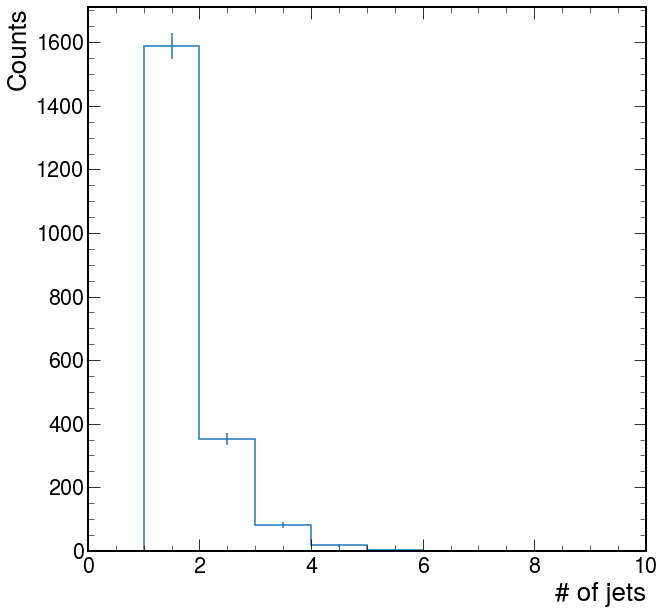

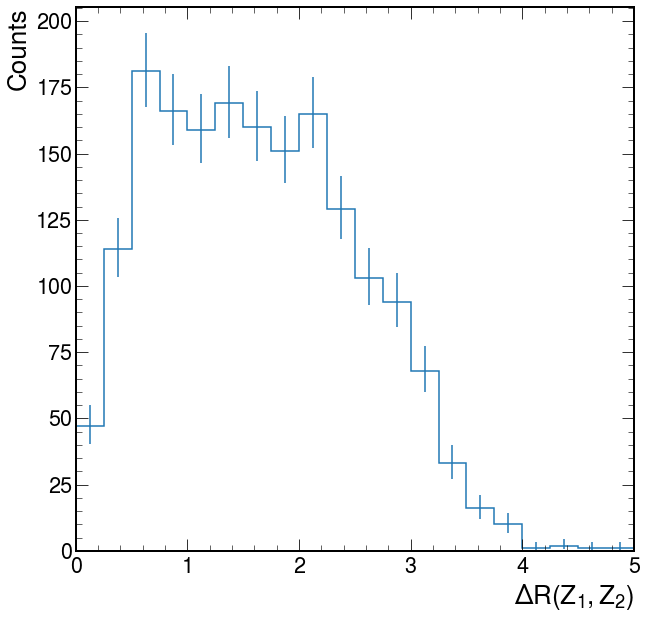

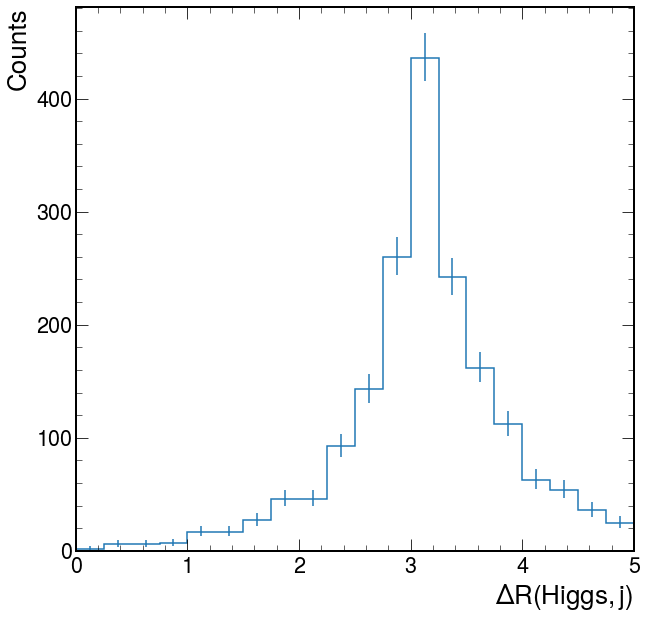

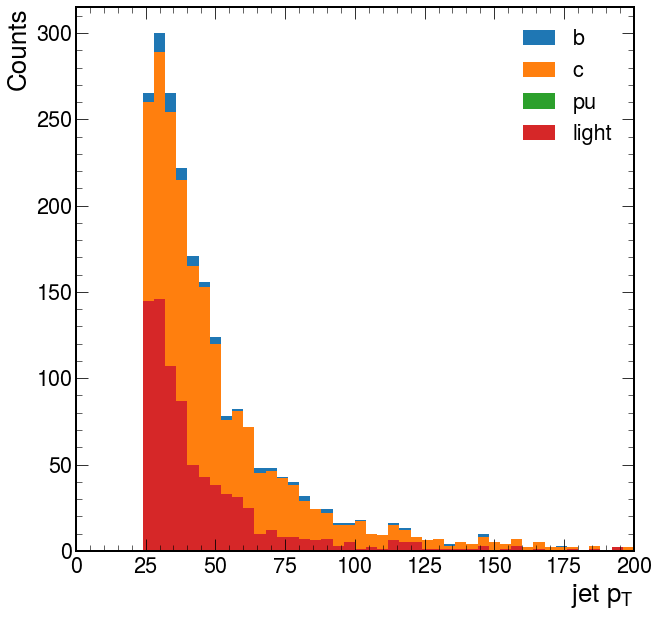

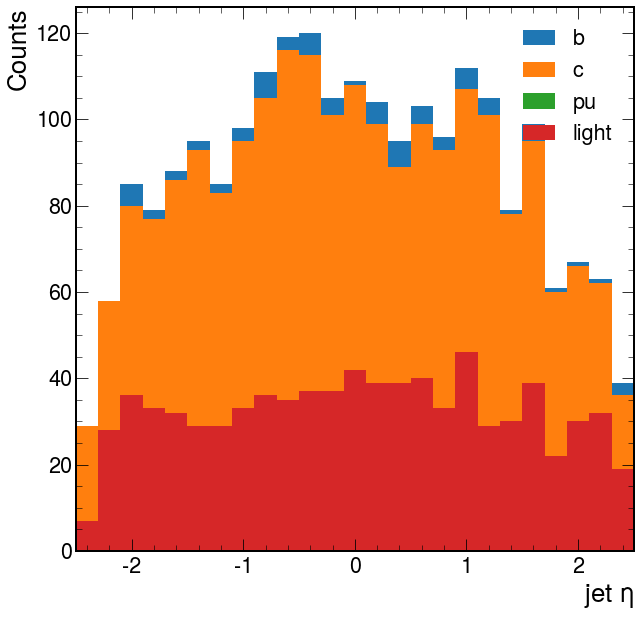

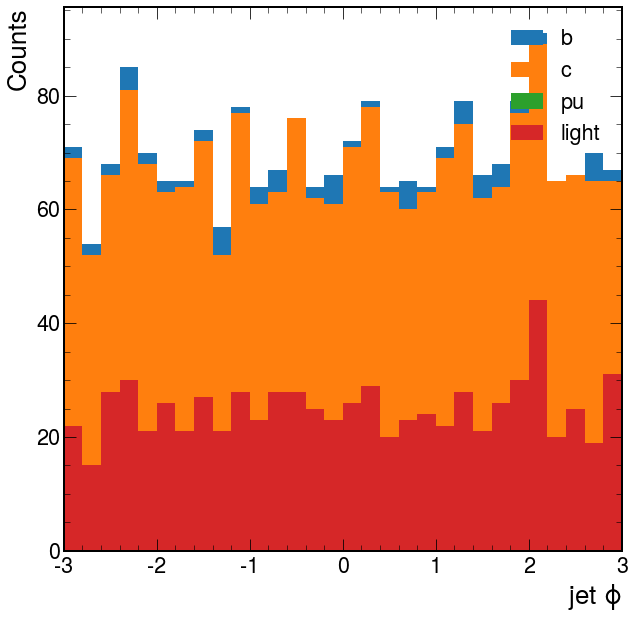

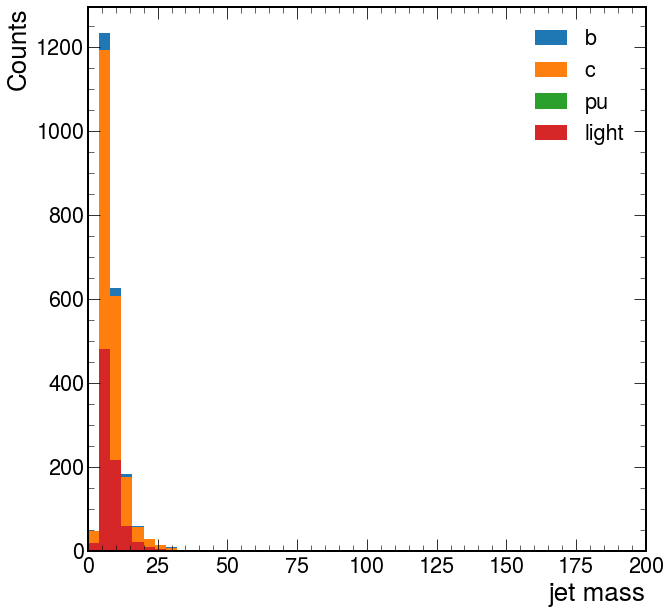

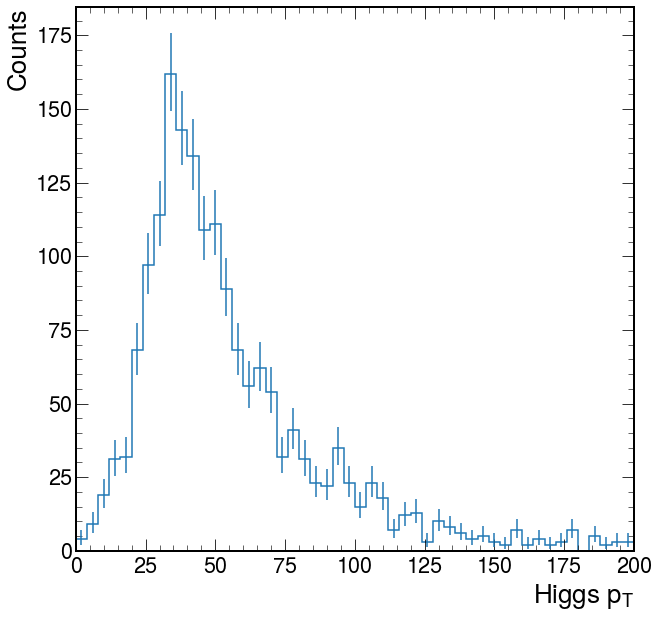

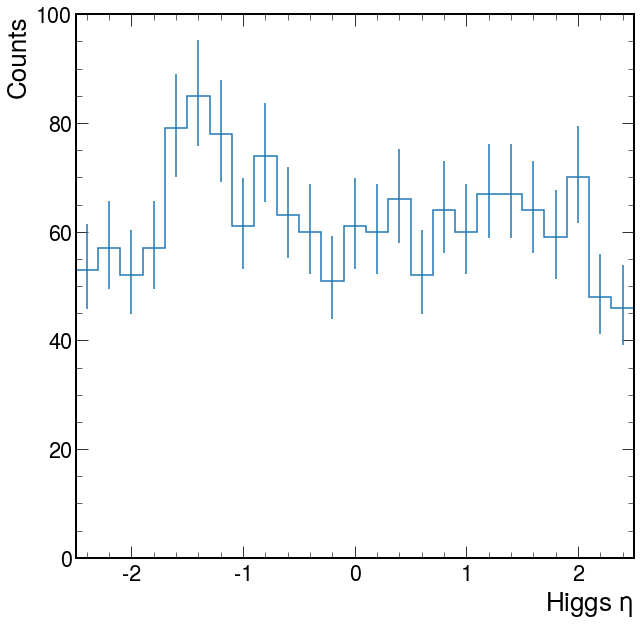

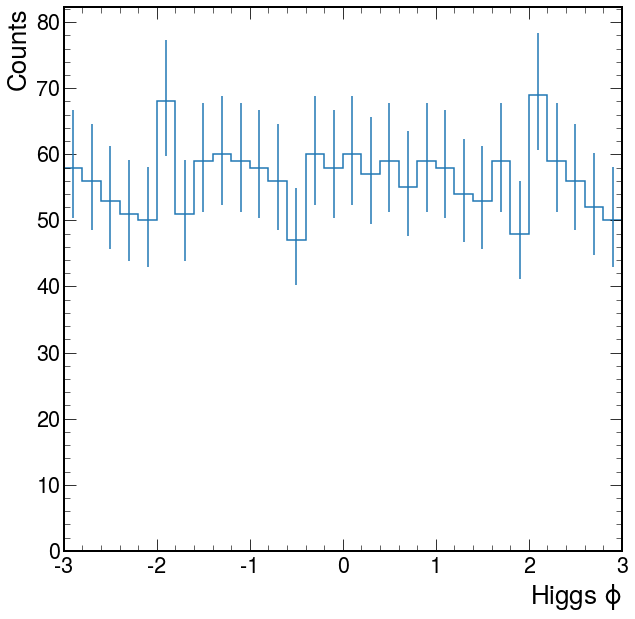

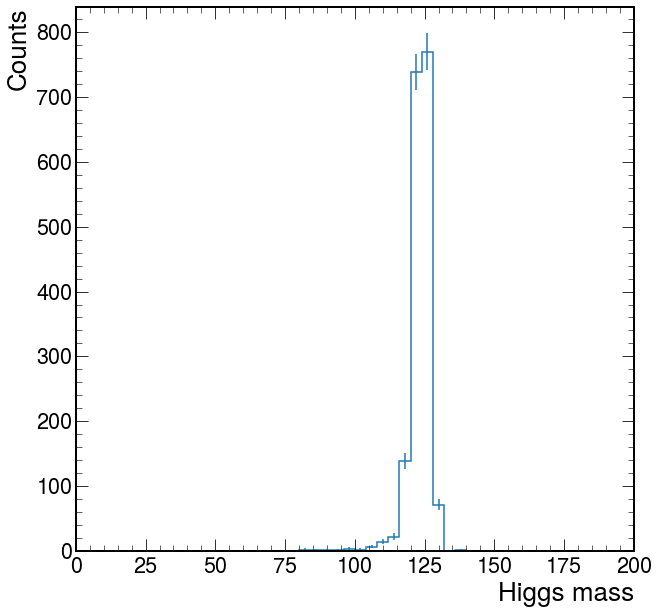

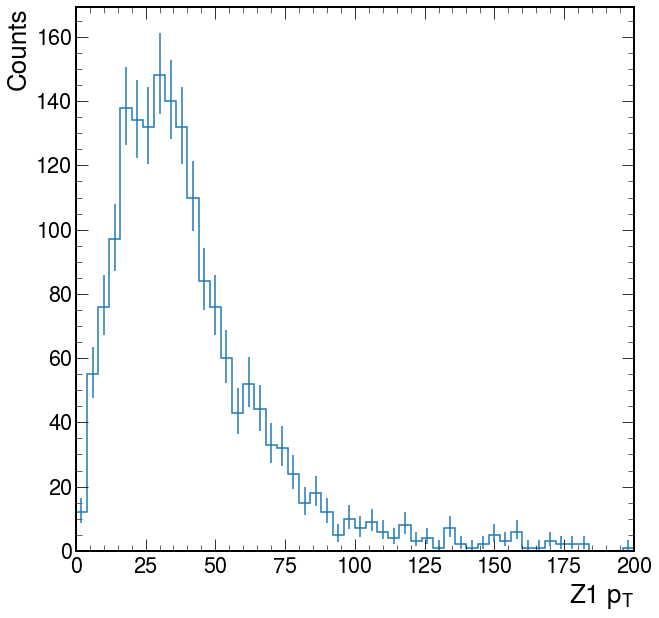

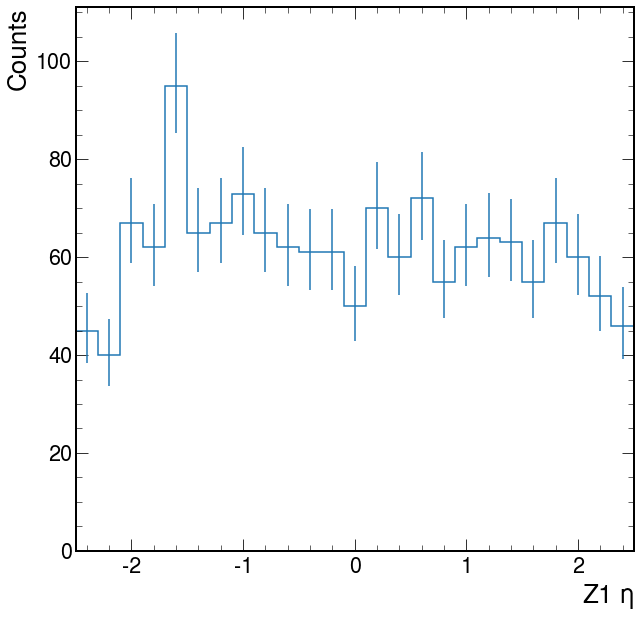

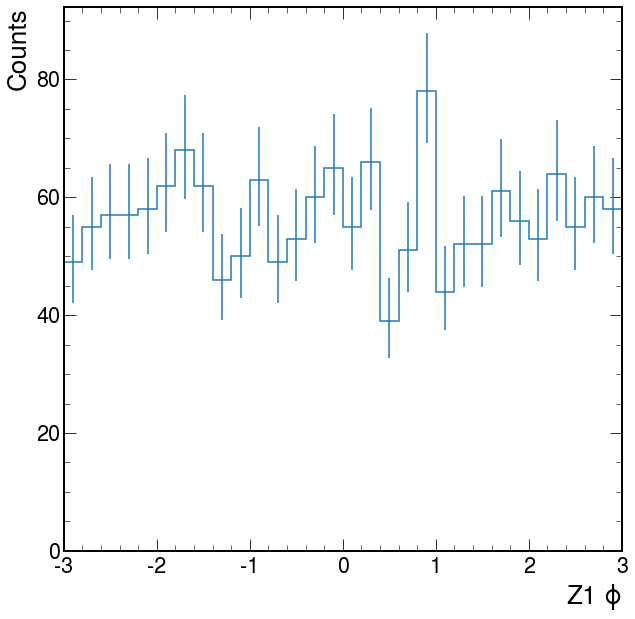

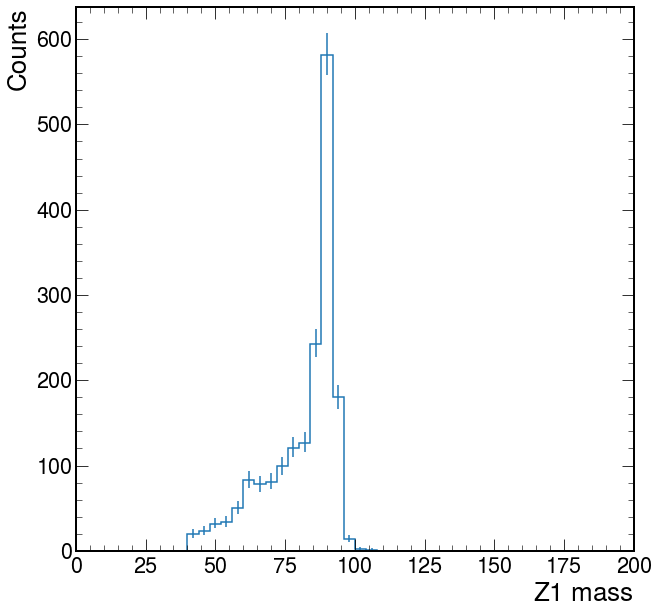

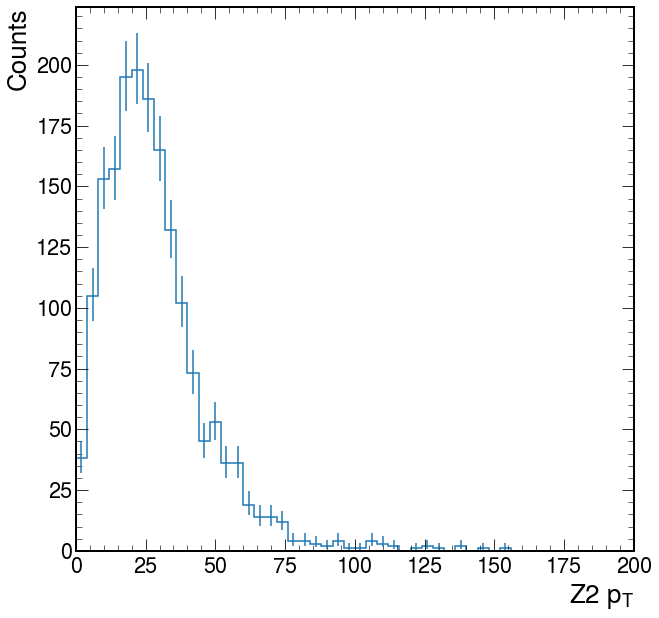

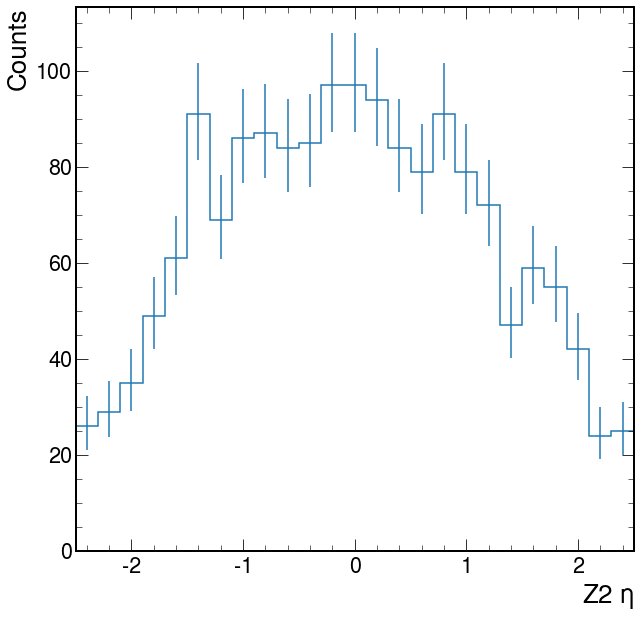

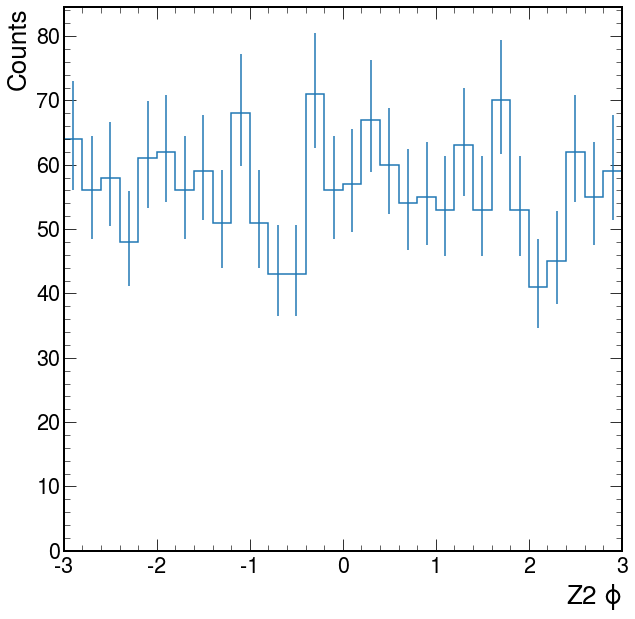

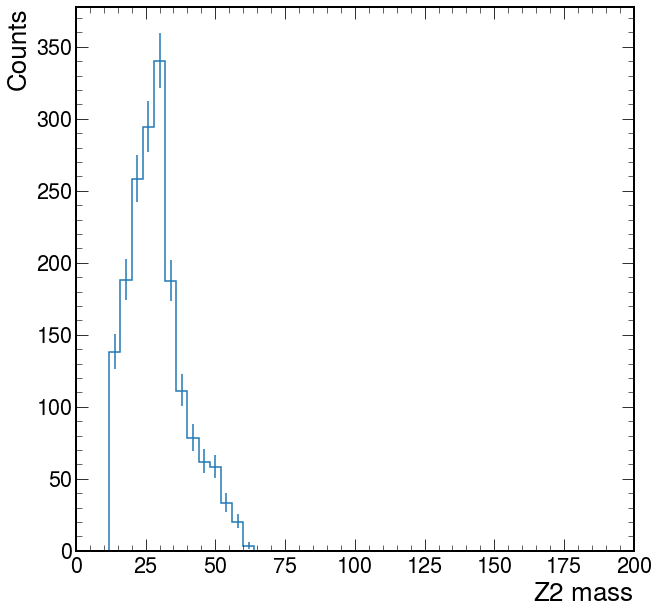

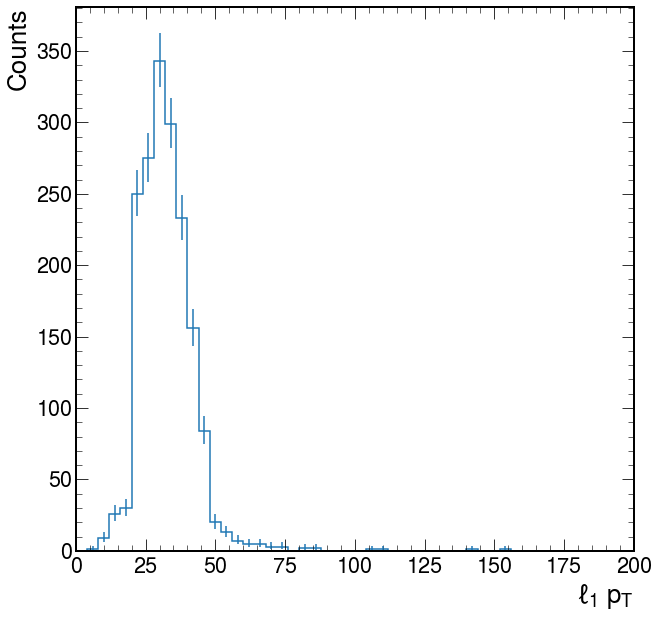

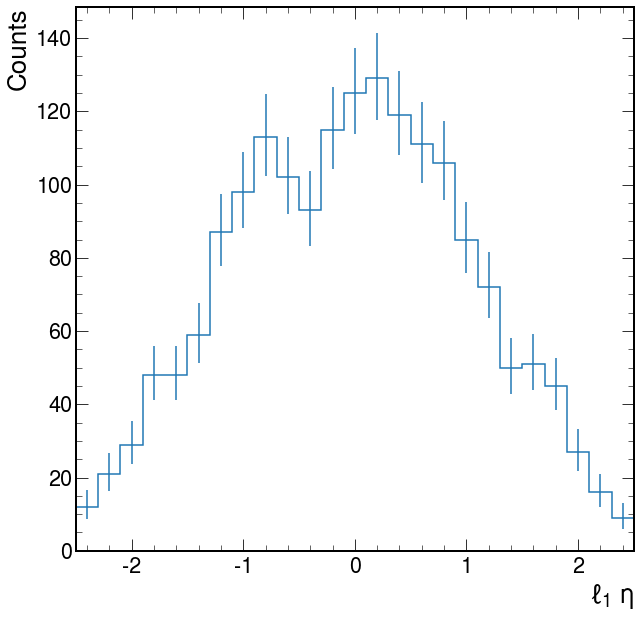

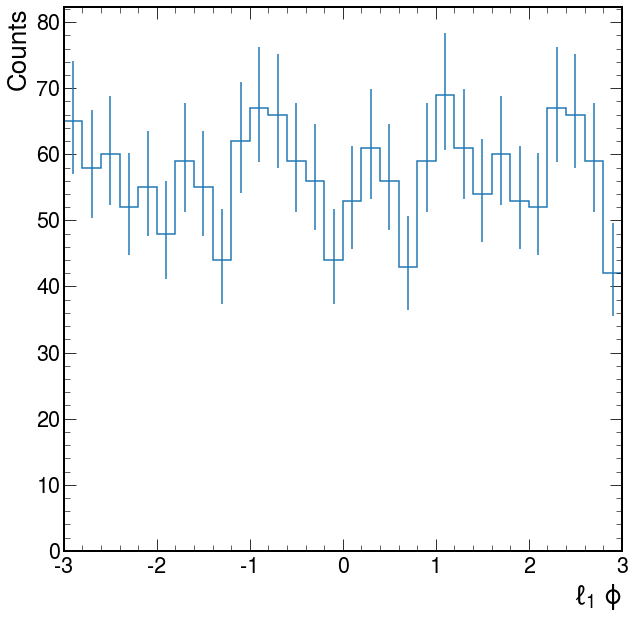

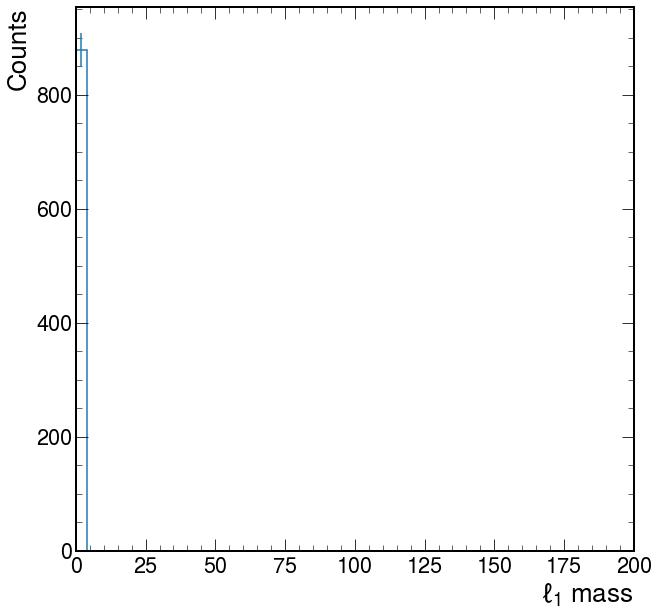

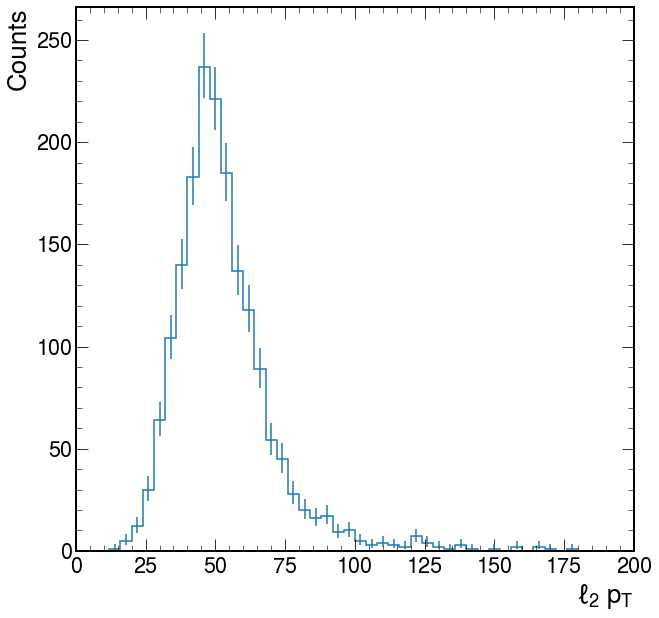

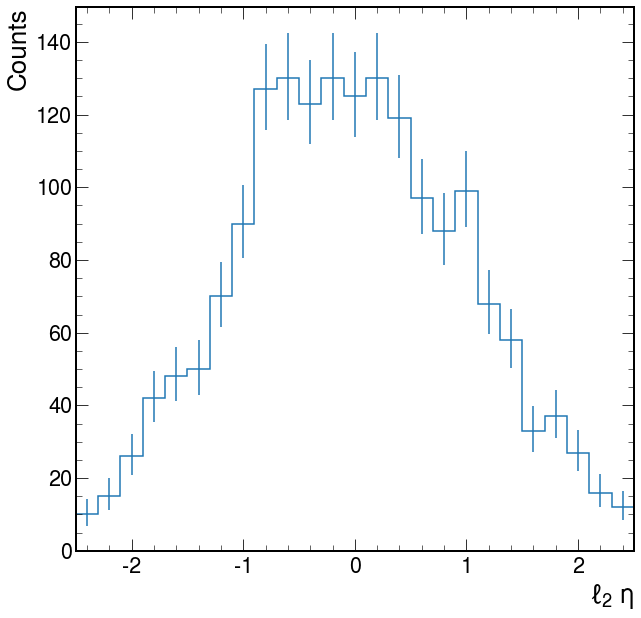

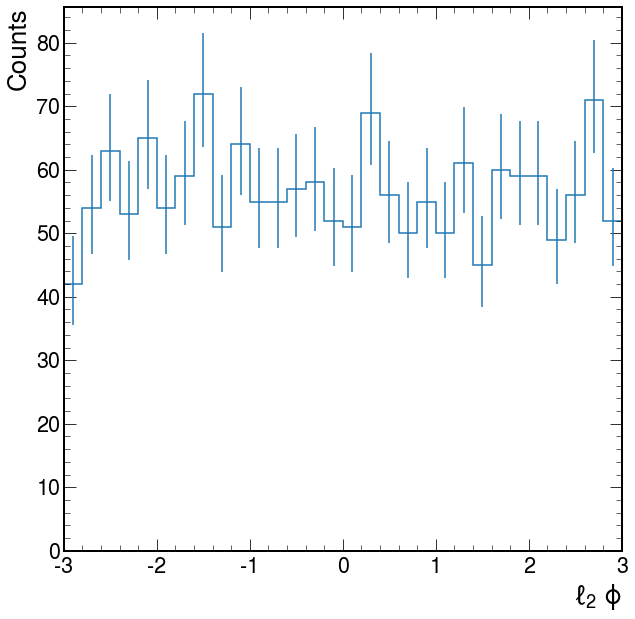

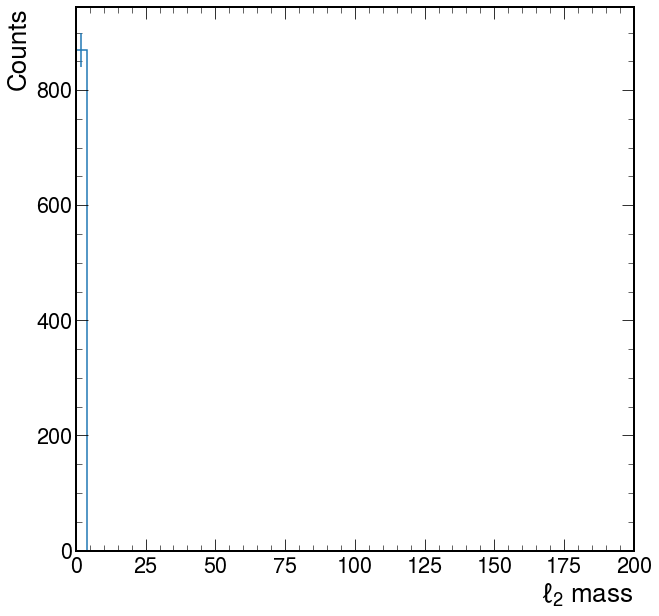

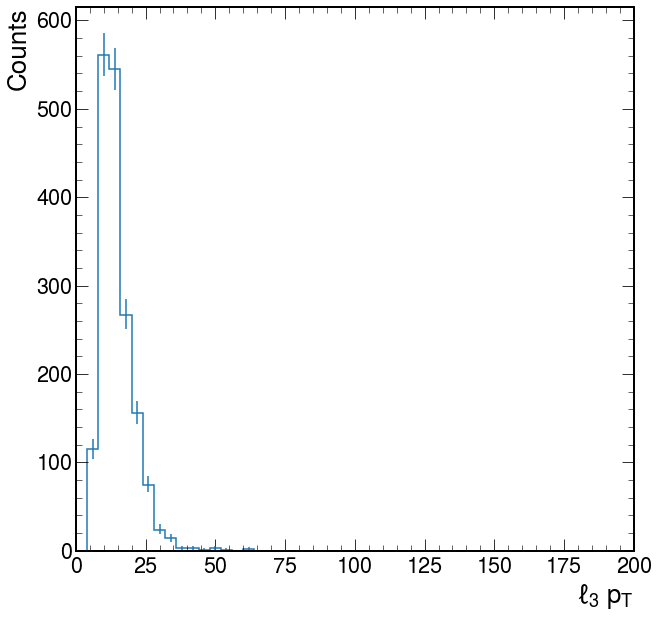

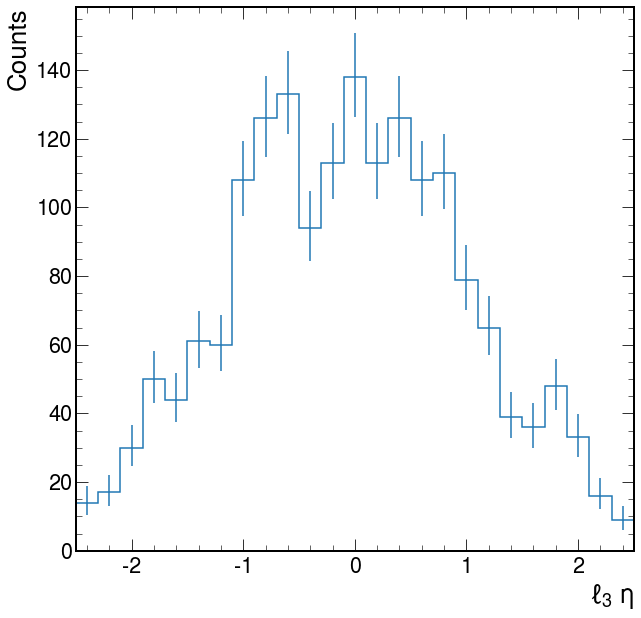

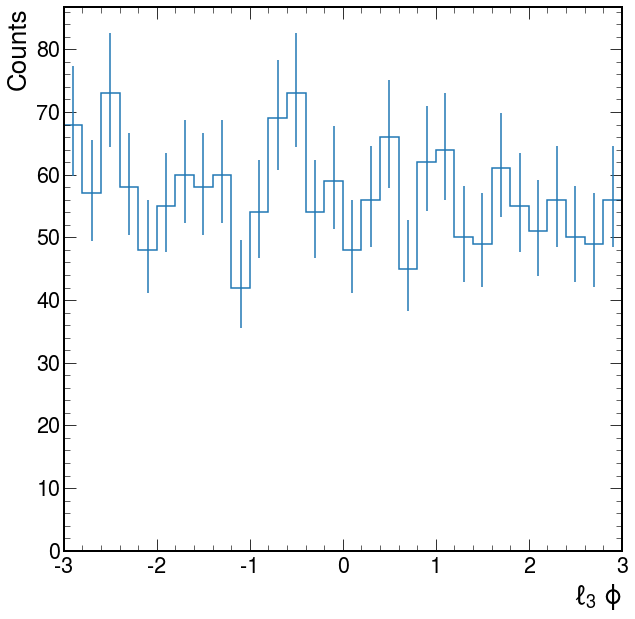

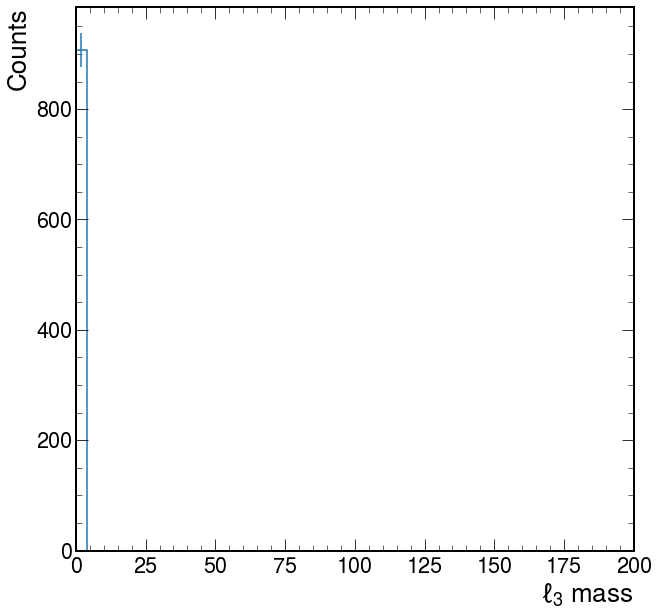

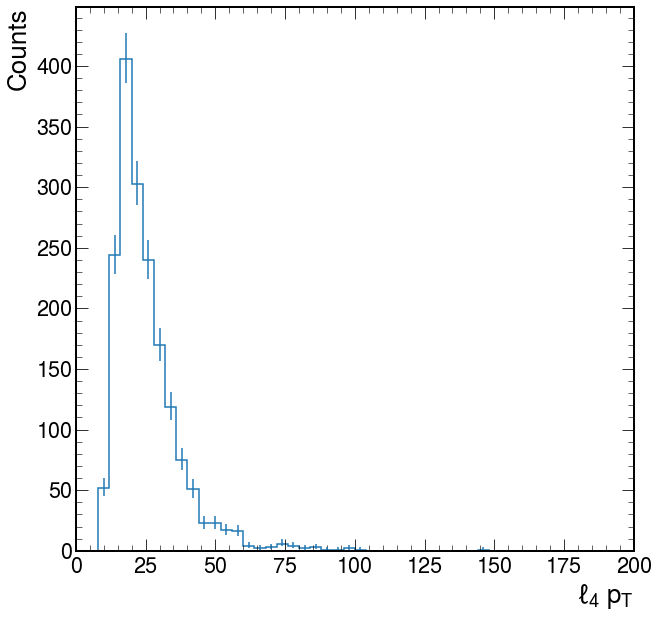

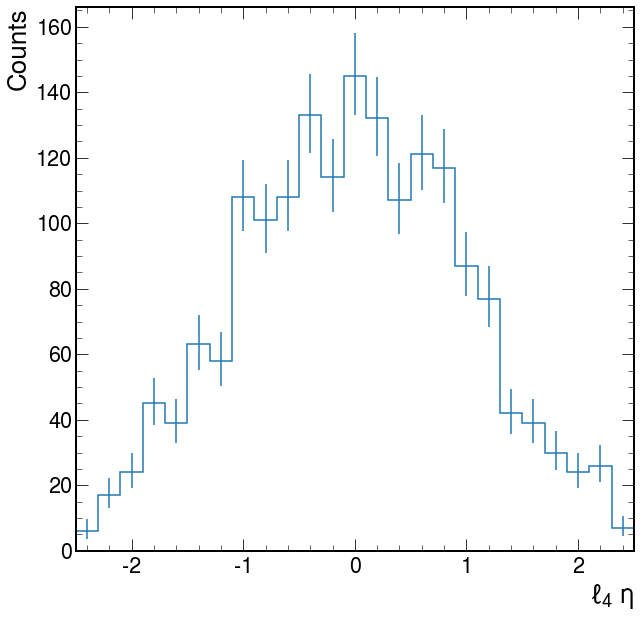

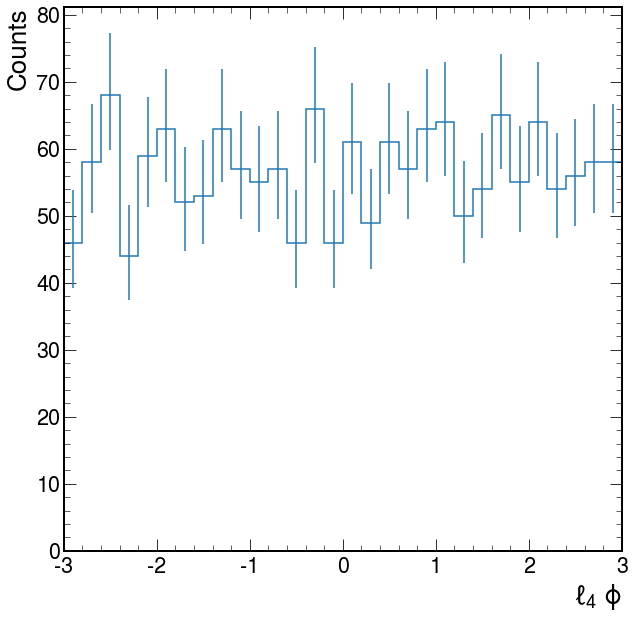

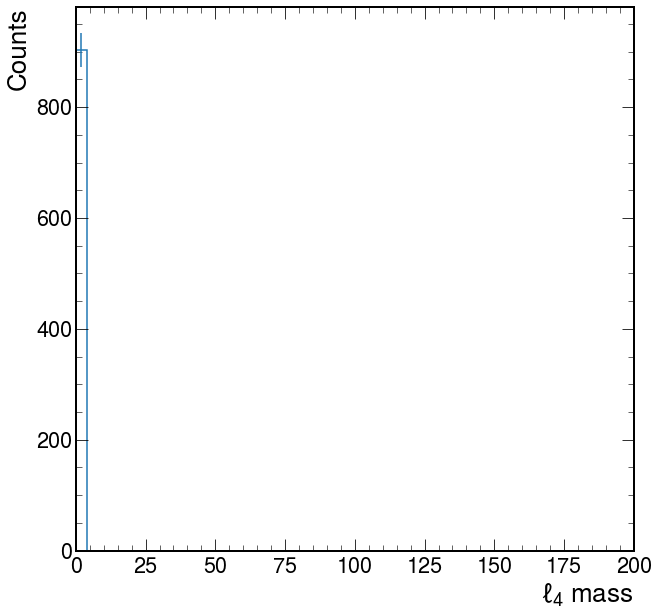

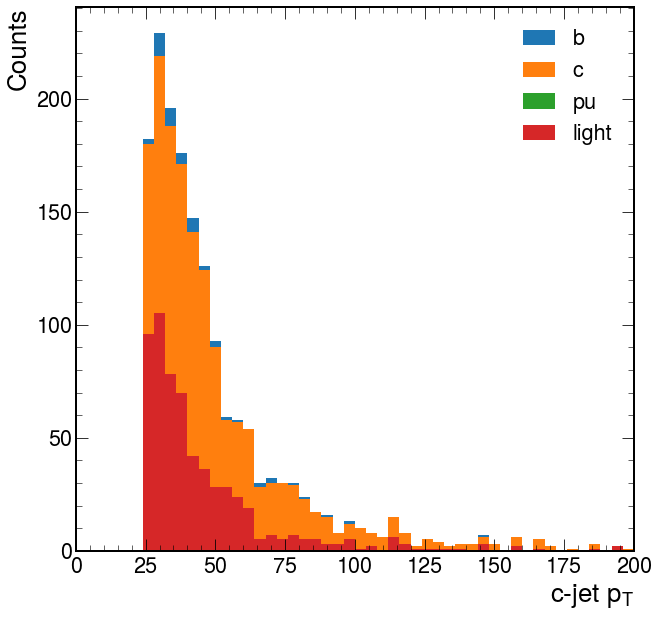

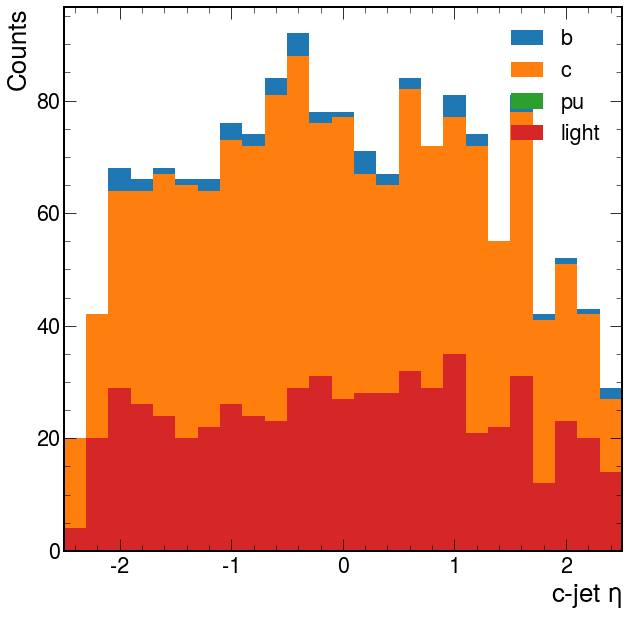

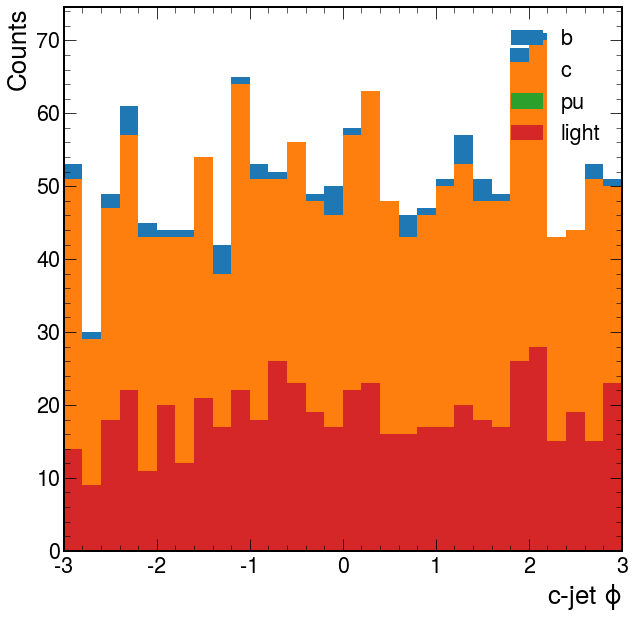

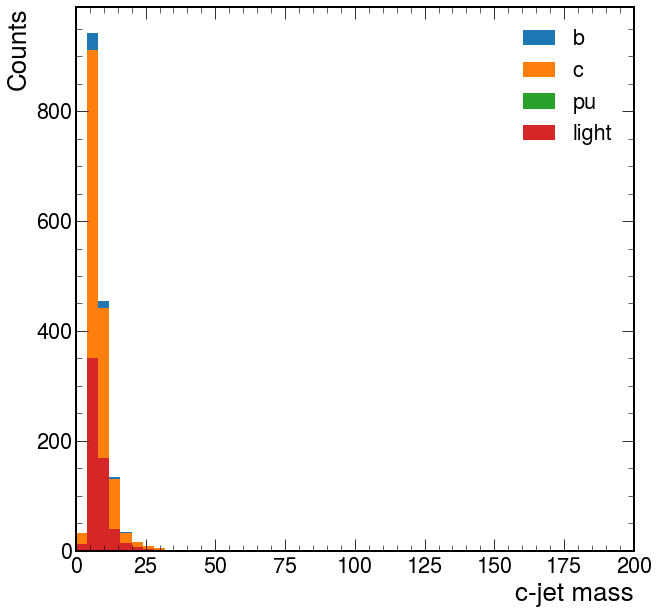

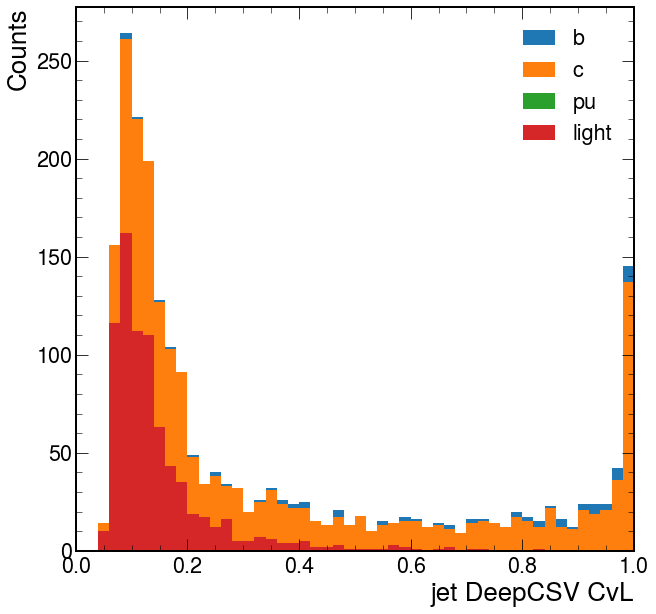

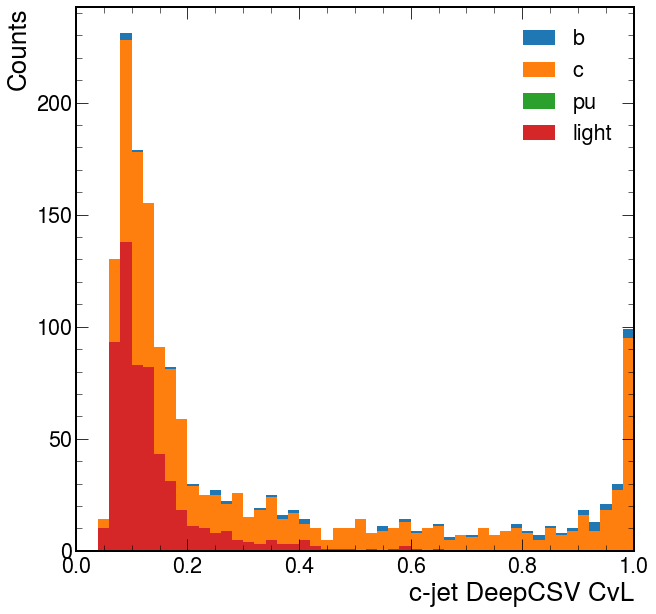

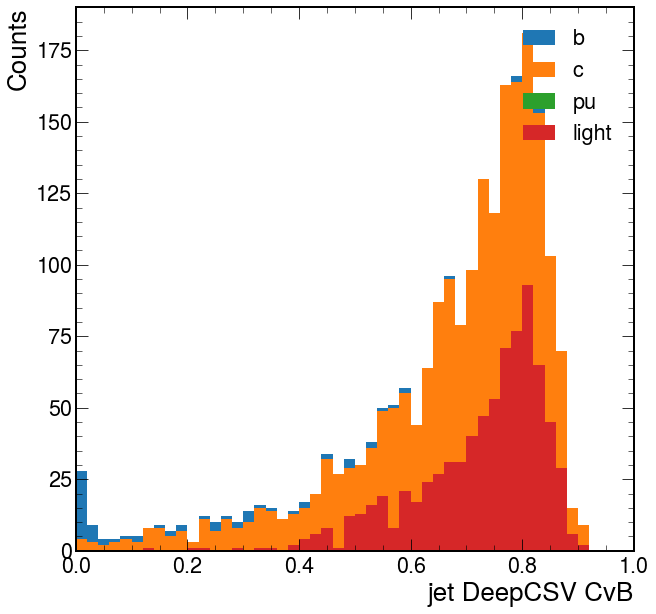

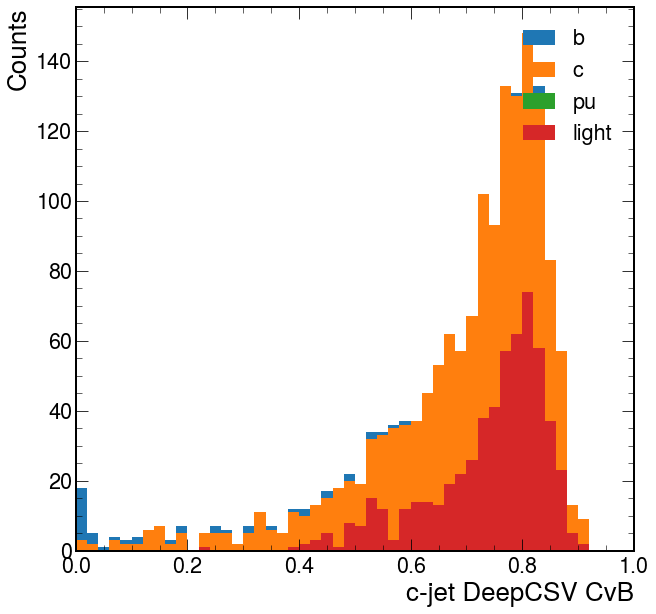

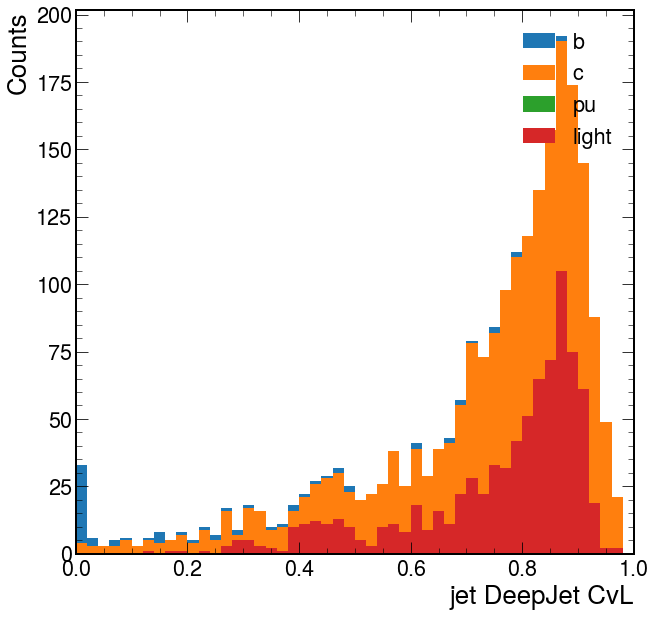

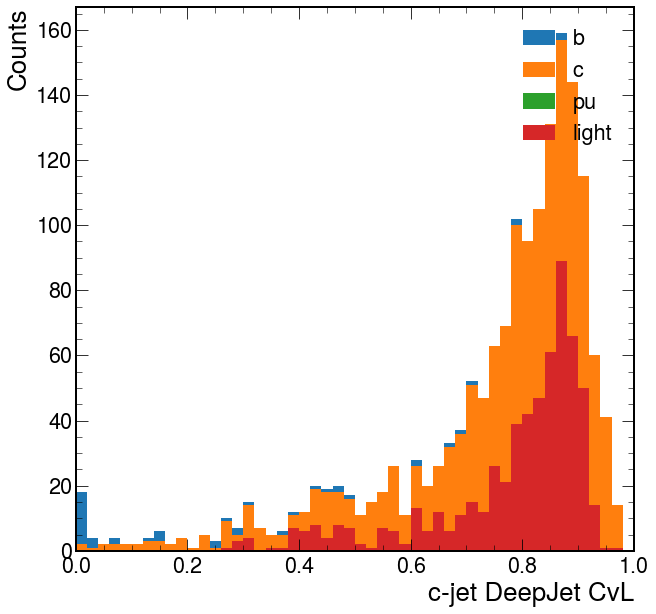

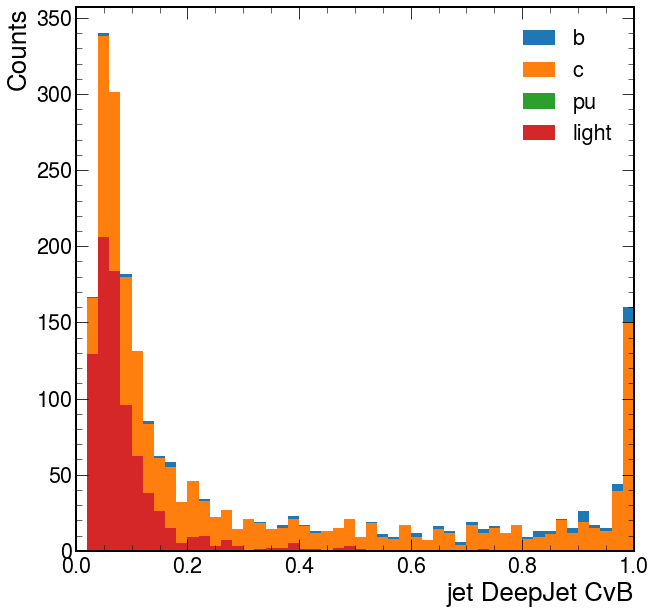

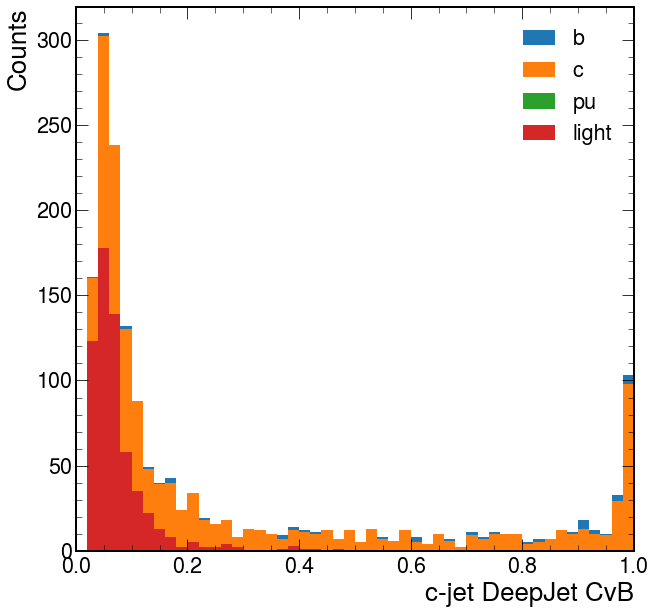

In [5]:
print("============")
print("jet b:",sum(output['jet_pt']['gcHc_NLO'].integrate("dataset").integrate("flav",slice(5,6)).values()[()])/sum(output['jet_pt']['gcHc_NLO'].integrate("dataset").integrate("flav").values()[()]))
print("jet c:",sum(output['jet_pt']['gcHc_NLO'].integrate("dataset").integrate("flav",slice(4,5)).values()[()])/sum(output['jet_pt']['gcHc_NLO'].integrate("dataset").integrate("flav").values()[()]))
print("jet pu:",sum(output['jet_pt']['gcHc_NLO'].integrate("dataset").integrate("flav",slice(1,4)).values()[()])/sum(output['jet_pt']['gcHc_NLO'].integrate("dataset").integrate("flav").values()[()]))
print("jet l:",sum(output['jet_pt']['gcHc_NLO'].integrate("dataset").integrate("flav",slice(0,1)).values()[()])/sum(output['jet_pt']['gcHc_NLO'].integrate("dataset").integrate("flav").values()[()]))
print('\n')
print("charm jet b:",sum(output['jetcharm_pt']['gcHc_NLO'].integrate("dataset").integrate("flav",slice(5,6)).values()[()])/sum(output['jetcharm_pt']['gcHc_NLO'].integrate("dataset").integrate("flav").values()[()]))
print("charm jet c:",sum(output['jetcharm_pt']['gcHc_NLO'].integrate("dataset").integrate("flav",slice(4,5)).values()[()])/sum(output['jetcharm_pt']['gcHc_NLO'].integrate("dataset").integrate("flav").values()[()]))
print("charm jet pu:",sum(output['jetcharm_pt']['gcHc_NLO'].integrate("dataset").integrate("flav",slice(1,4)).values()[()])/sum(output['jetcharm_pt']['gcHc_NLO'].integrate("dataset").integrate("flav").values()[()]))
print("charm jet l:",sum(output['jetcharm_pt']['gcHc_NLO'].integrate("dataset").integrate("flav",slice(0,1)).values()[()])/sum(output['jetcharm_pt']['gcHc_NLO'].integrate("dataset").integrate("flav").values()[()]))
print("============")
for var in output.keys():
    if var == 'nbj' or var == 'ncj' : continue
    if var == 'cutflow':break
    fig, ax = plt.subplots()
# fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
# fig.subplots_adjust(hspace=.07)
    
    if 'jet' in var:
        ax = plot.plot1d(output[var]['gcHc_NLO'].sum("dataset"),overlay="flav",stack=True,ax=ax)
        ax.legend(loc="upper right",handles=ax.get_legend_handles_labels()[0],labels=['b','c','pu','light'])
        
    else: 
        ax = plot.plot1d(output[var]['gcHc_NLO'].sum("dataset"),ax=ax)
        ax.get_legend().remove()
    ax.set_xlabel(axis_dict[var])
    

/afs/cern.ch/user/m/milee/.conda/envs/coffea/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


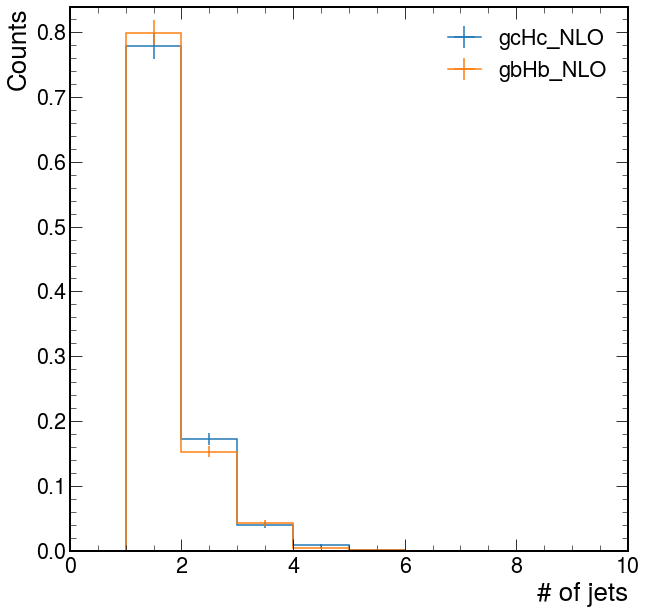

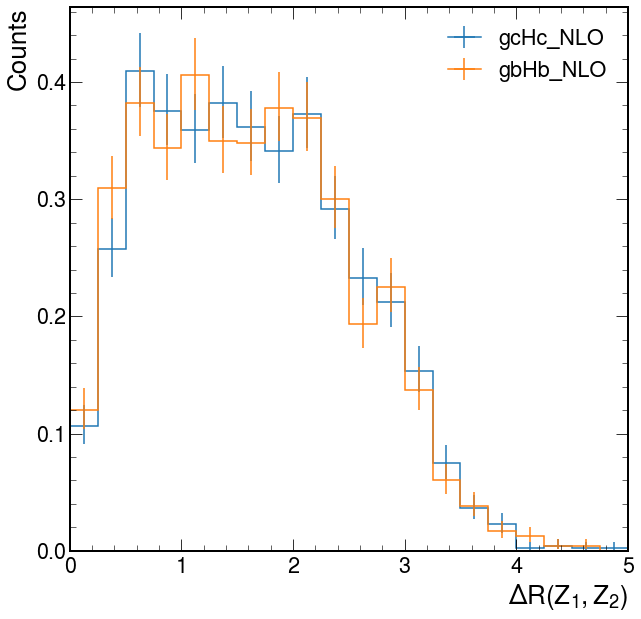

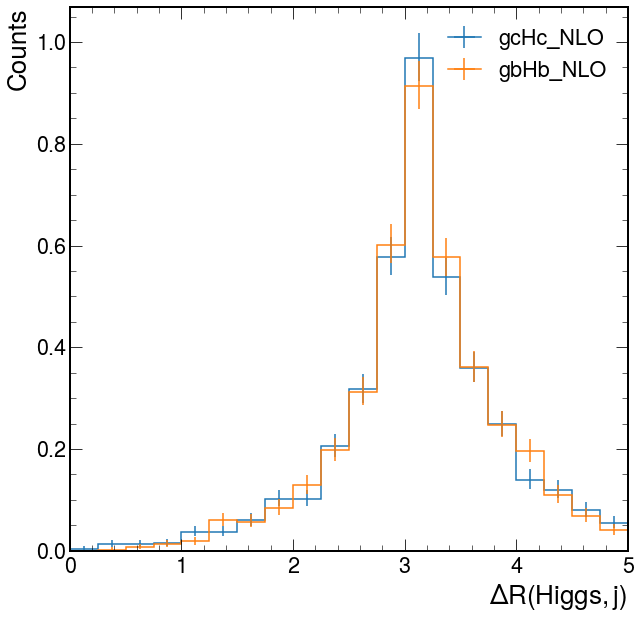

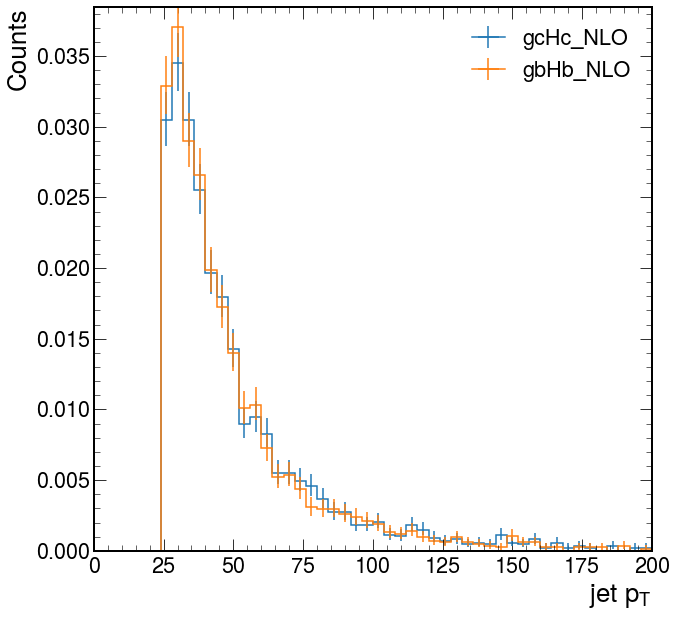

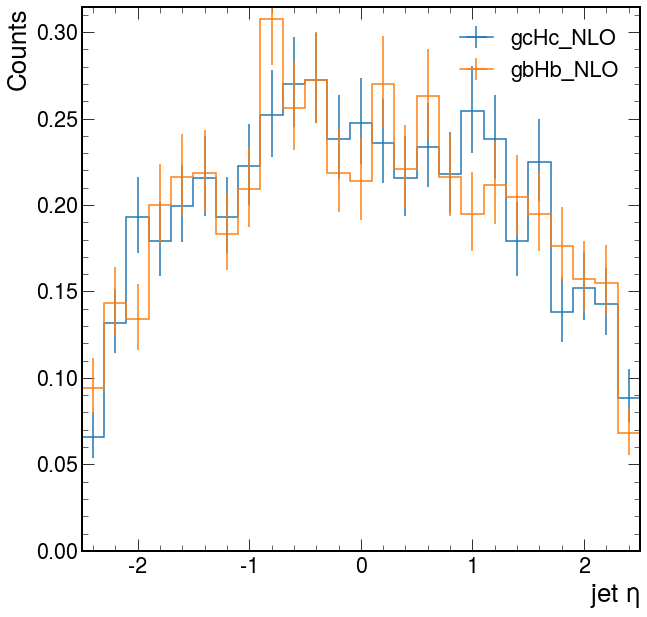

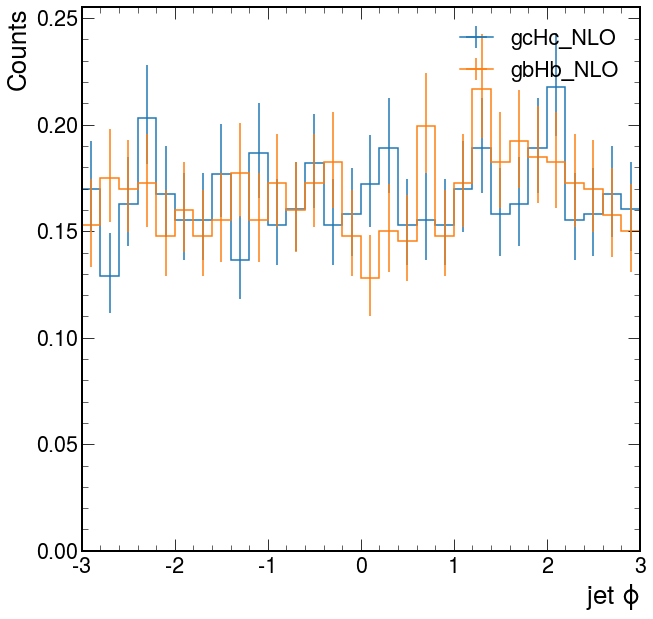

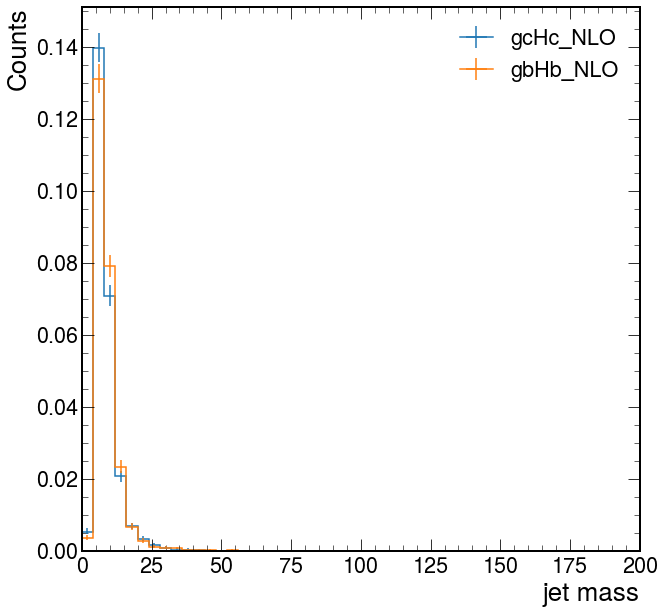

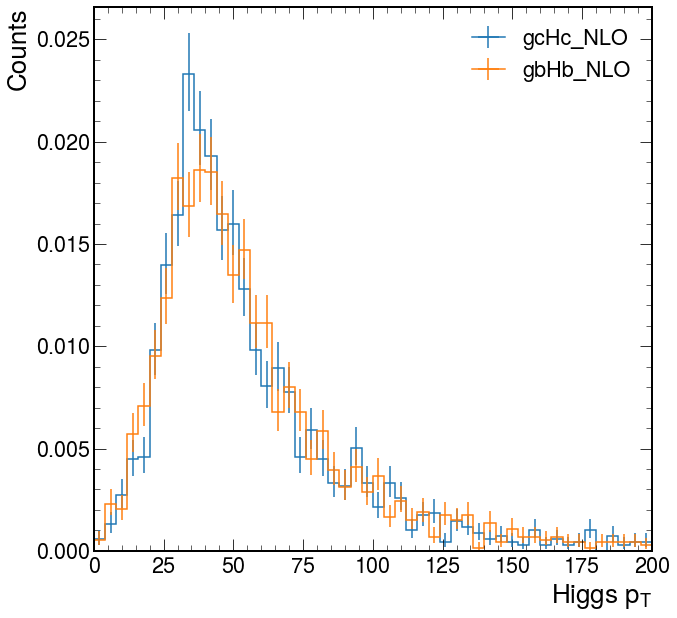

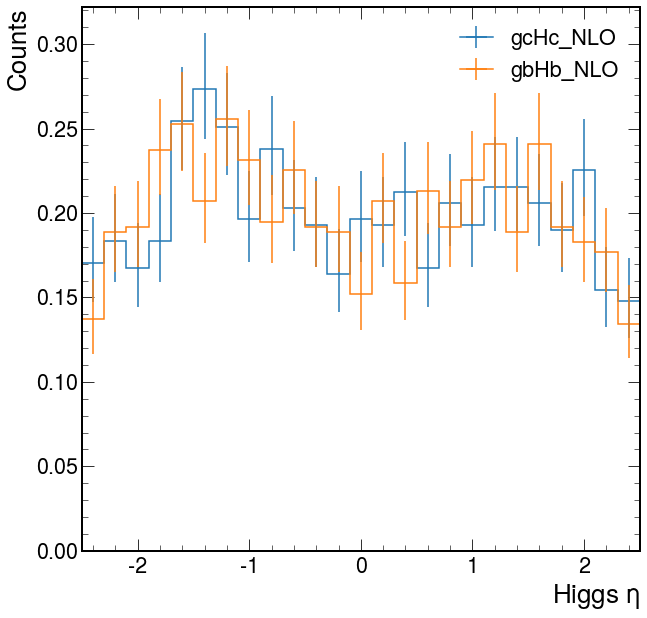

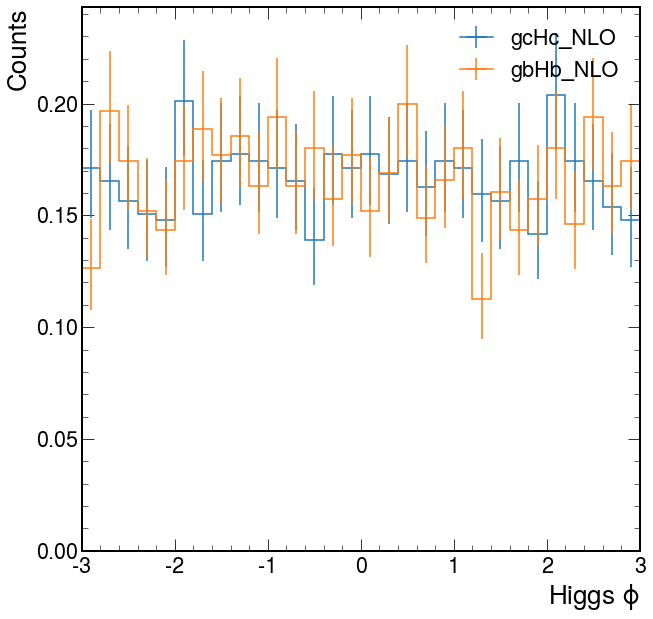

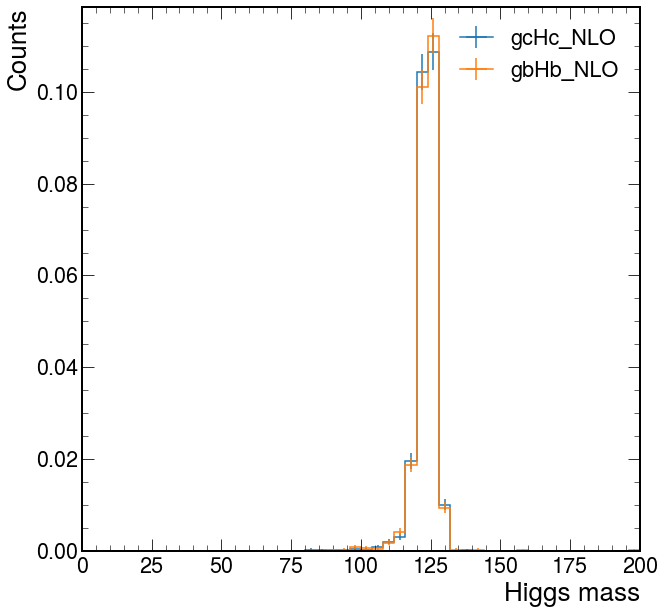

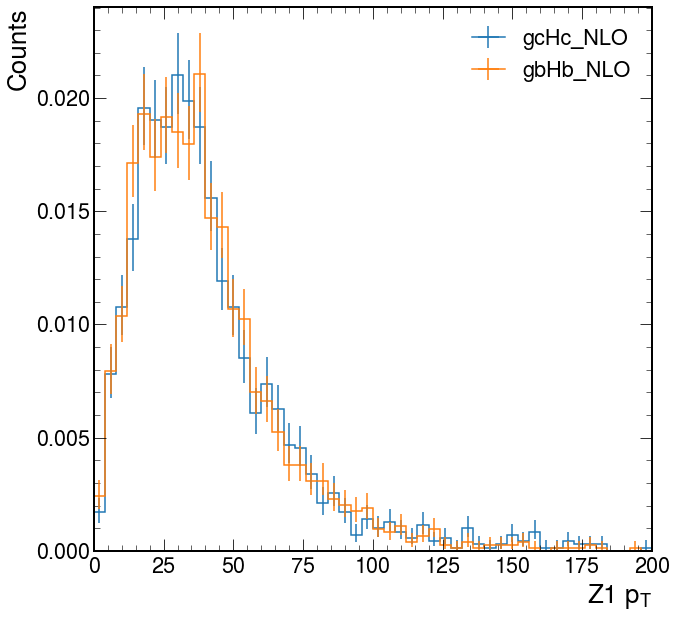

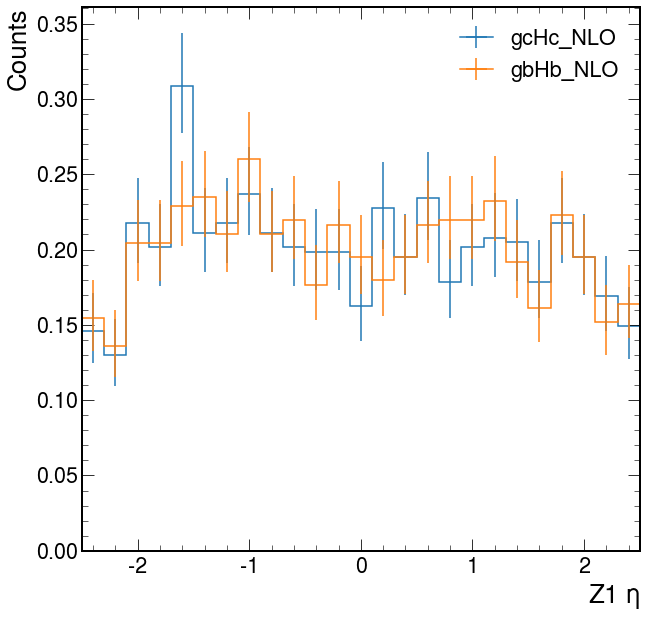

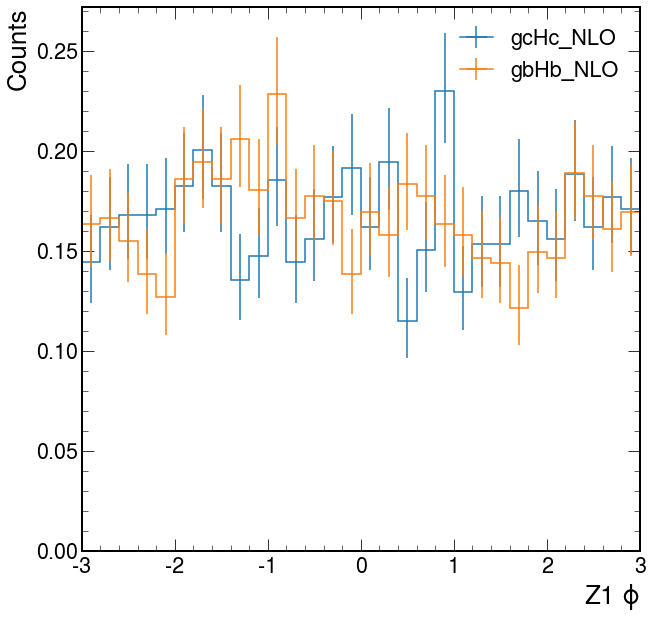

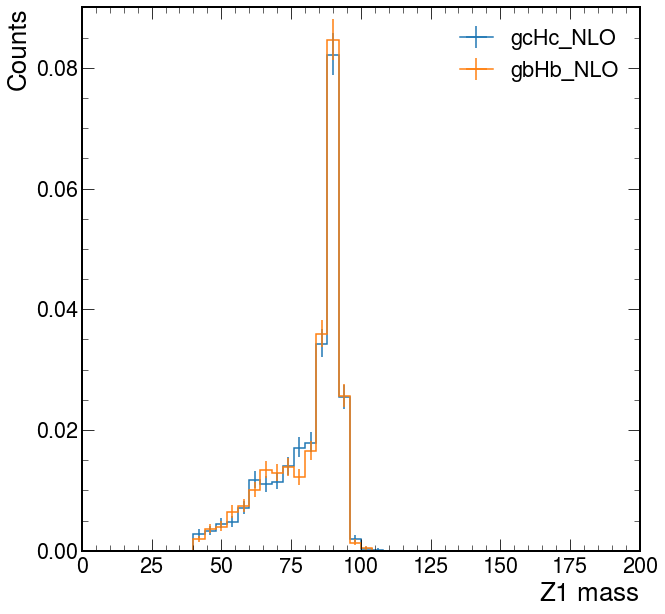

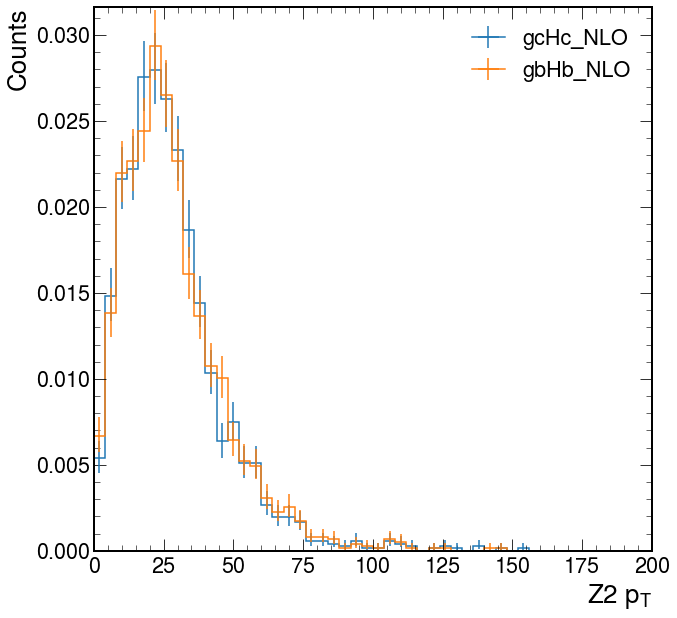

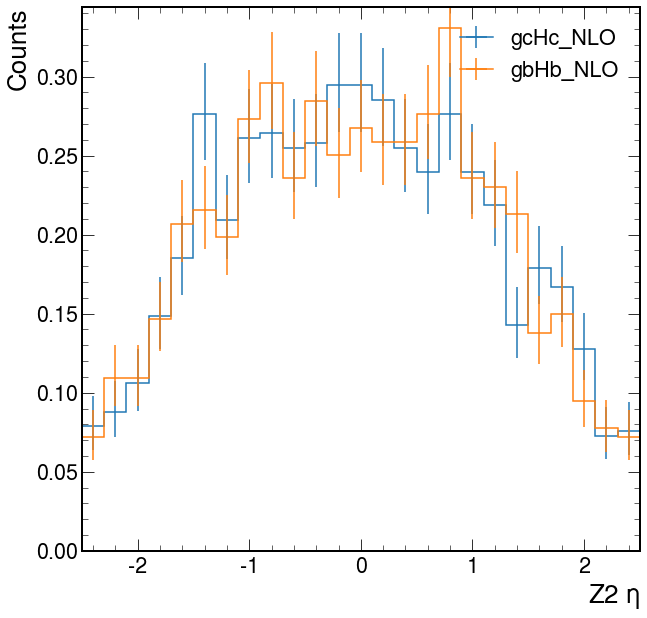

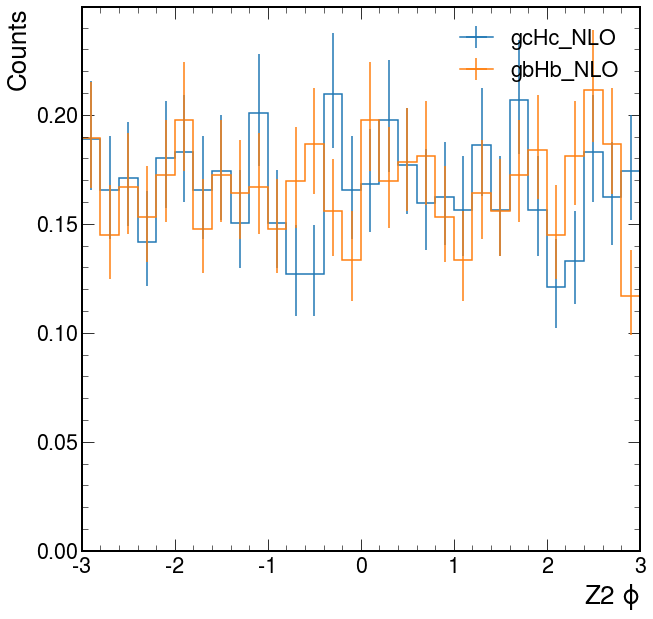

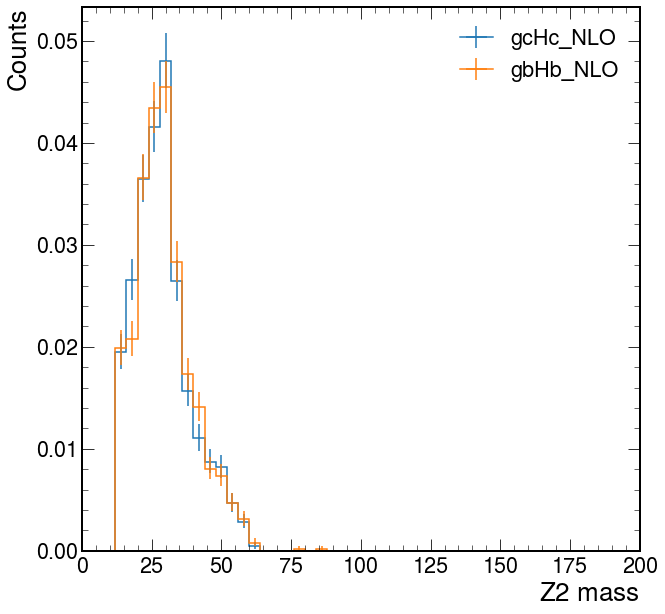

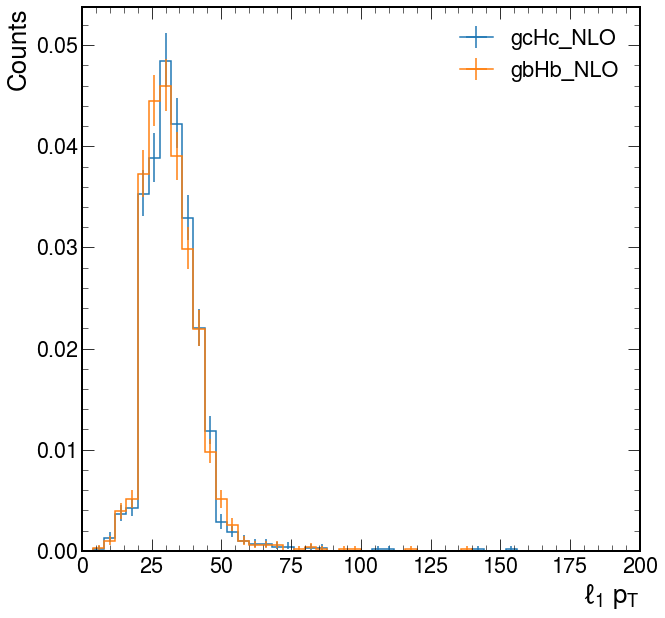

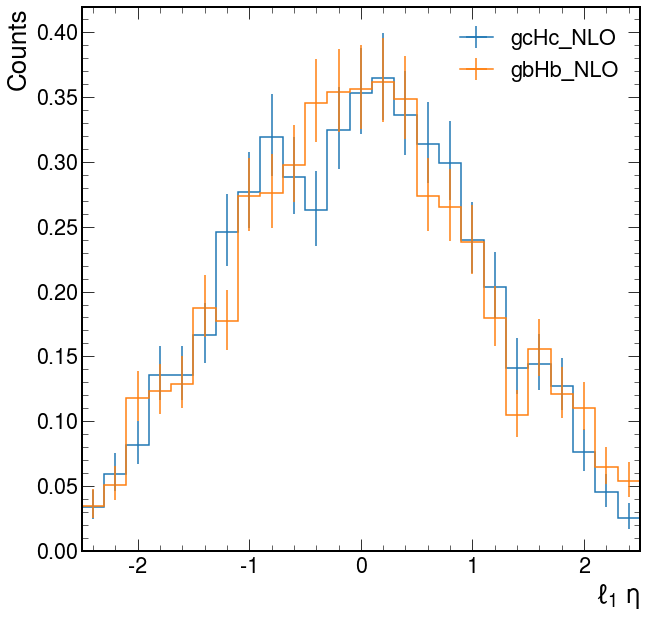

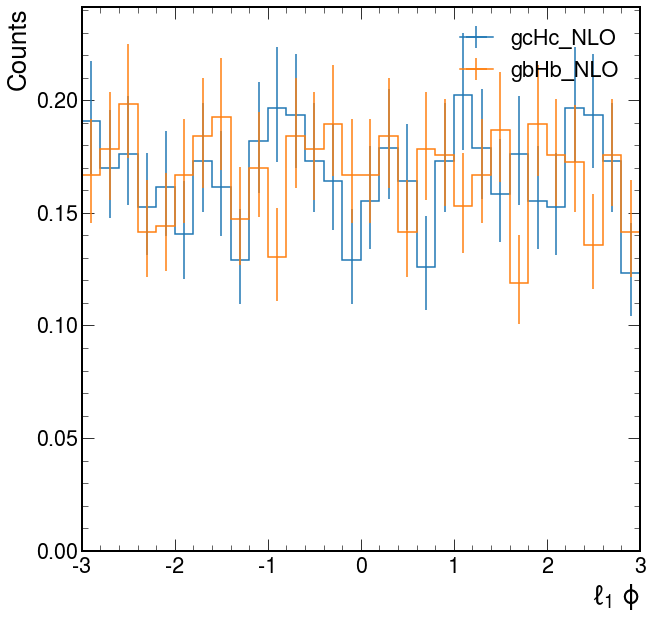

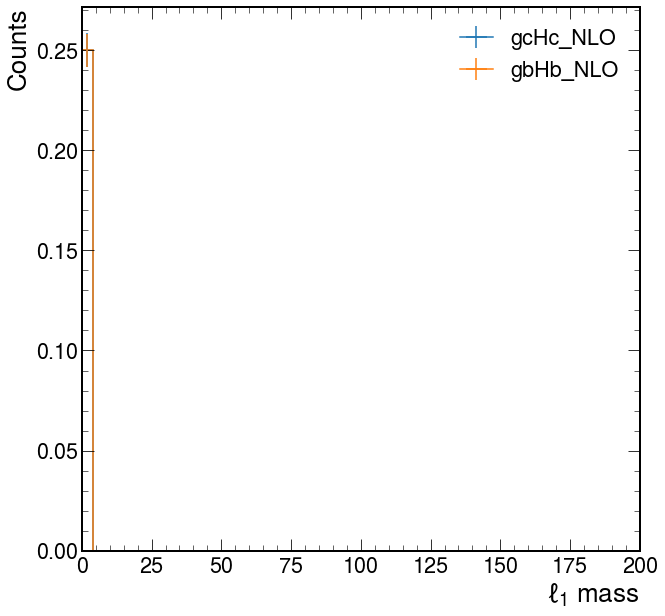

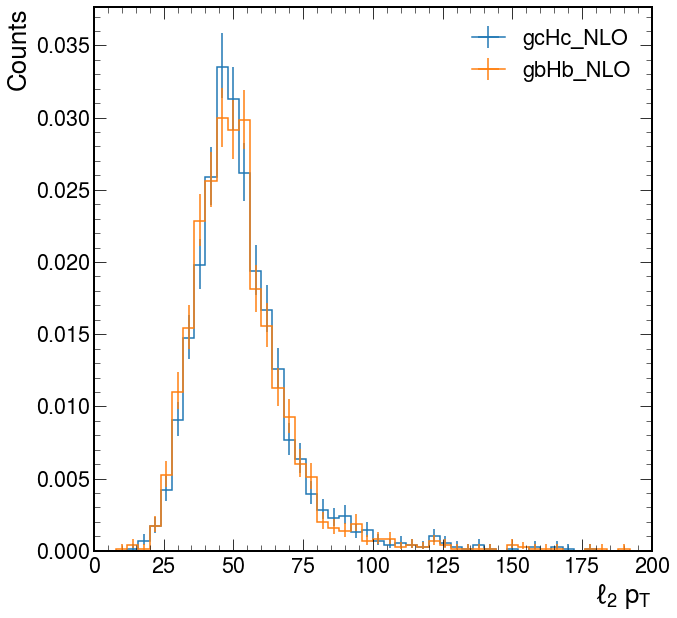

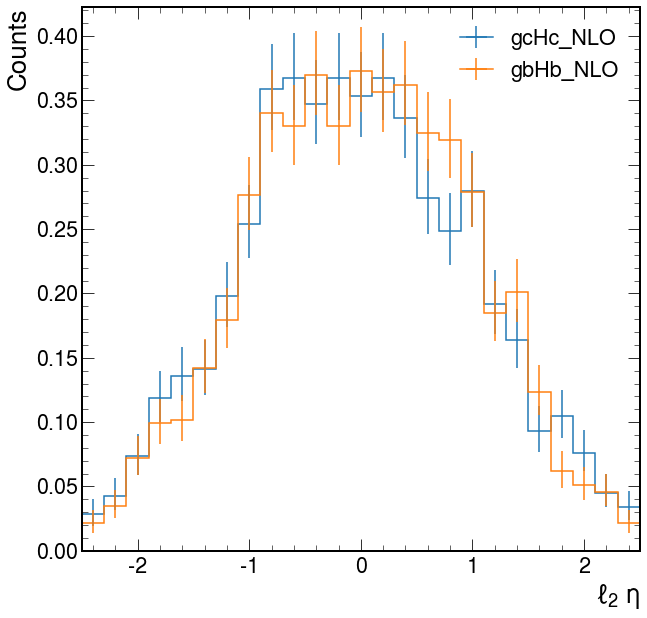

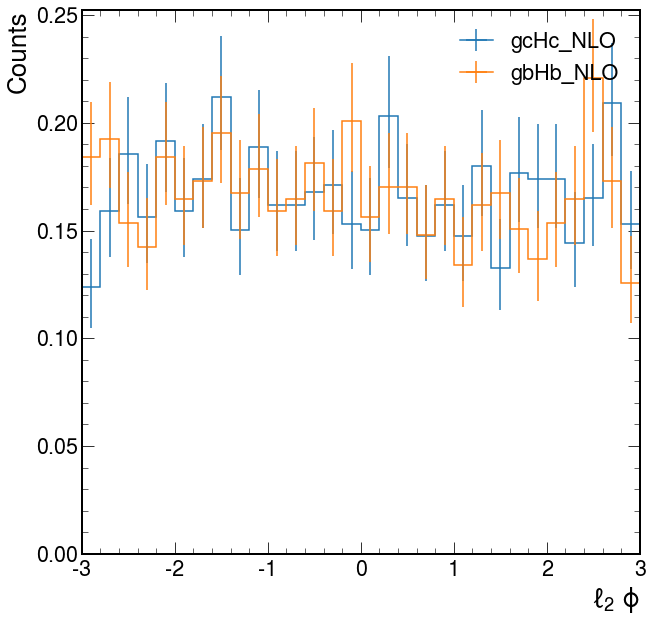

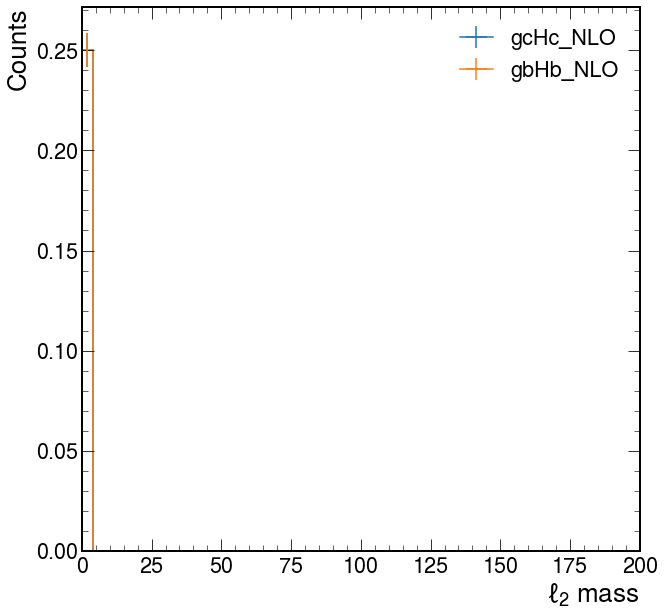

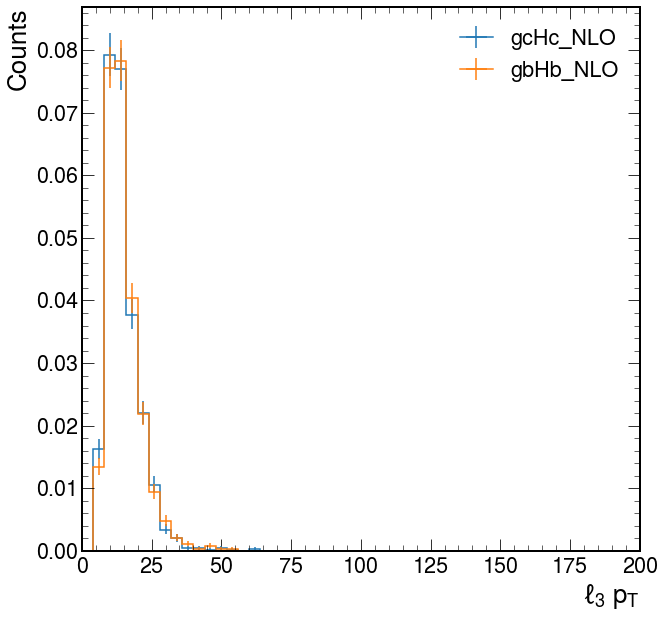

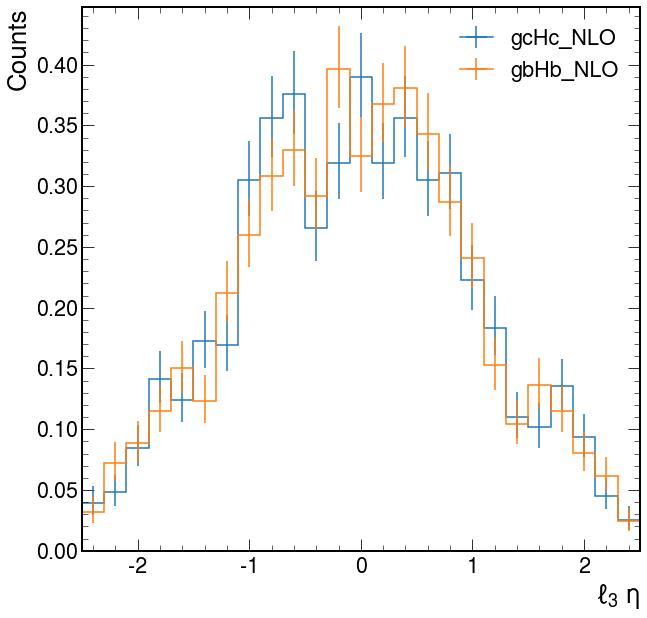

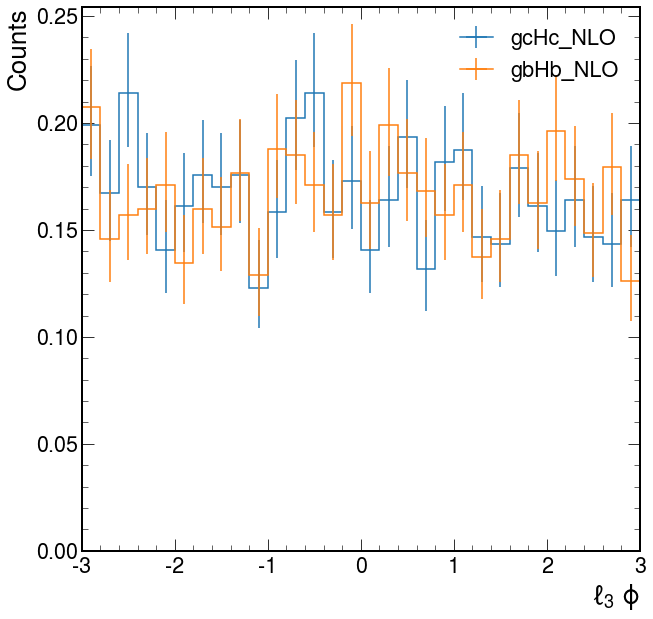

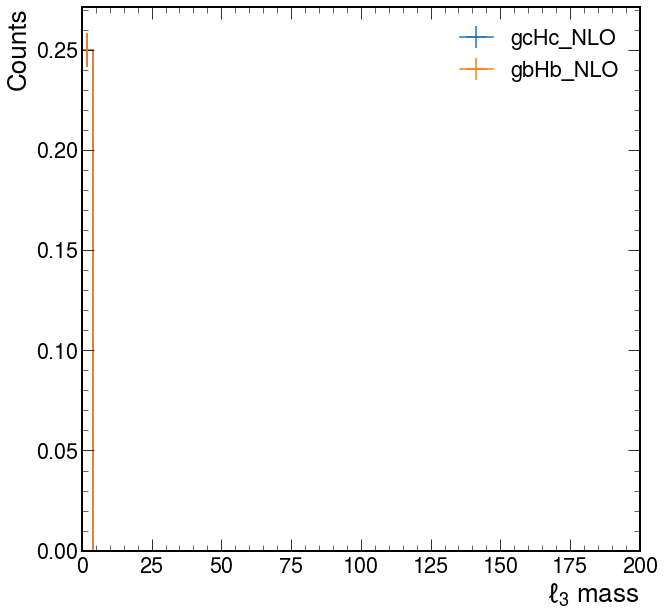

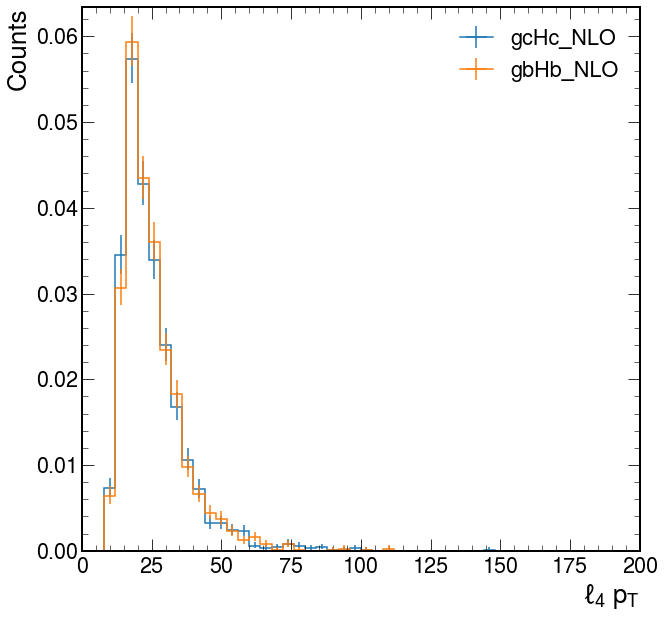

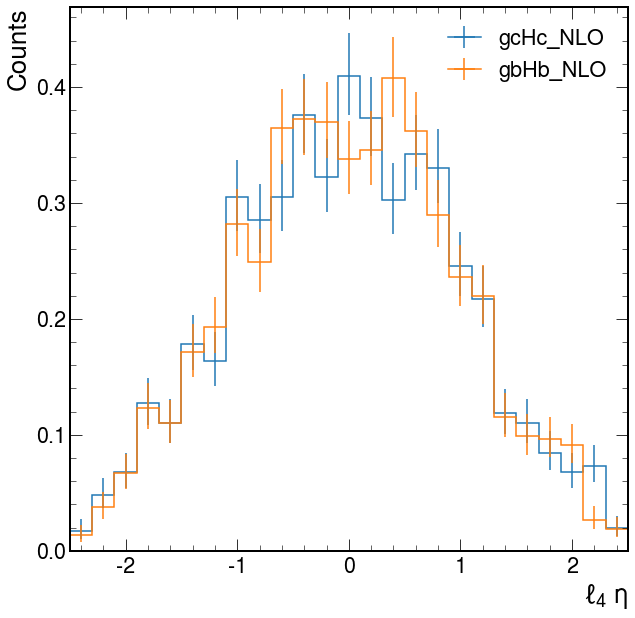

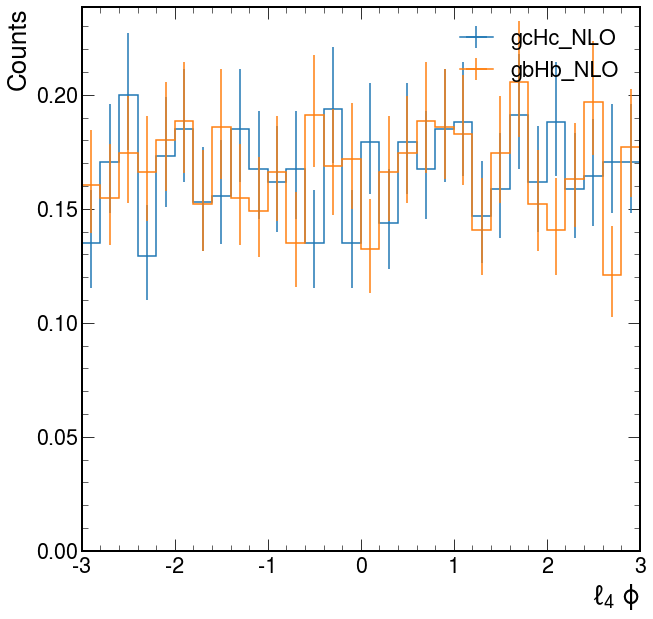

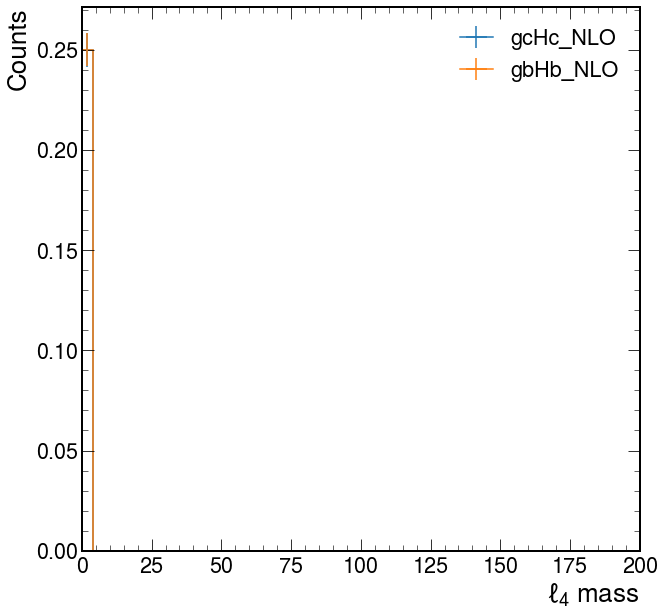

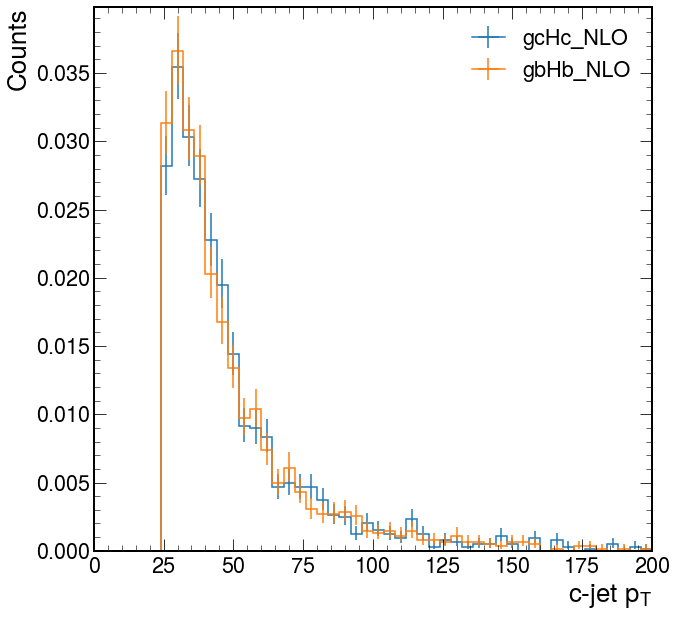

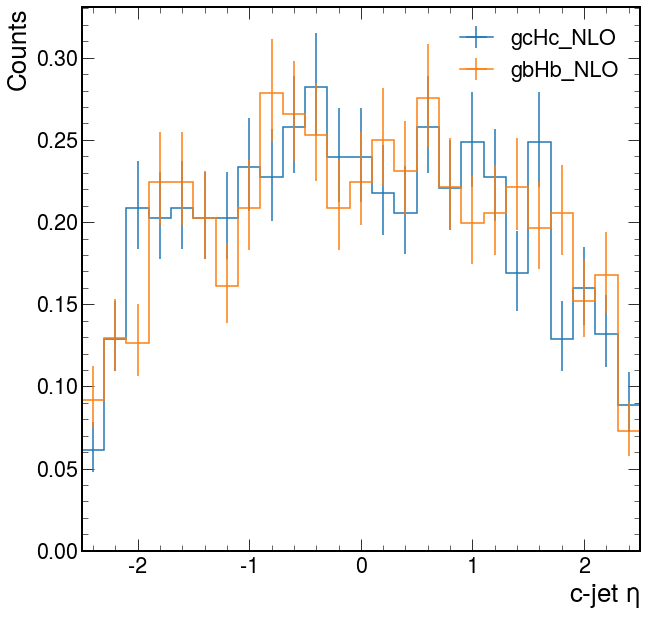

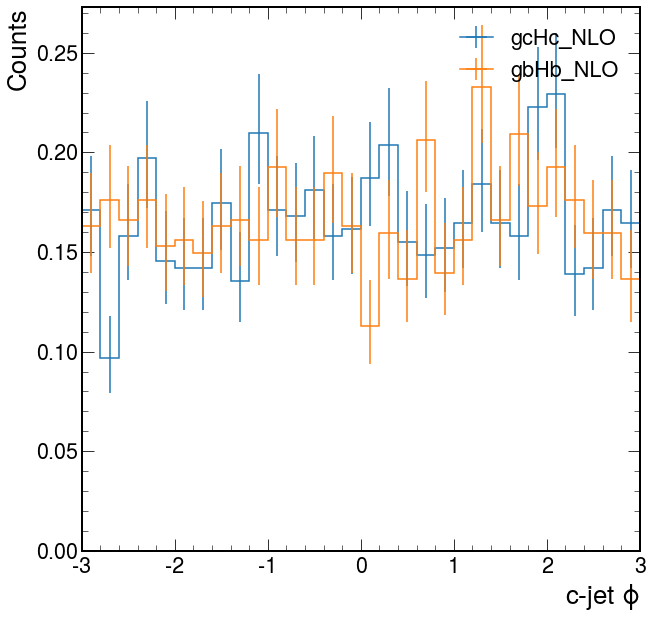

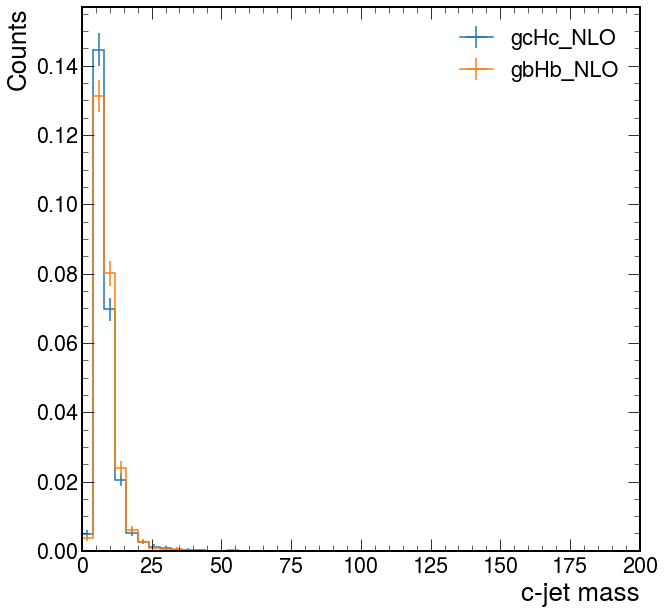

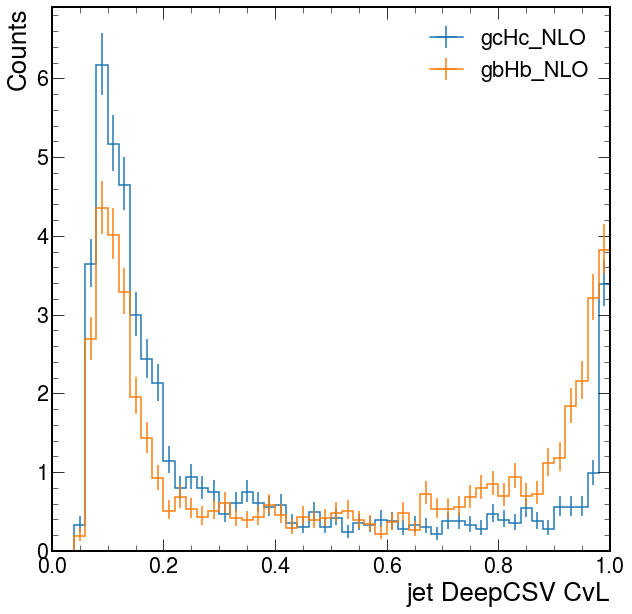

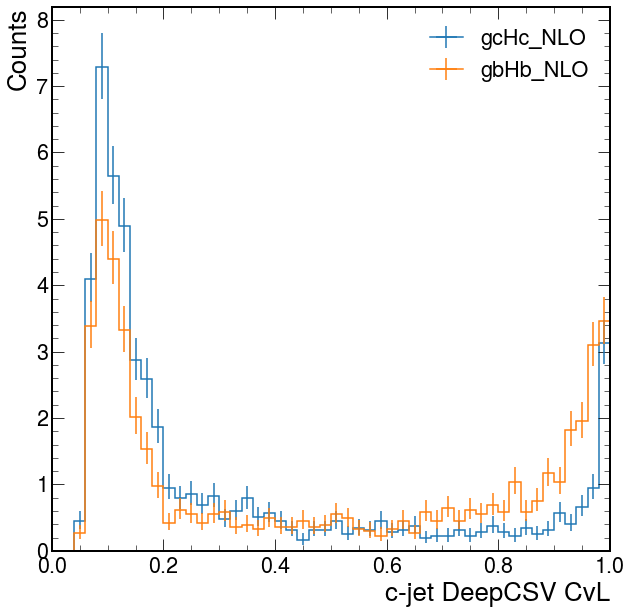

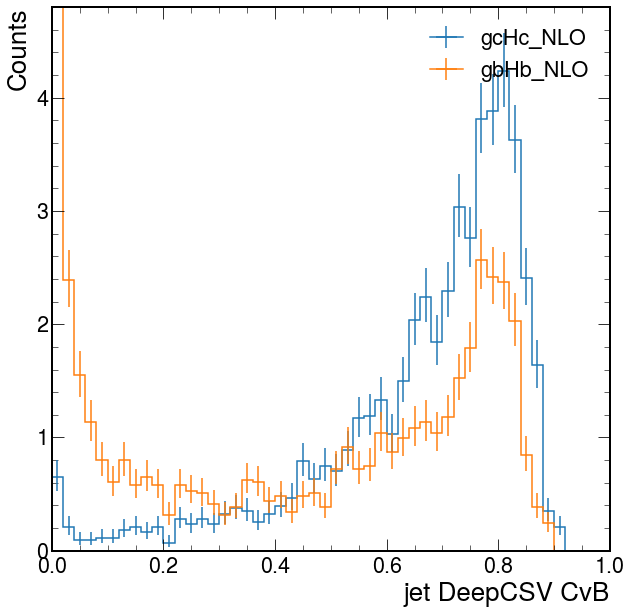

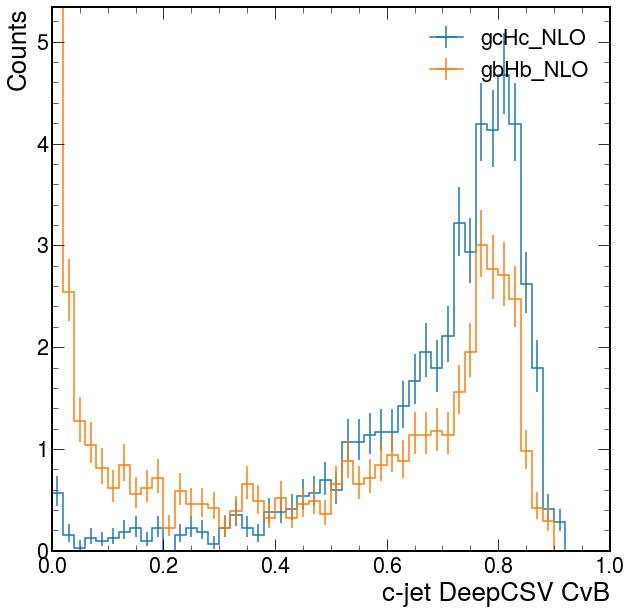

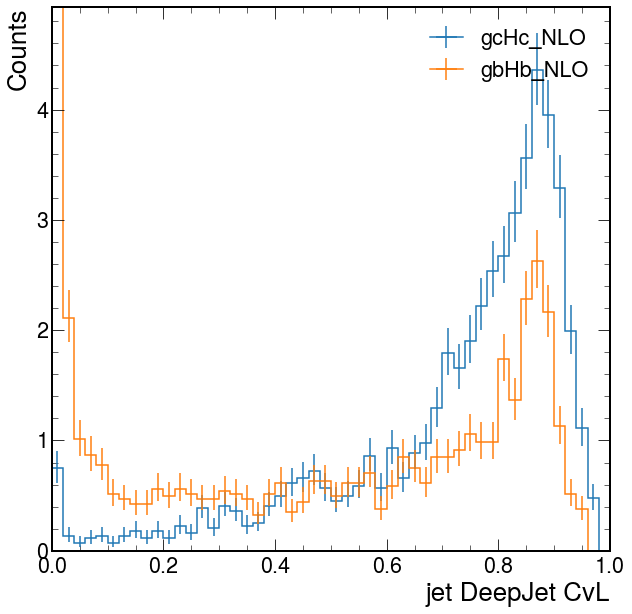

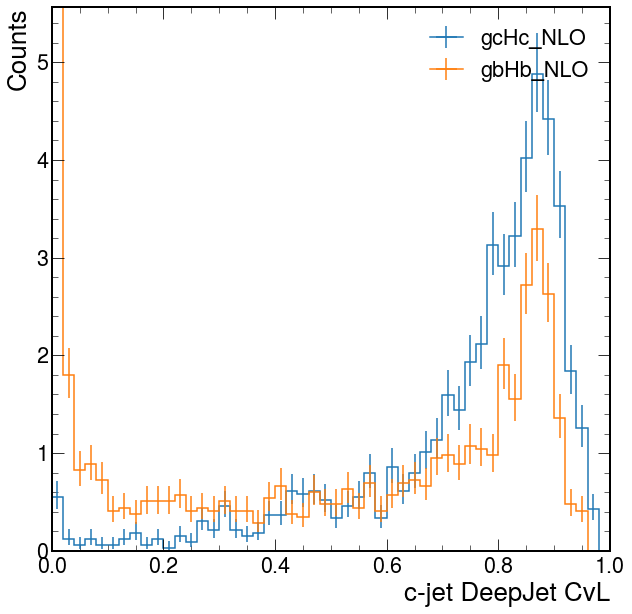

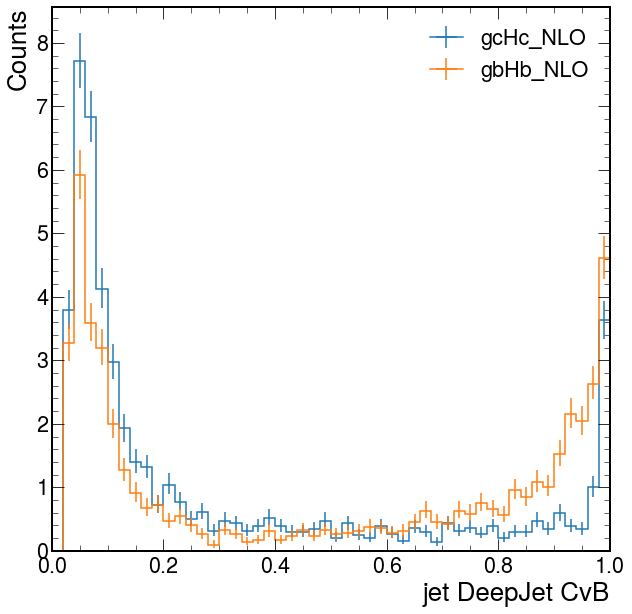

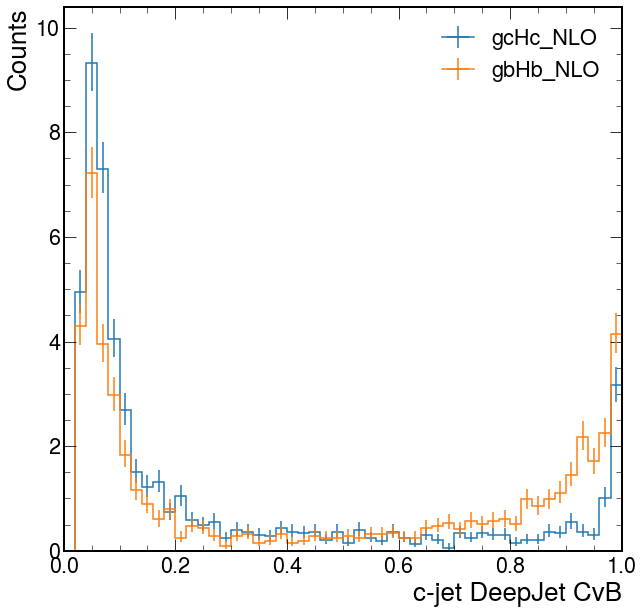

In [6]:
for var in output.keys():
    if var == 'nbj' or var == 'ncj' : continue
    if var == 'cutflow':break
    fig, ax = plt.subplots()
    
    if 'jet' in var:
        ax = plot.plot1d(output[var]['gcHc_NLO'].sum("dataset").sum("flav"),ax=ax,density=True)
        plot.plot1d(output[var]['gbHb_NLO'].sum("dataset").sum("flav"),clear=False,density=True)
    else: 
        ax = plot.plot1d(output[var]['gcHc_NLO'].sum("dataset"),ax=ax,density=True)
        ax = plot.plot1d(output[var]['gbHb_NLO'].sum("dataset"),ax=ax,clear=False,density=True)
    ax.set_xlabel(axis_dict[var])
    ax.legend(loc="upper right",handles=ax.get_legend_handles_labels()[0],labels=['gcHc_NLO','gbHb_NLO'])

In [7]:
output2=load('hists_4mu_sample_NLO.coffea')

jet b: 0.026993147250543206
jet c: 0.5645996991475848
jet pu: 0.0
jet l: 0.40840715360187196


charm jet b: 0.023860680764446456
charm jet c: 0.5629311319687889
charm jet pu: 0.0
charm jet l: 0.41320818726676467


/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)
/afs/cern.ch/user/m/milee/.conda/envs/coffea/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)


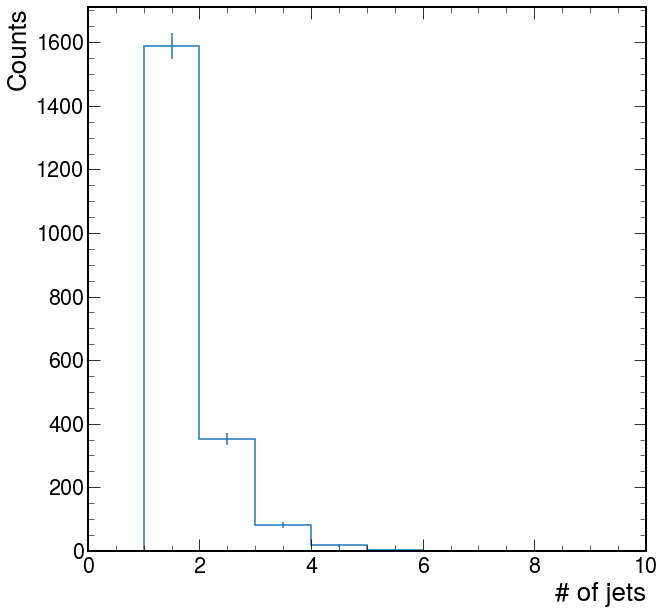

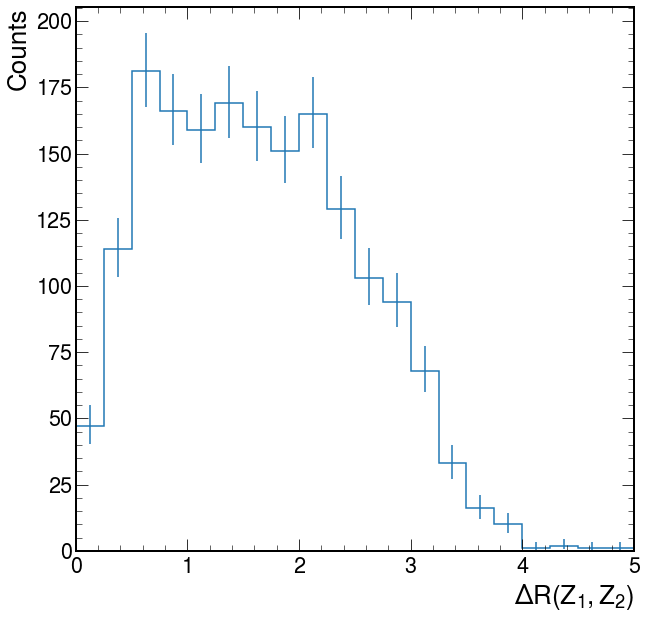

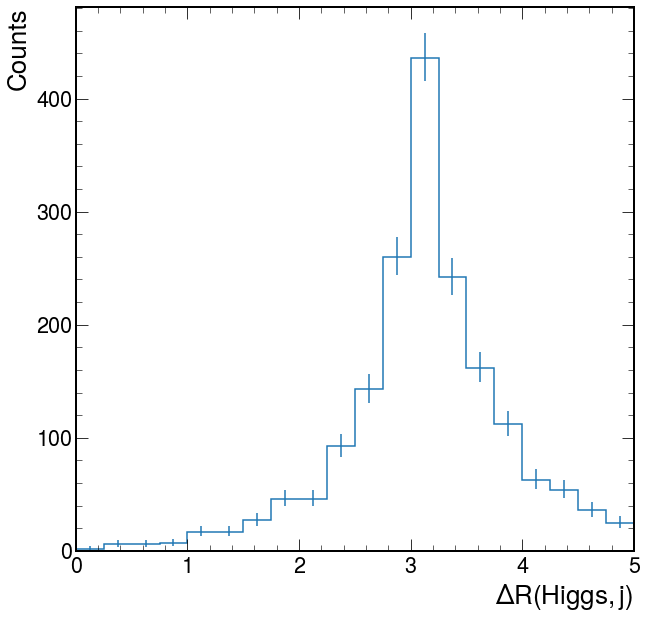

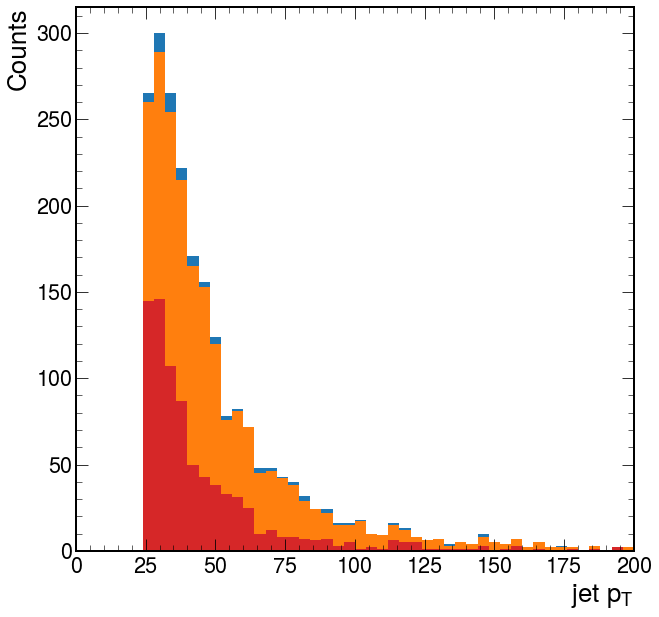

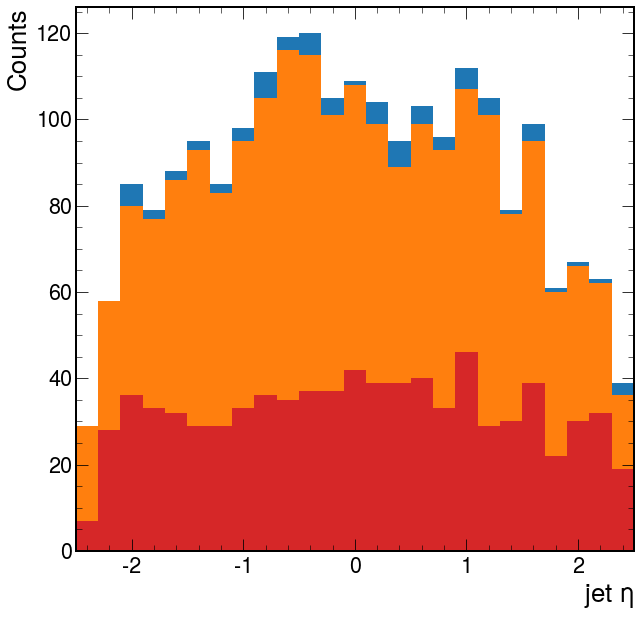

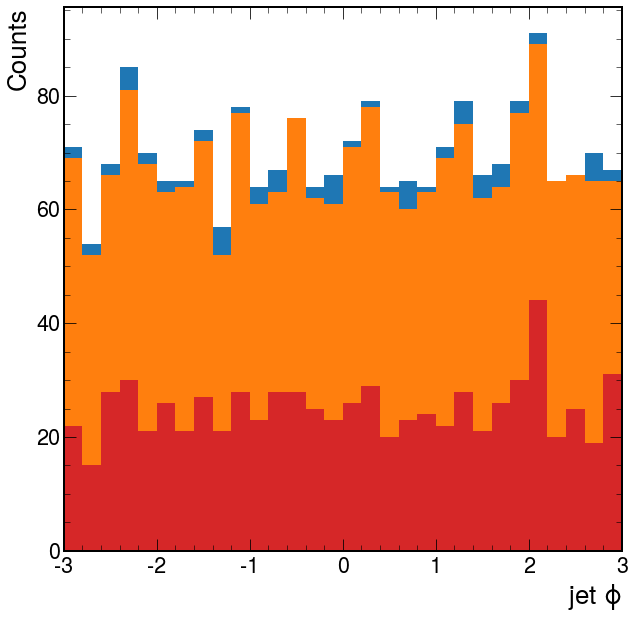

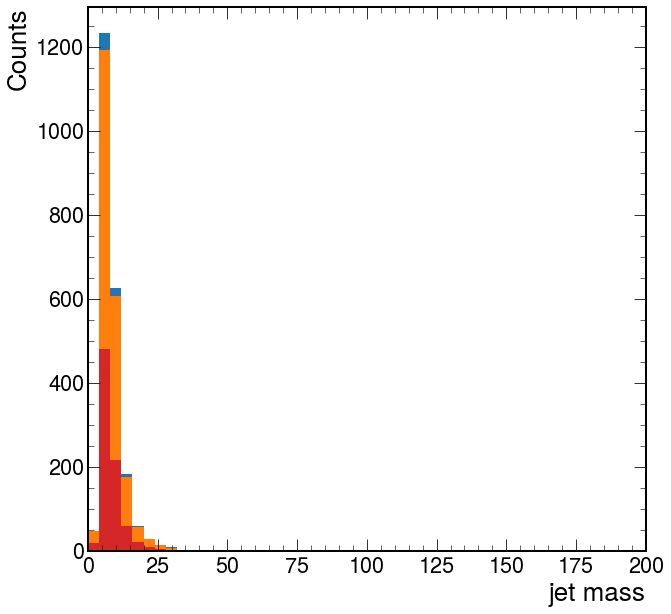

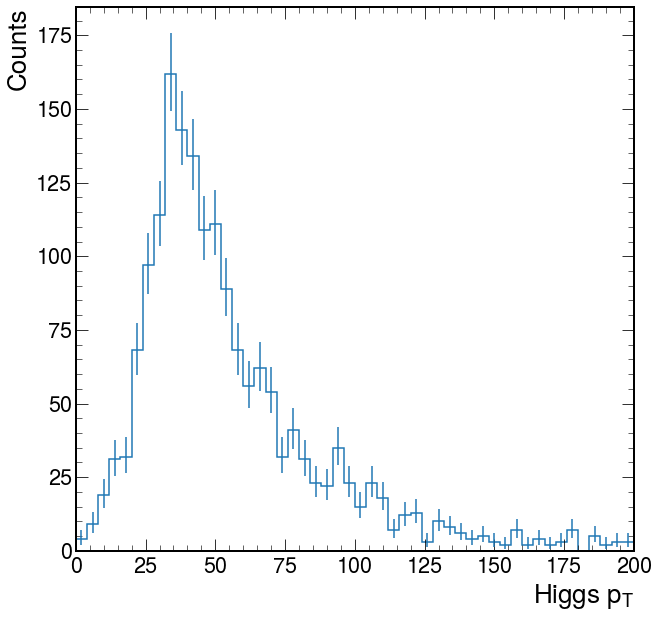

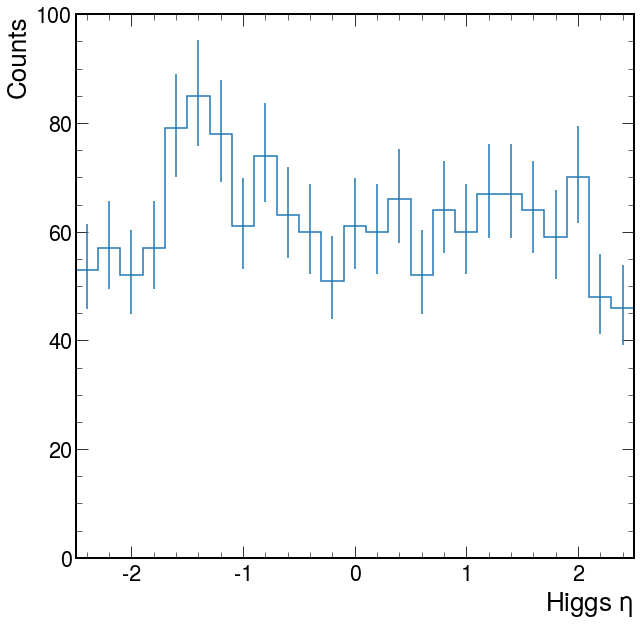

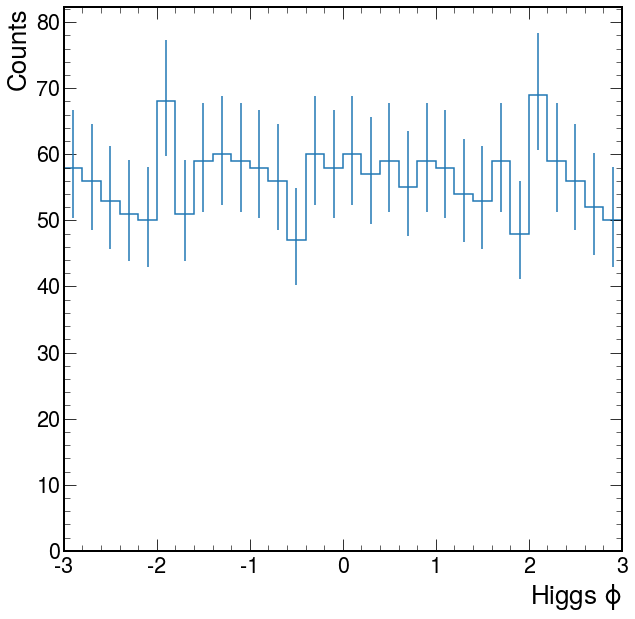

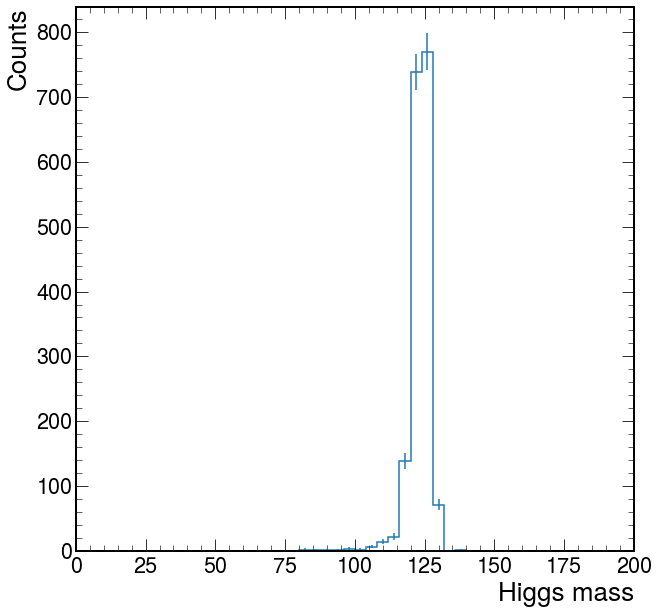

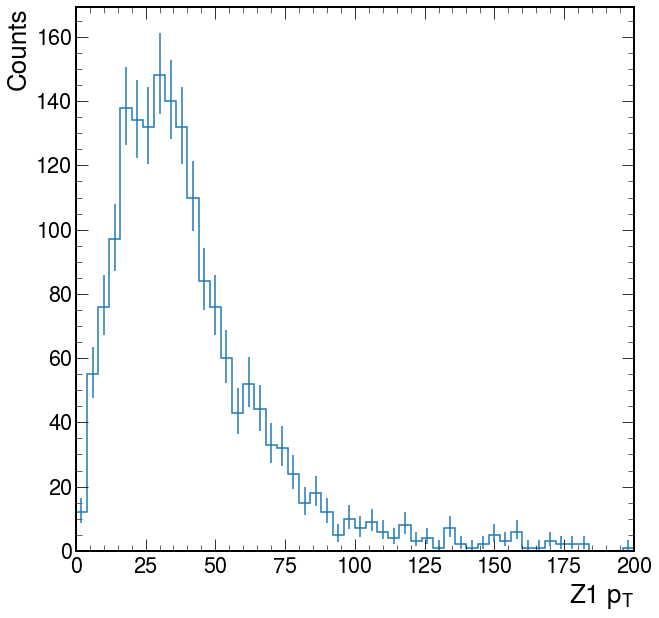

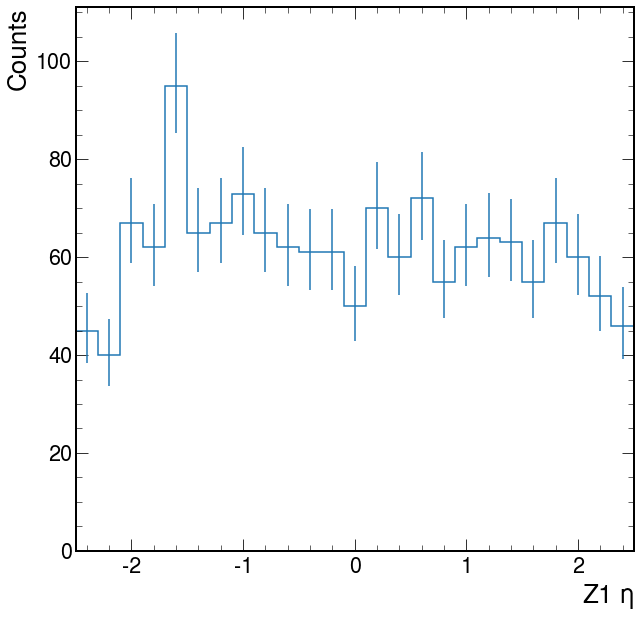

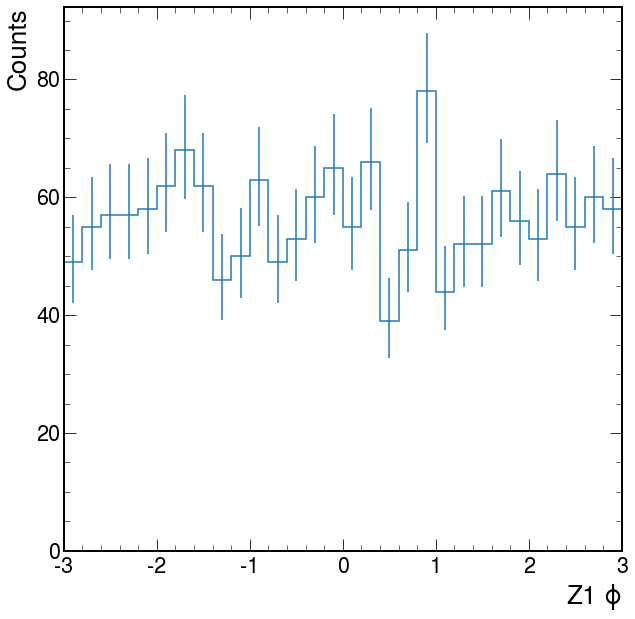

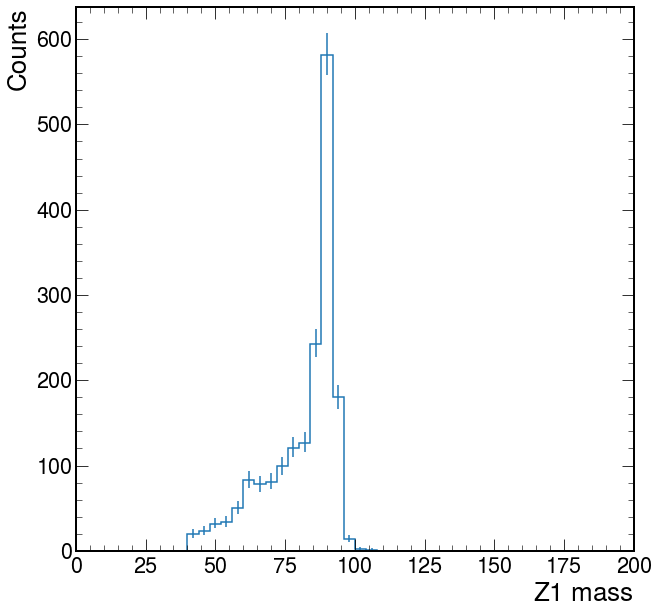

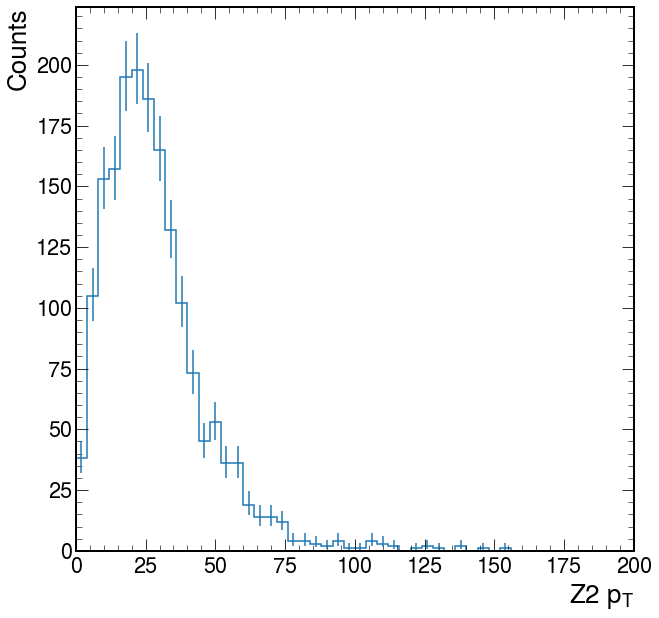

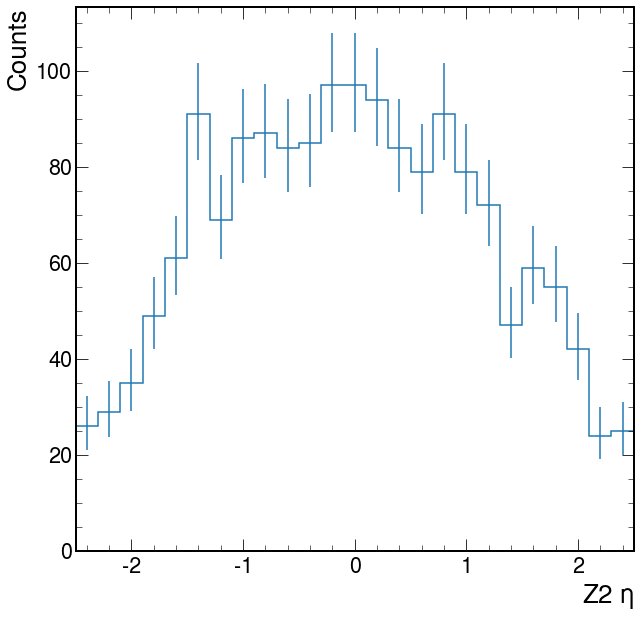

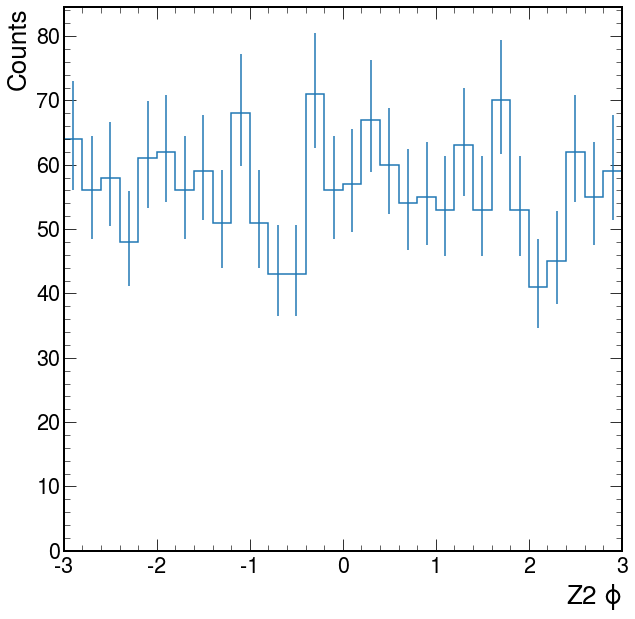

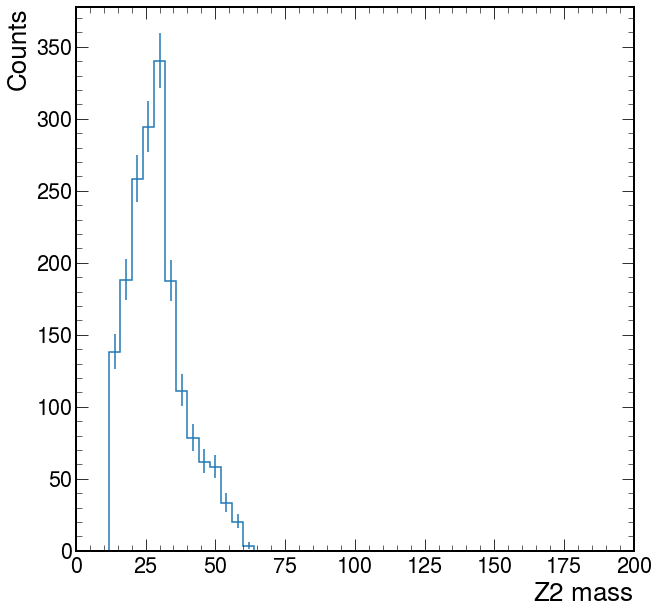

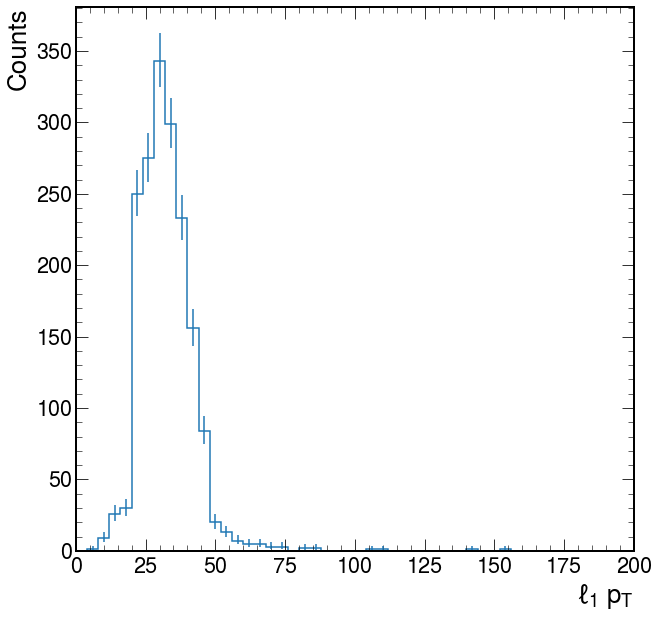

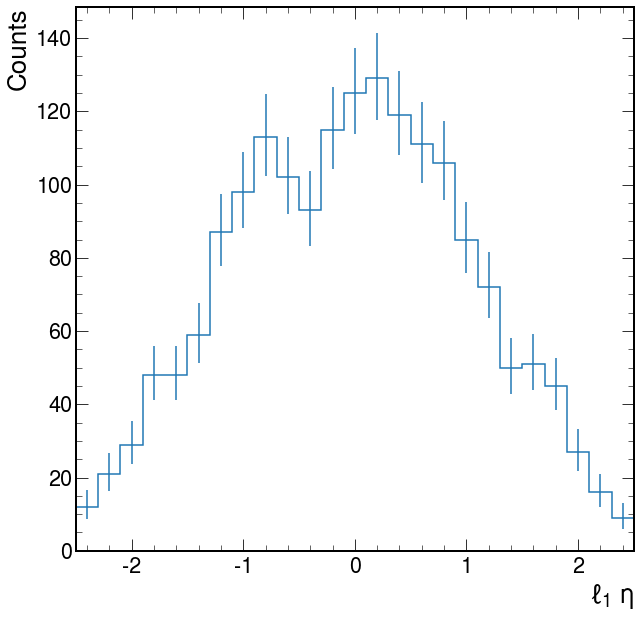

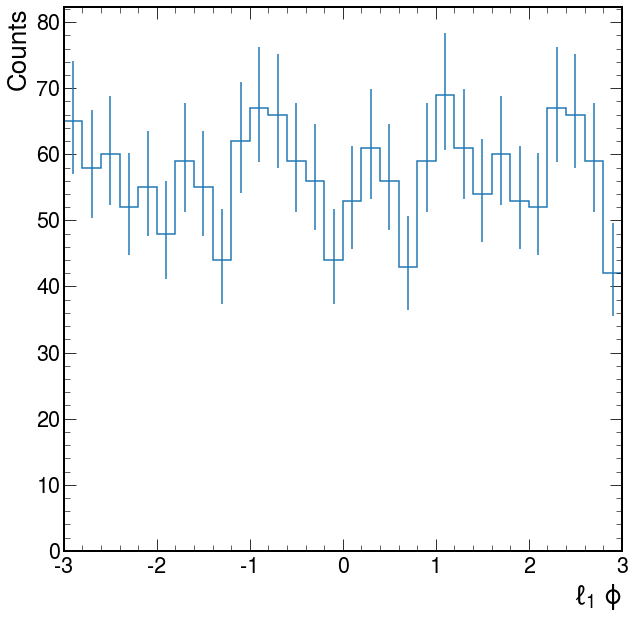

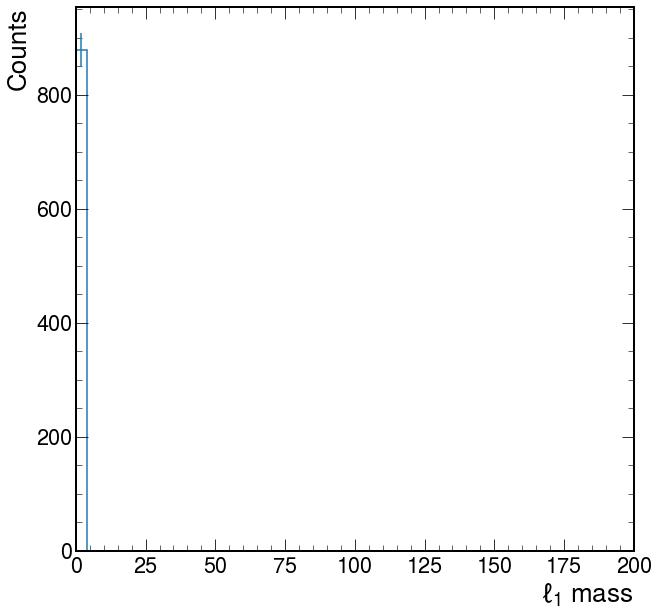

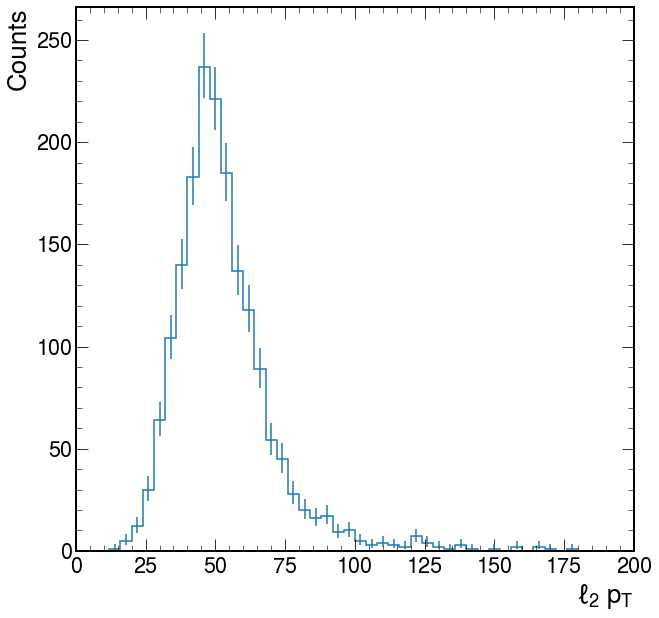

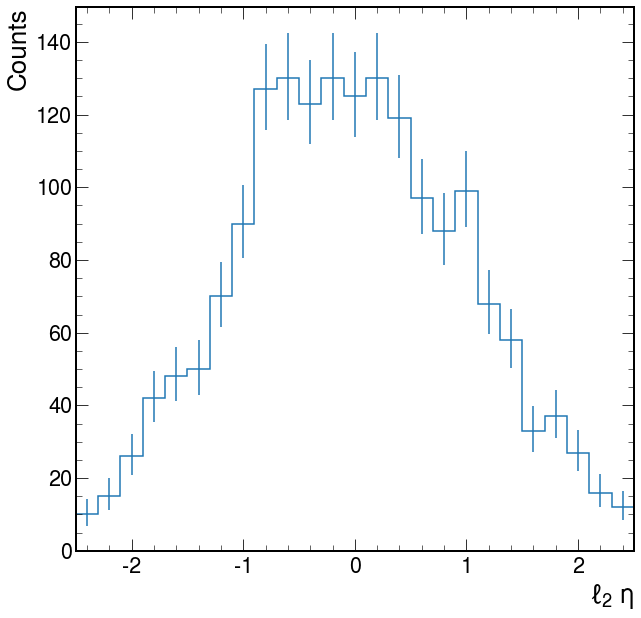

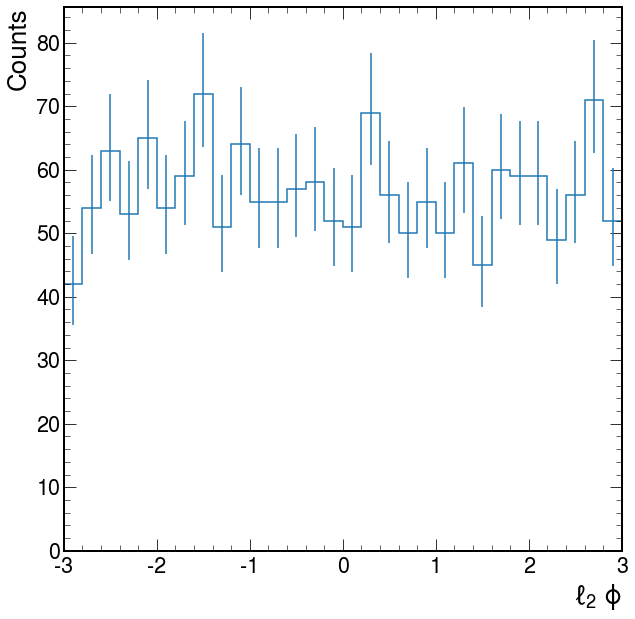

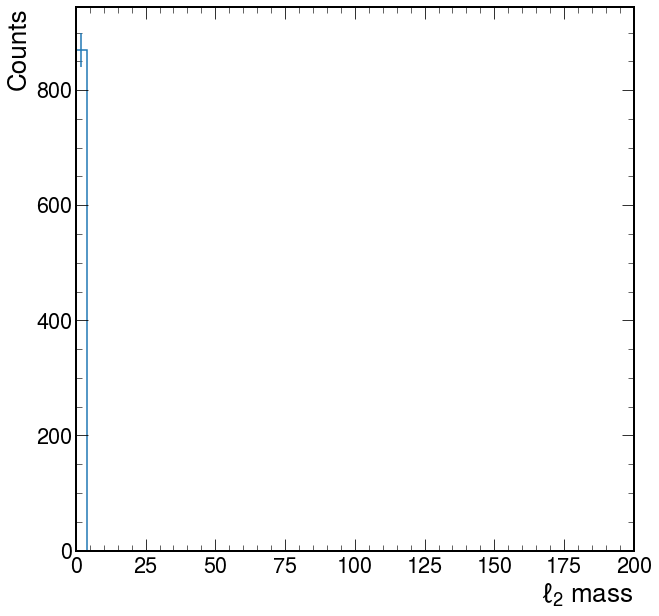

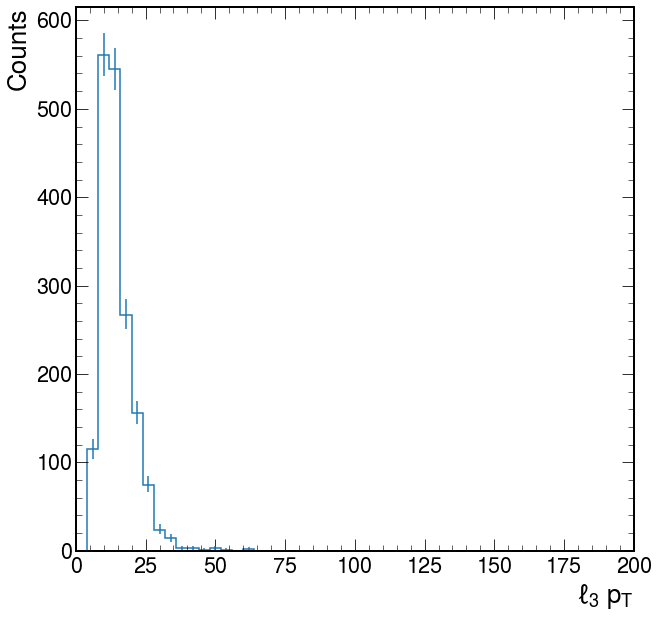

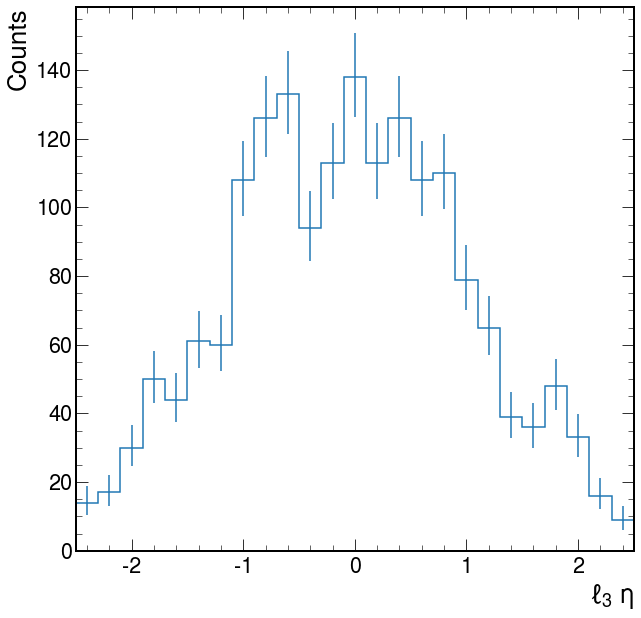

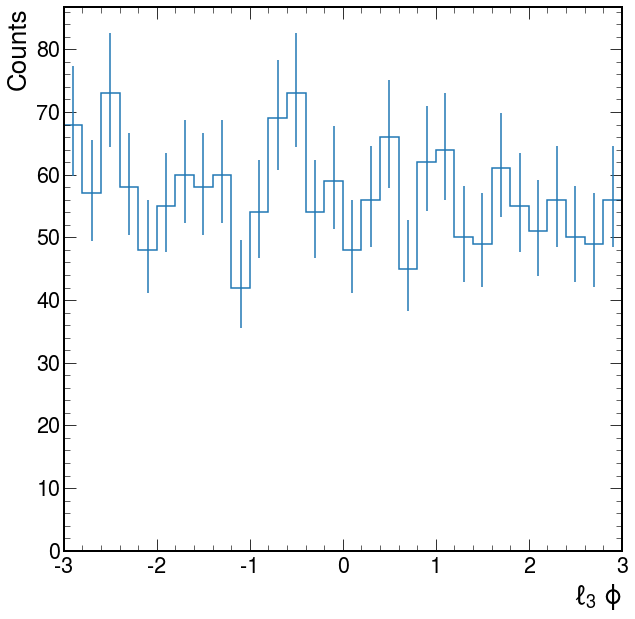

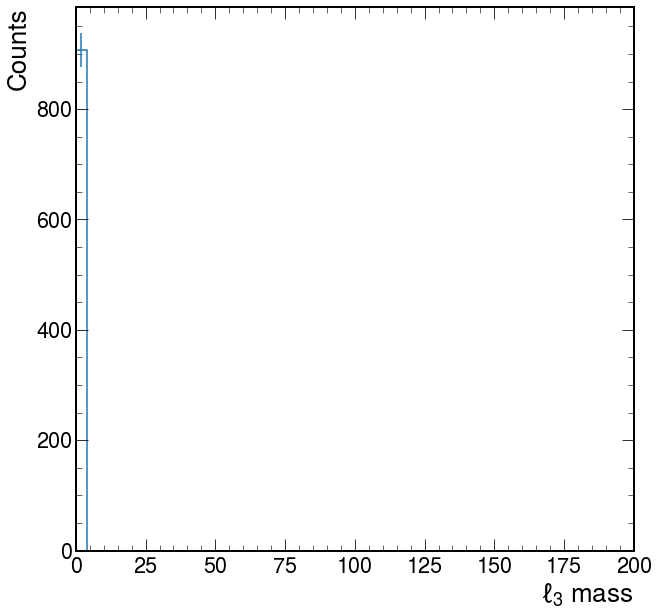

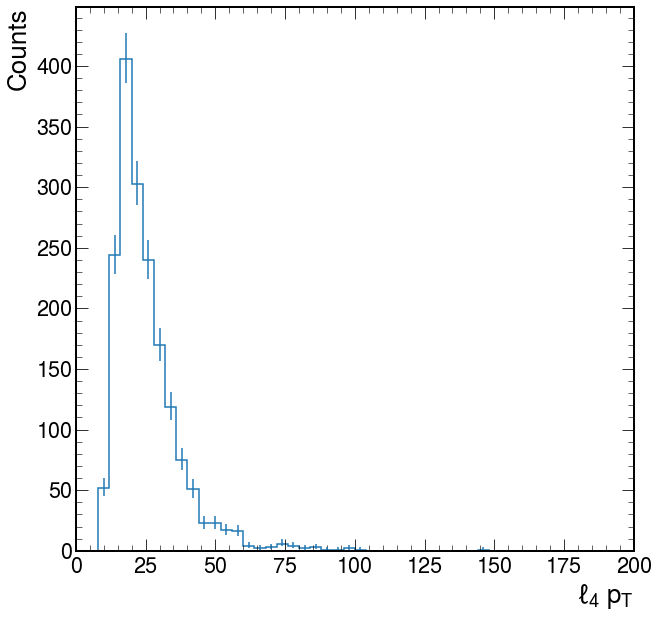

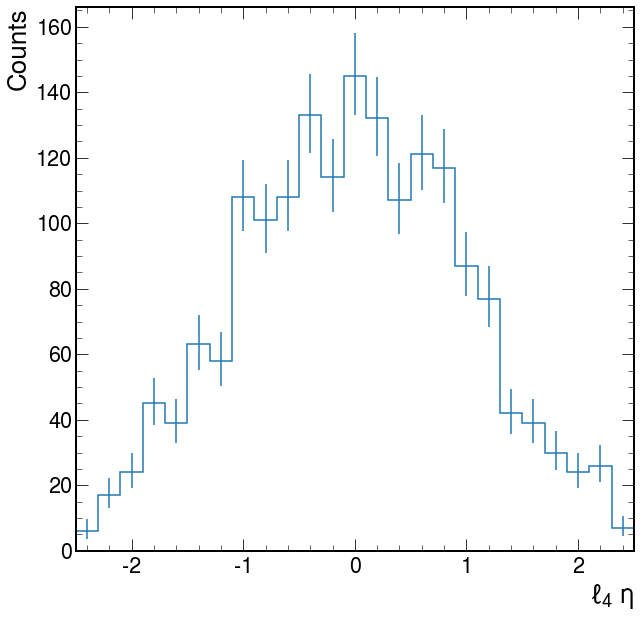

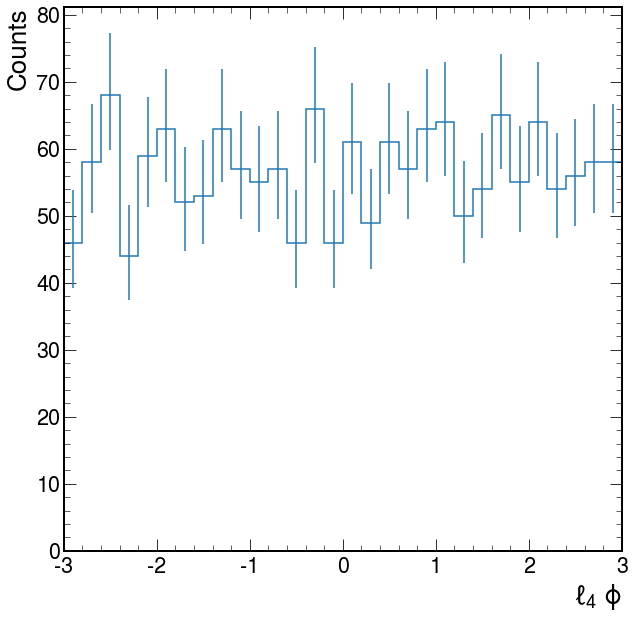

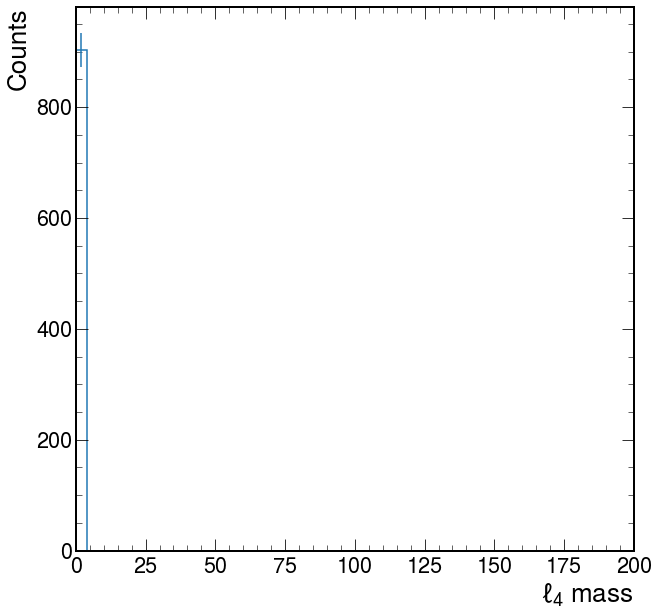

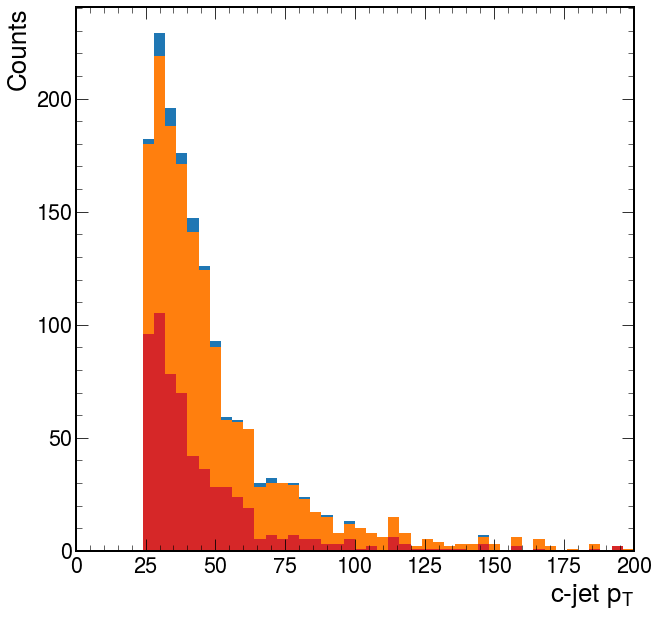

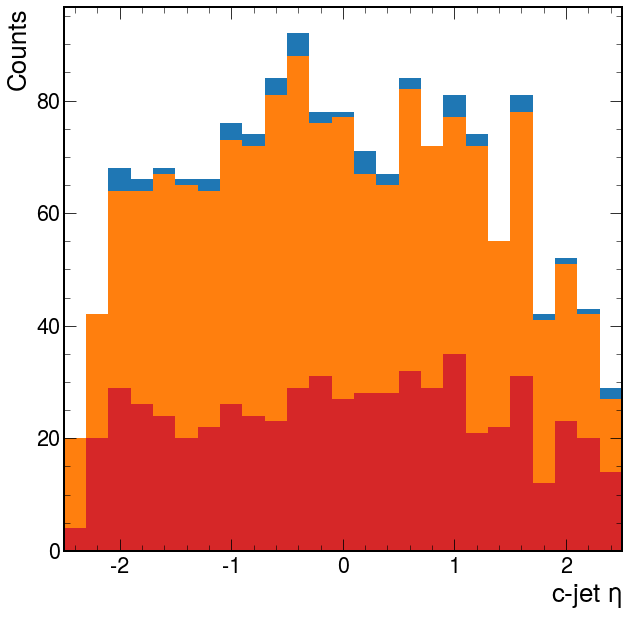

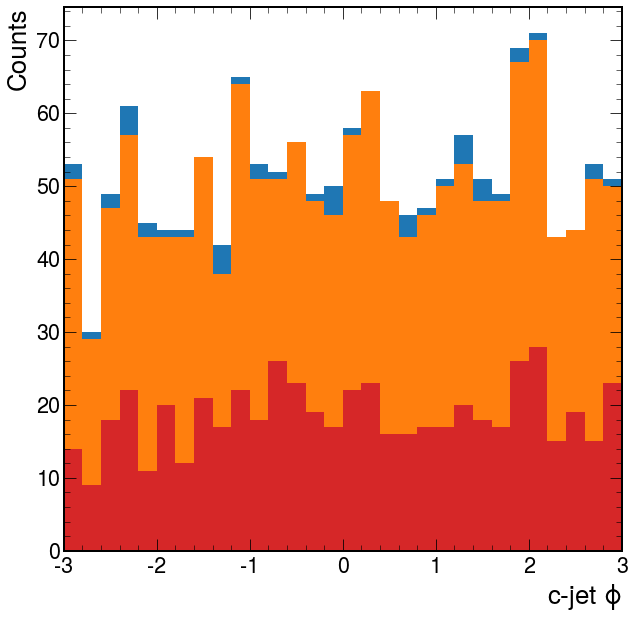

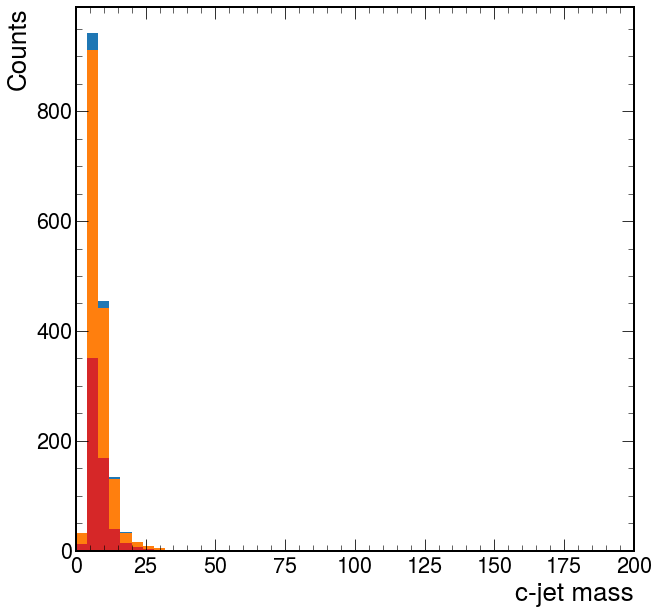

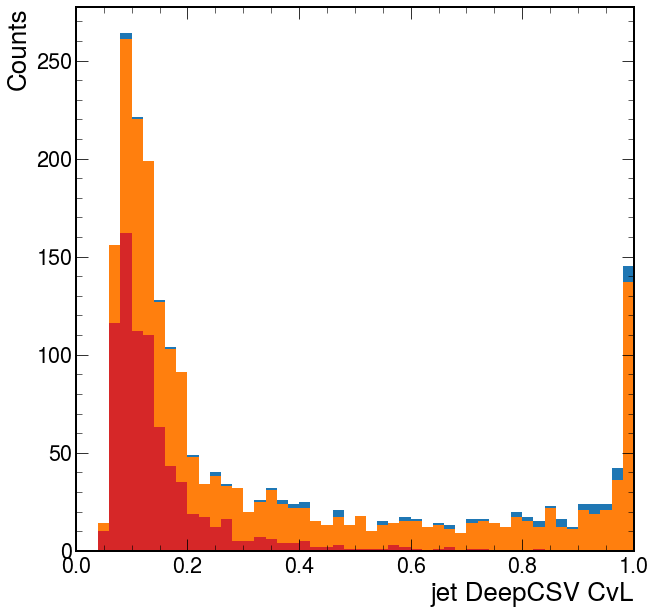

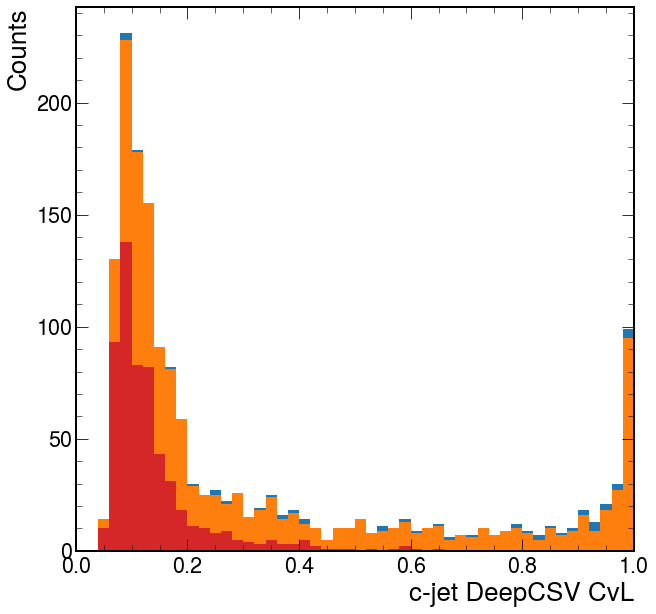

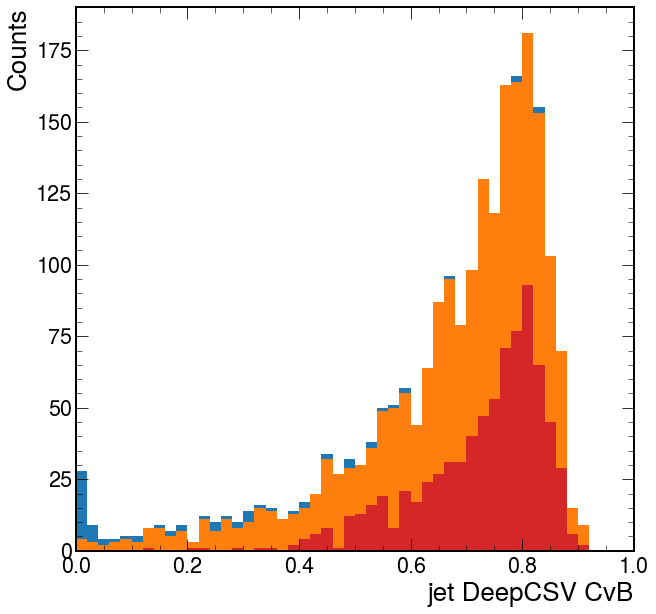

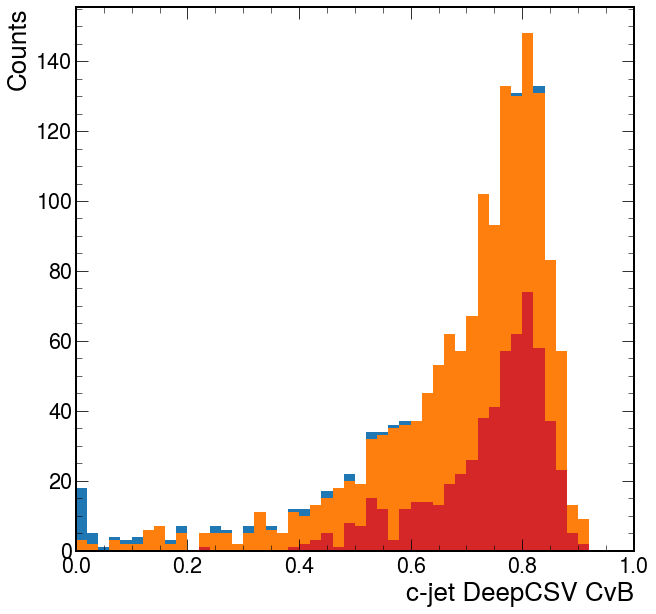

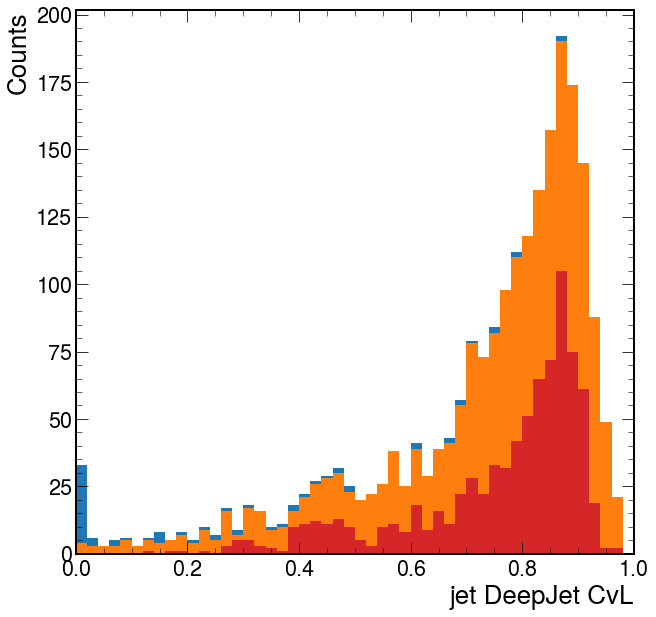

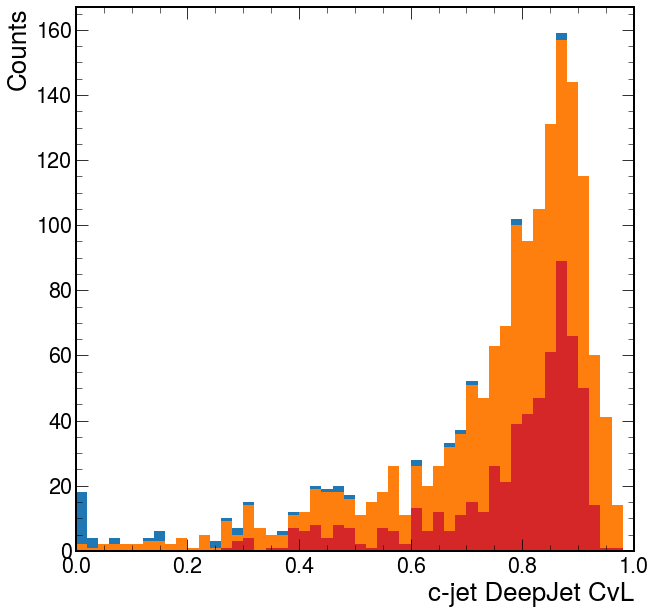

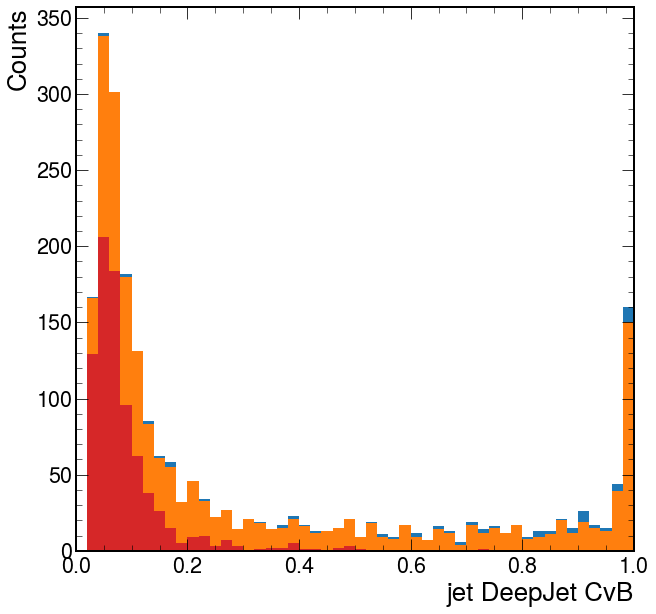

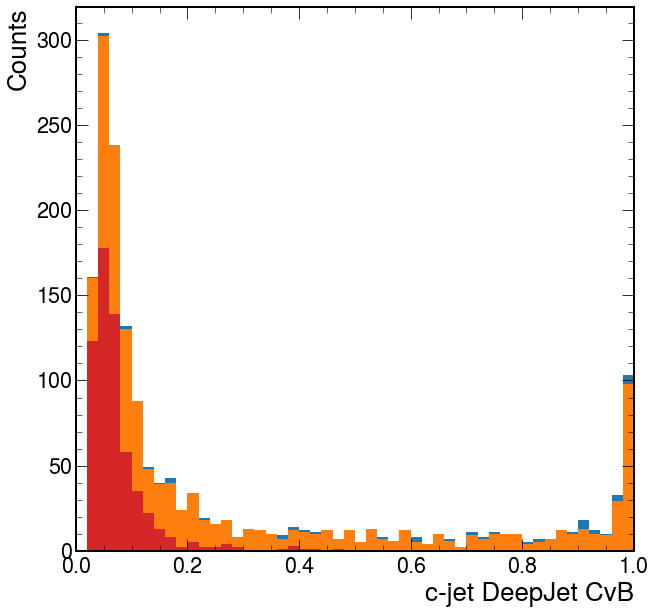

In [8]:
print("============")
print("jet b:",sum(output2['jet_pt']['gcHc_NLO'].integrate("dataset").integrate("flav",slice(5,6)).values()[()])/sum(output2['jet_pt']['gcHc_NLO'].integrate("dataset").integrate("flav").values()[()]))
print("jet c:",sum(output2['jet_pt']['gcHc_NLO'].integrate("dataset").integrate("flav",slice(4,5)).values()[()])/sum(output2['jet_pt']['gcHc_NLO'].integrate("dataset").integrate("flav").values()[()]))
print("jet pu:",sum(output2['jet_pt']['gcHc_NLO'].integrate("dataset").integrate("flav",slice(1,4)).values()[()])/sum(output2['jet_pt']['gcHc_NLO'].integrate("dataset").integrate("flav").values()[()]))
print("jet l:",sum(output2['jet_pt']['gcHc_NLO'].integrate("dataset").integrate("flav",slice(0,1)).values()[()])/sum(output2['jet_pt']['gcHc_NLO'].integrate("dataset").integrate("flav").values()[()]))
print('\n')
print("charm jet b:",sum(output2['jetcharm_pt']['gcHc_NLO'].integrate("dataset").integrate("flav",slice(5,6)).values()[()])/sum(output2['jetcharm_pt']['gcHc_NLO'].integrate("dataset").integrate("flav").values()[()]))
print("charm jet c:",sum(output2['jetcharm_pt']['gcHc_NLO'].integrate("dataset").integrate("flav",slice(4,5)).values()[()])/sum(output2['jetcharm_pt']['gcHc_NLO'].integrate("dataset").integrate("flav").values()[()]))
print("charm jet pu:",sum(output2['jetcharm_pt']['gcHc_NLO'].integrate("dataset").integrate("flav",slice(1,4)).values()[()])/sum(output2['jetcharm_pt']['gcHc_NLO'].integrate("dataset").integrate("flav").values()[()]))
print("charm jet l:",sum(output2['jetcharm_pt']['gcHc_NLO'].integrate("dataset").integrate("flav",slice(0,1)).values()[()])/sum(output2['jetcharm_pt']['gcHc_NLO'].integrate("dataset").integrate("flav").values()[()]))
print("============")
for var in output2.keys():
    if var == 'nbj' or var == 'ncj' : continue
    if var == 'cutflow':break
    fig2, ax2 = plt.subplots()

# fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
# fig.subplots_adjust(hspace=.07)
    
    if 'jet' in var: 
        ax2 = plot.plot1d(output[var]['gcHc_NLO'].sum("dataset"),overlay="flav",stack=True,ax=ax2)
        ax2.legend(loc="upper right",handles=ax2.get_legend_handles_labels()[0],labels=['b','c','pu','light'])
    else: ax2 = plot.plot1d(output[var]['gcHc_NLO'].sum("dataset"),ax=ax2)
    ax2.set_xlabel(axis_dict[var])
    ax2.get_legend().remove()

/afs/cern.ch/user/m/milee/.conda/envs/coffea/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


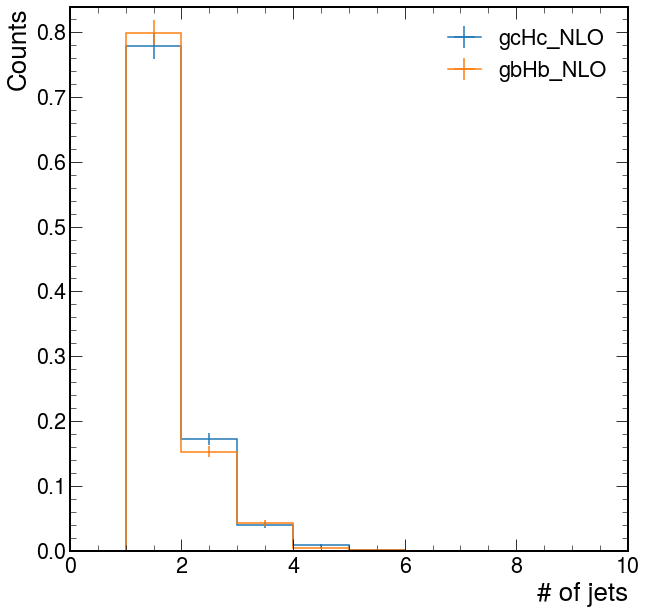

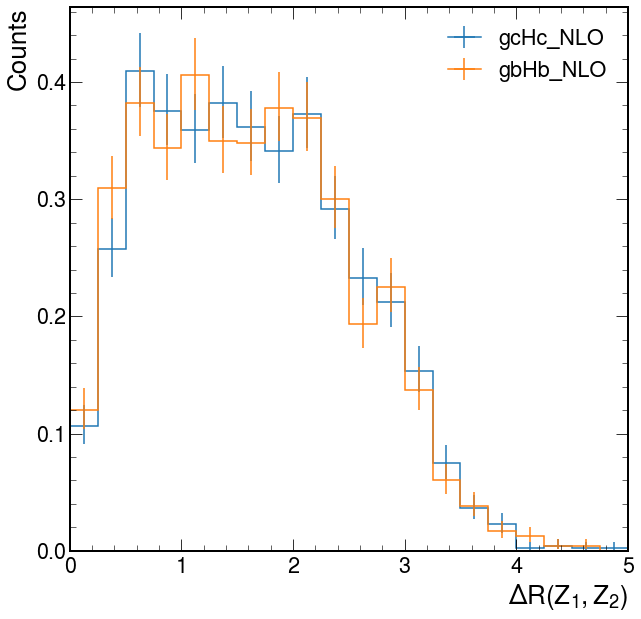

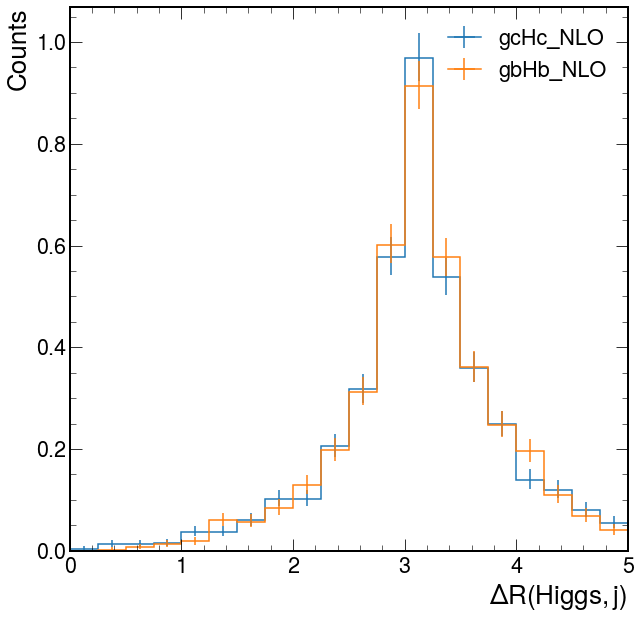

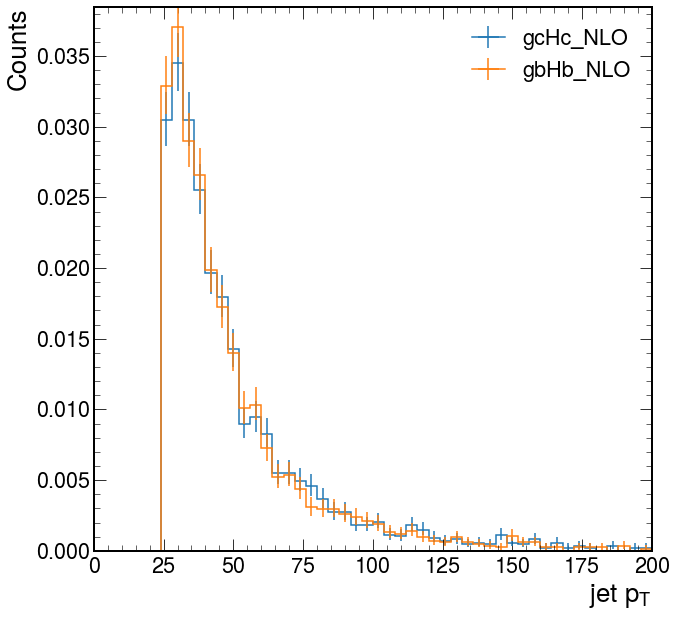

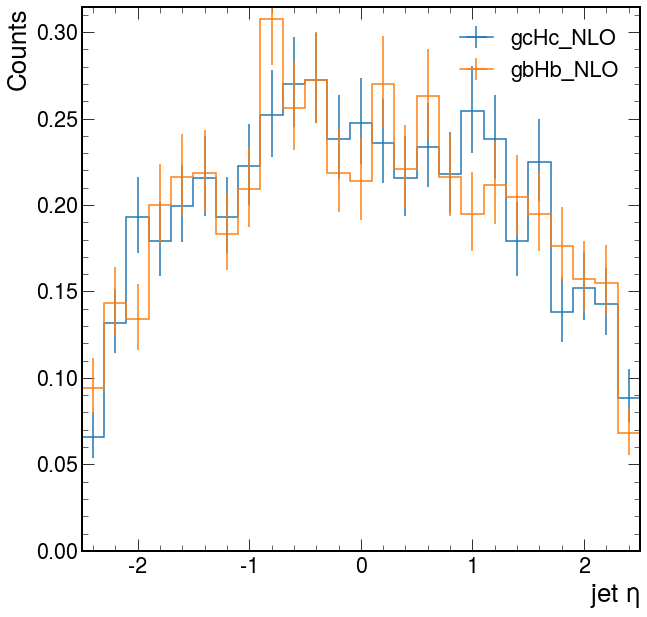

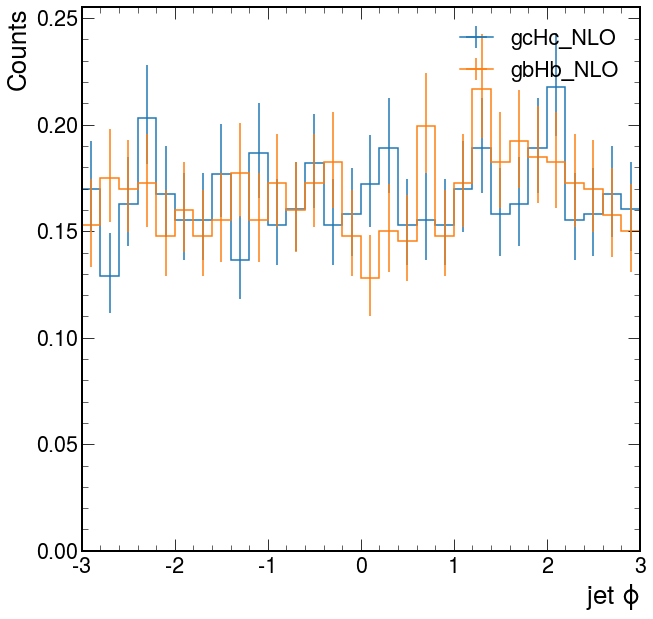

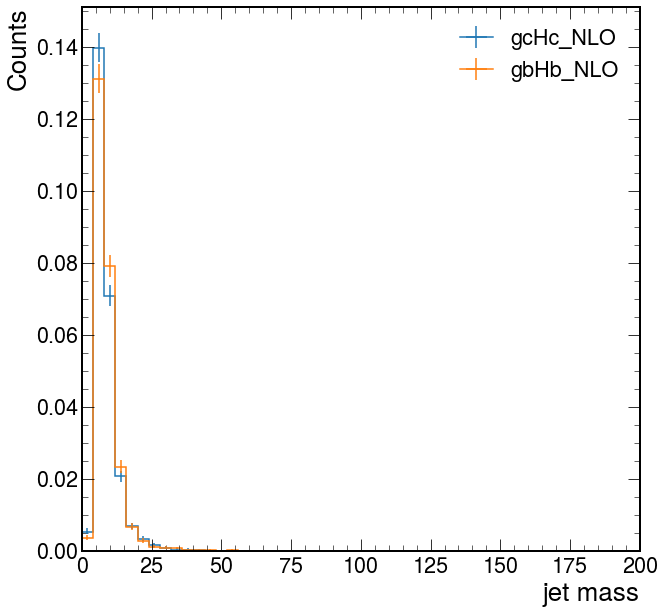

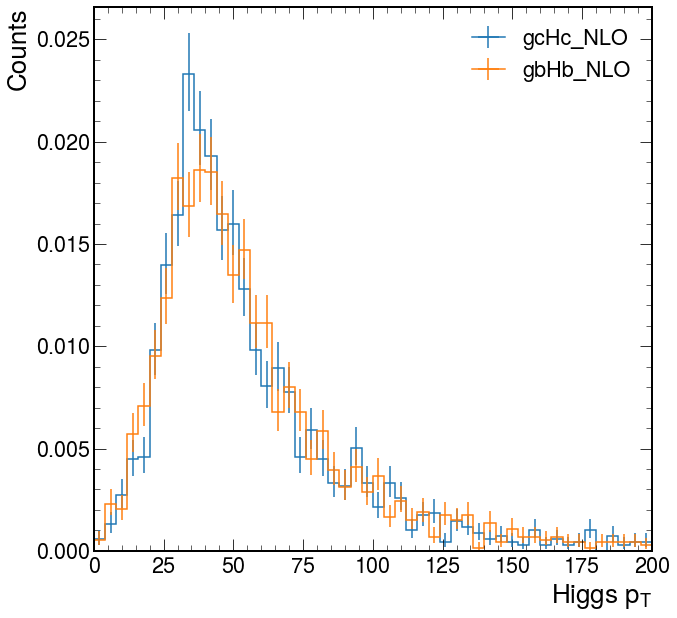

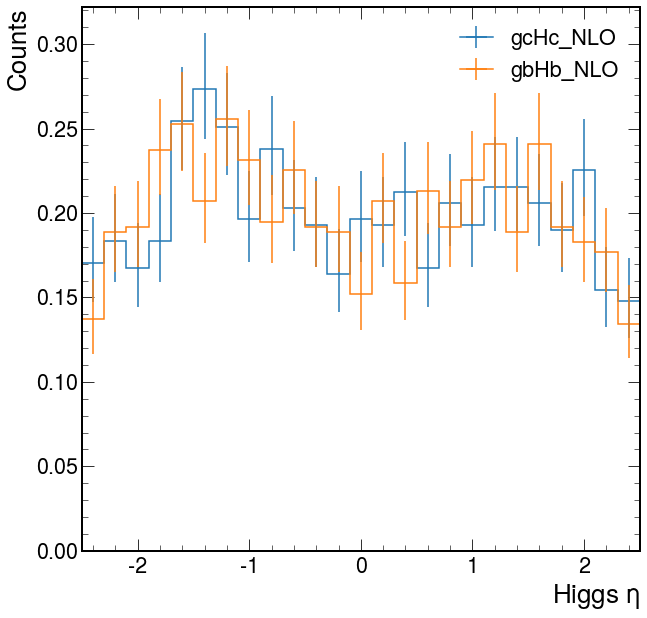

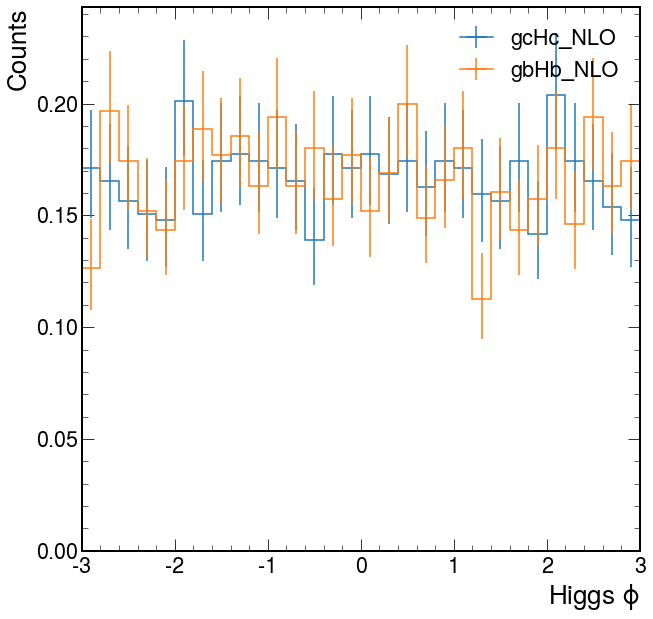

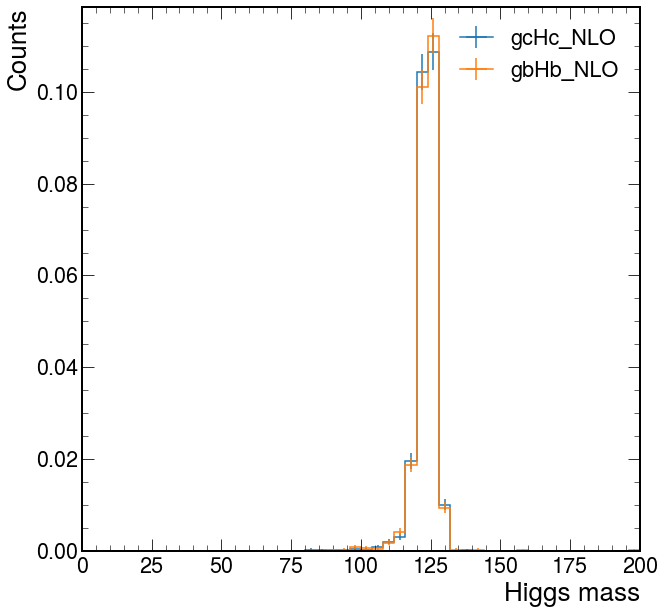

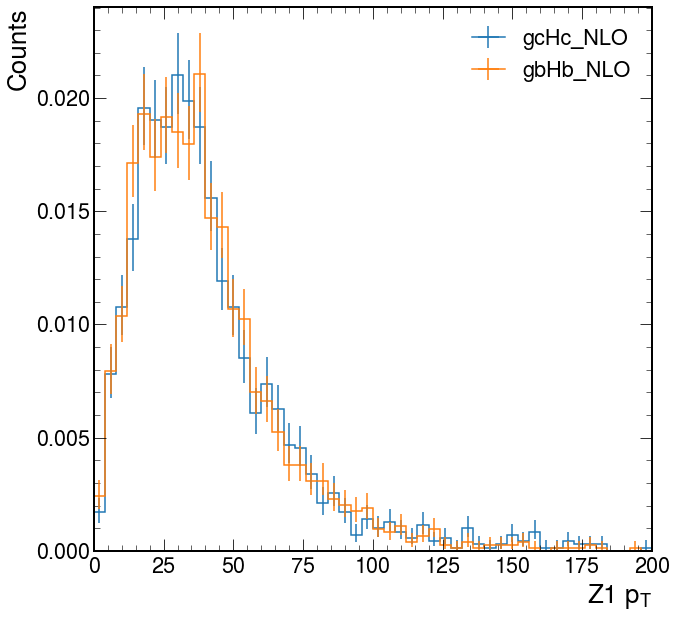

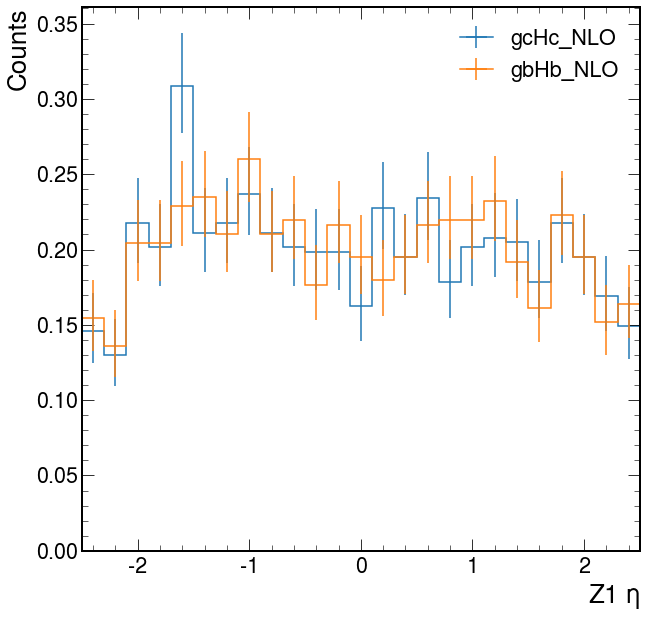

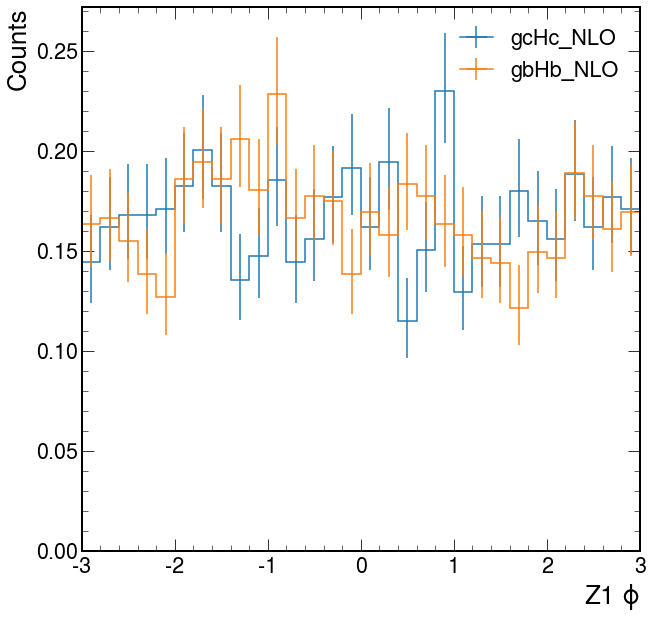

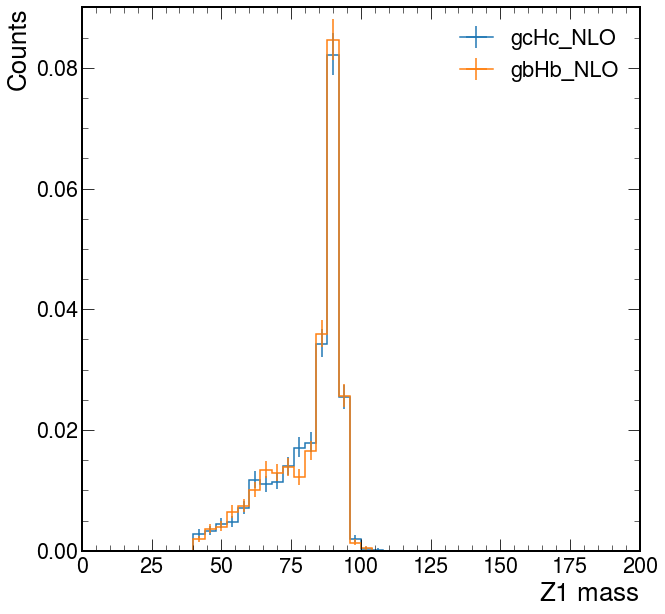

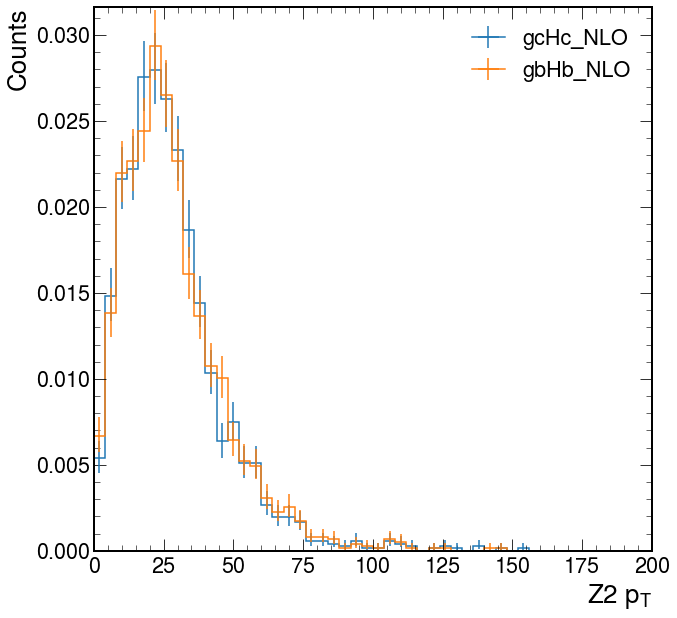

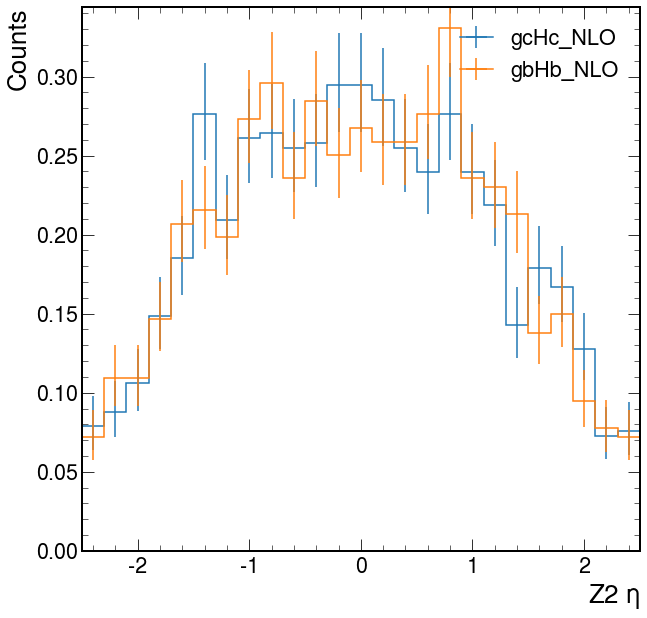

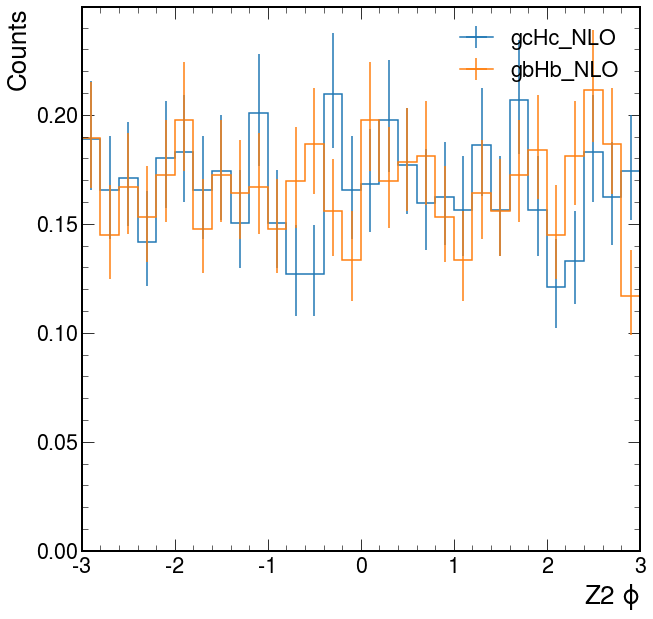

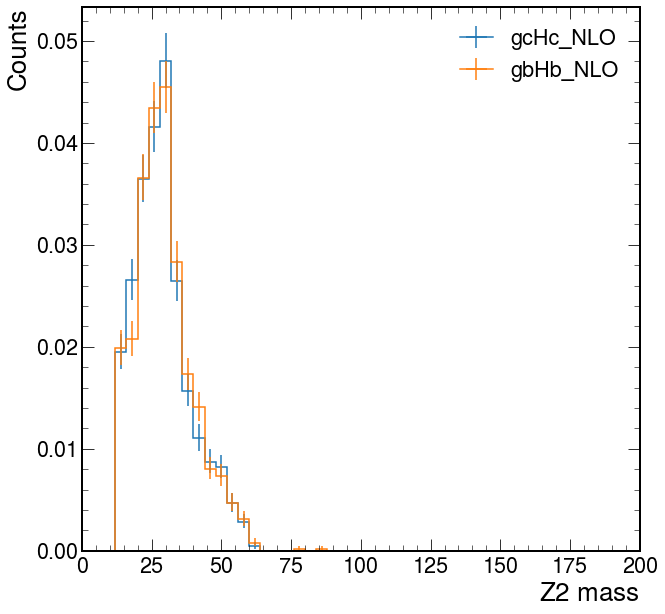

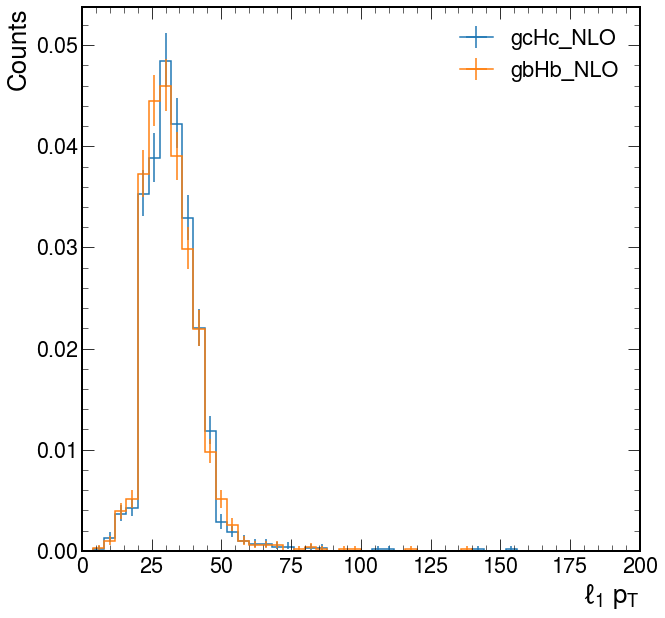

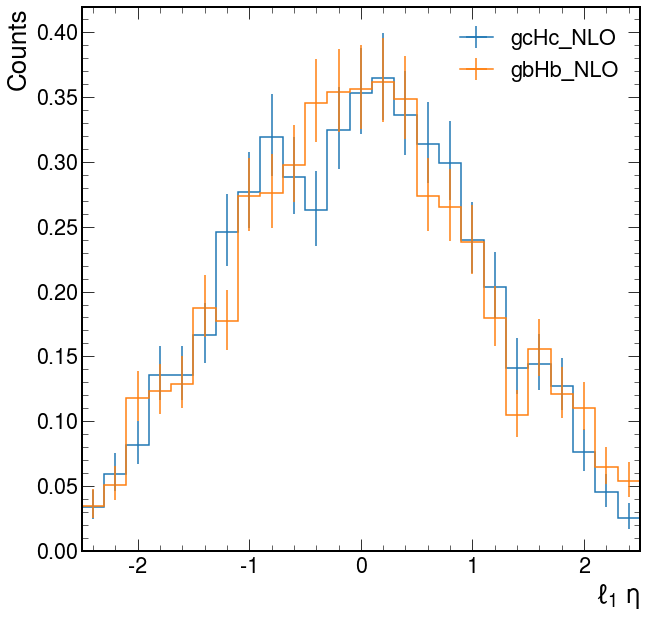

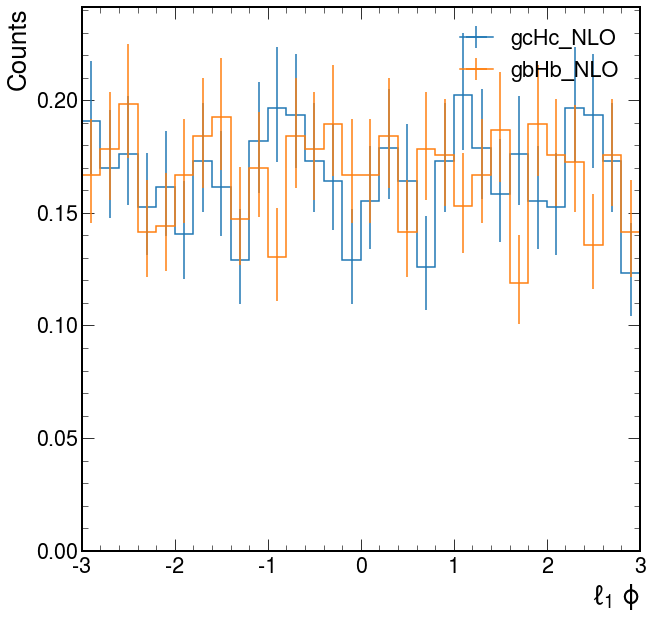

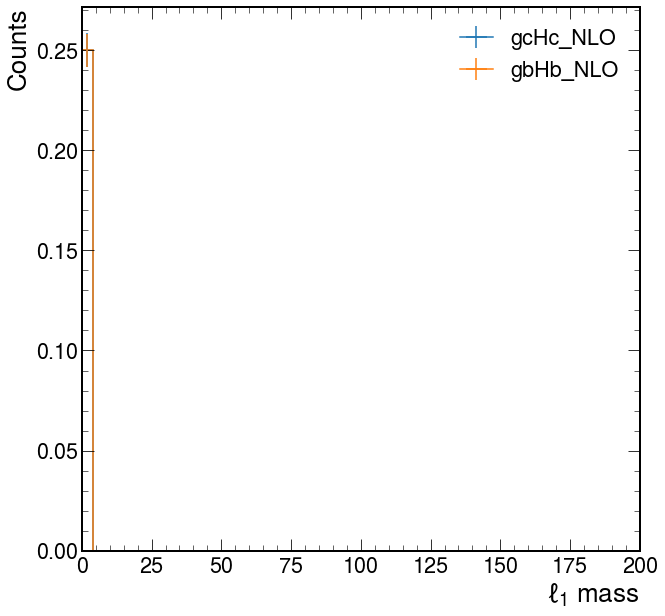

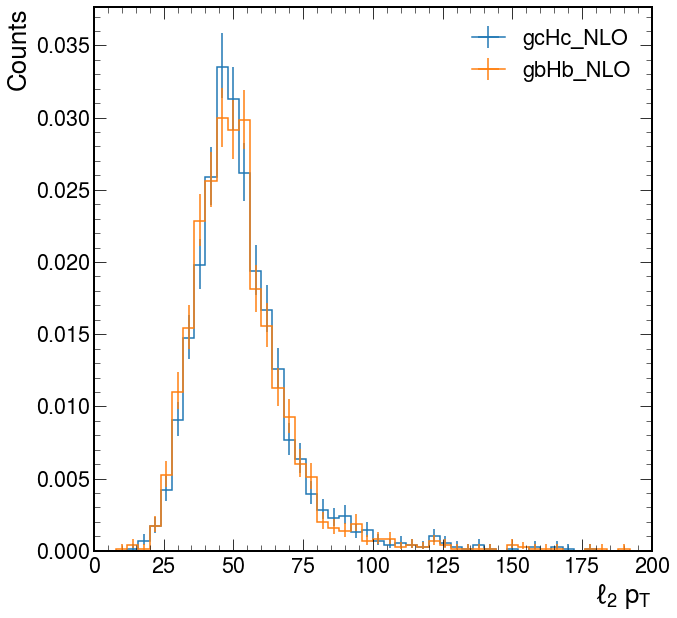

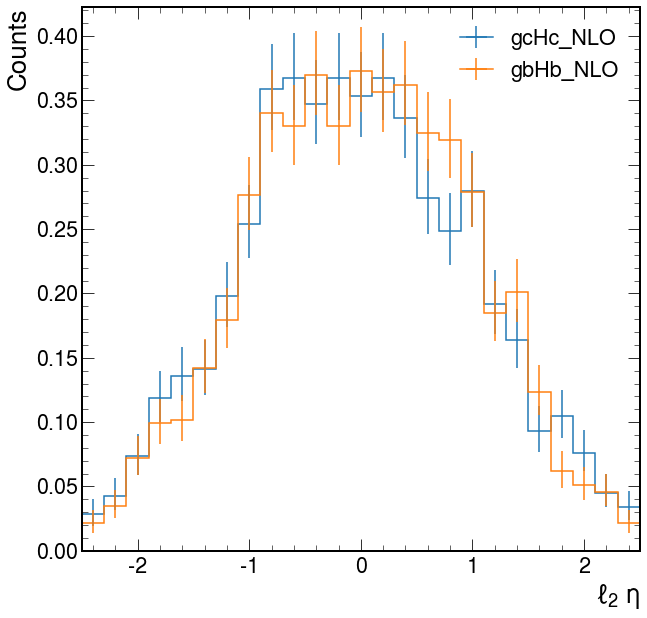

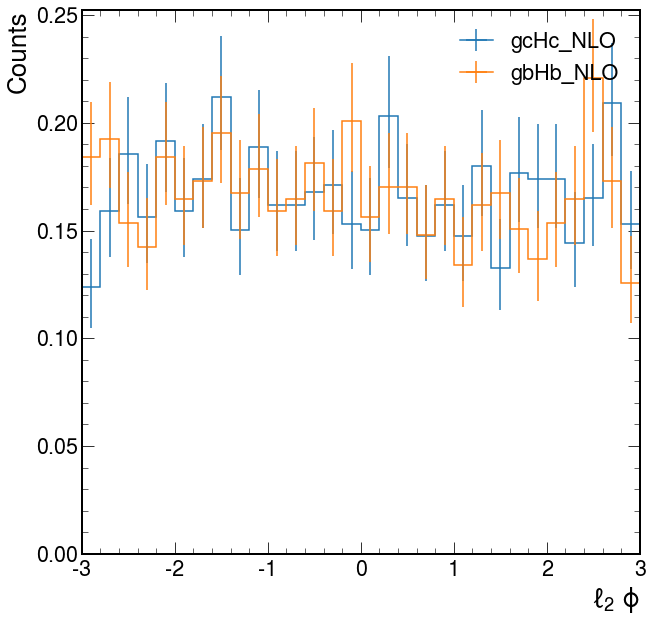

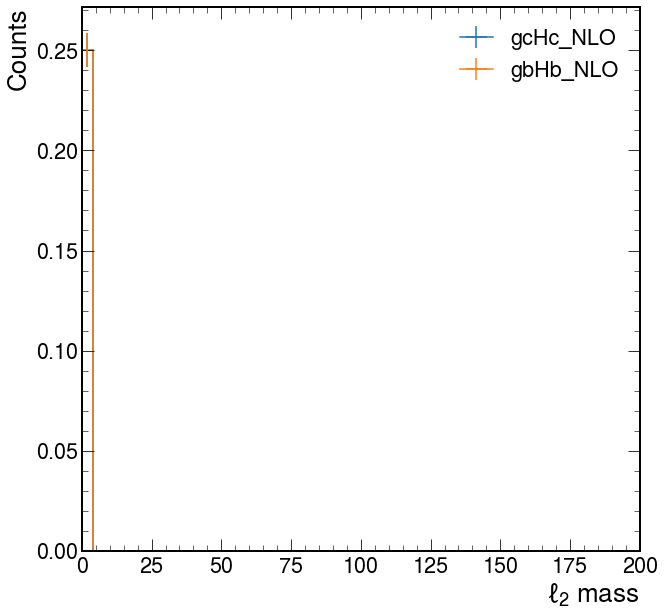

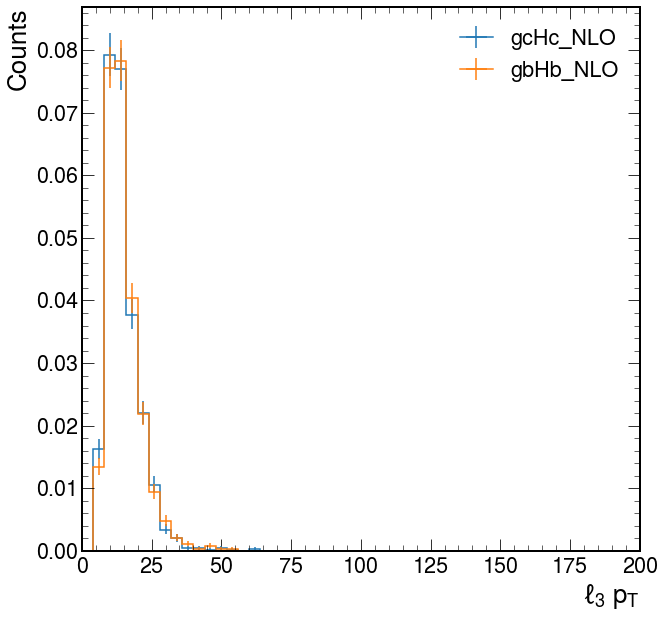

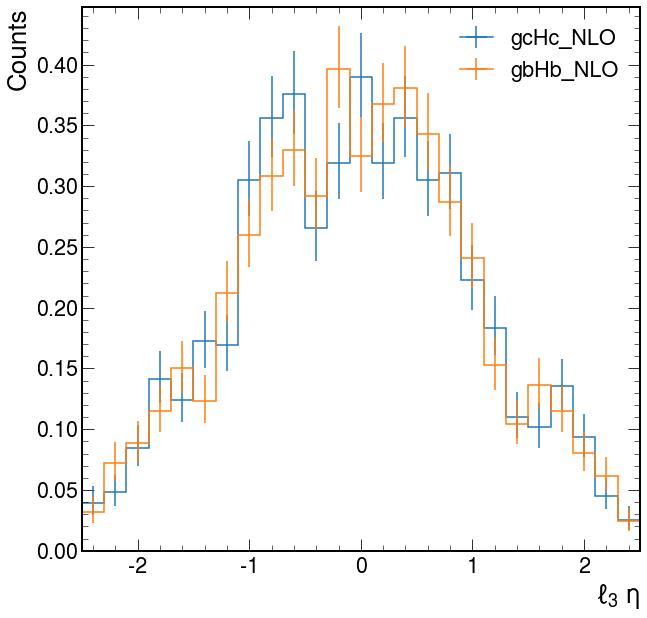

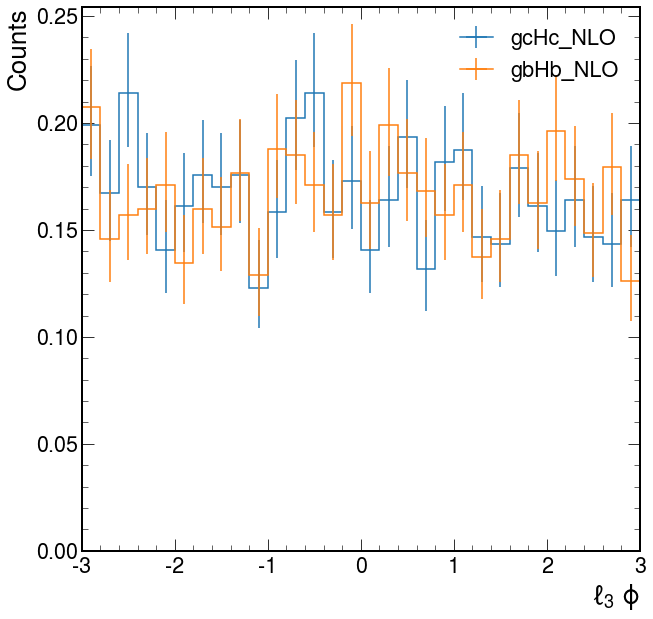

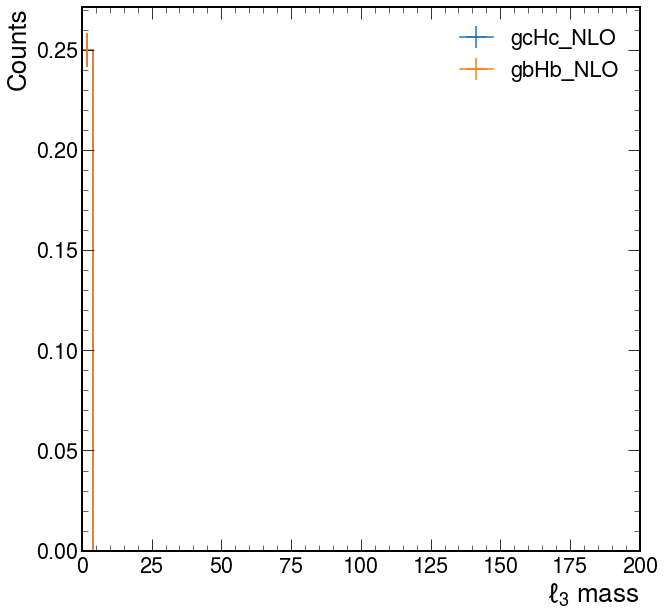

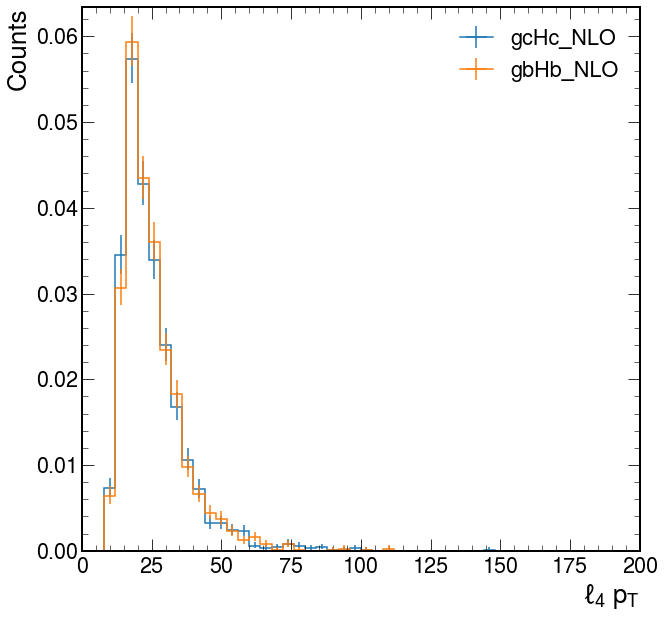

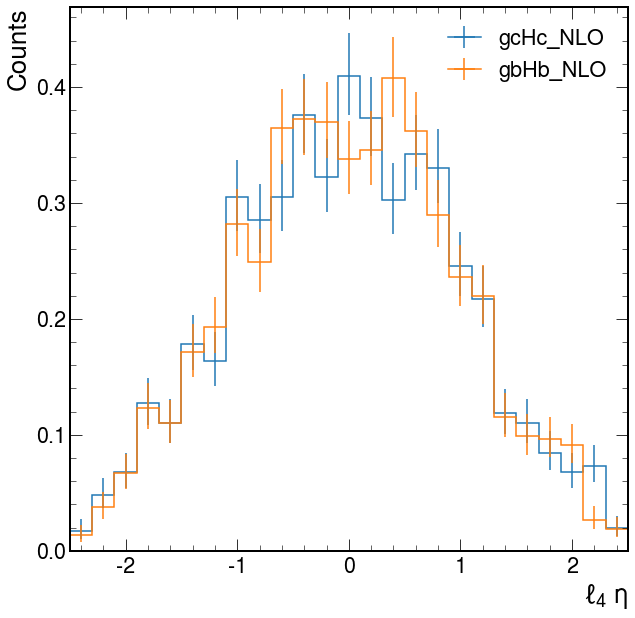

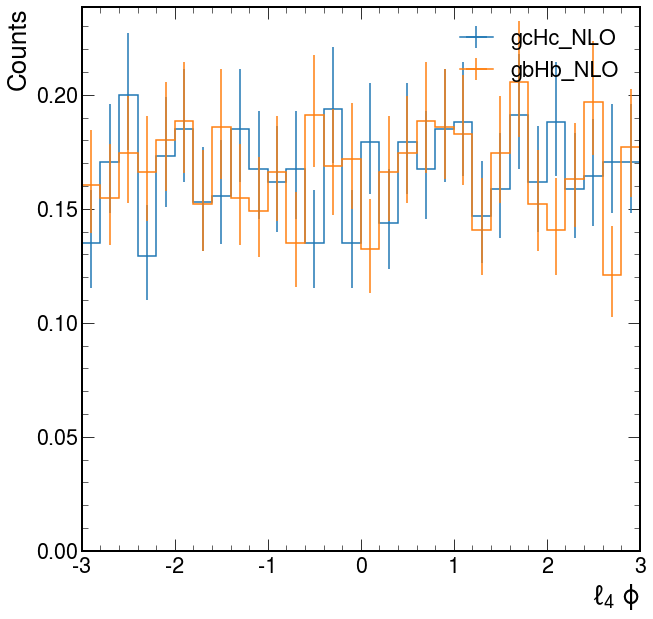

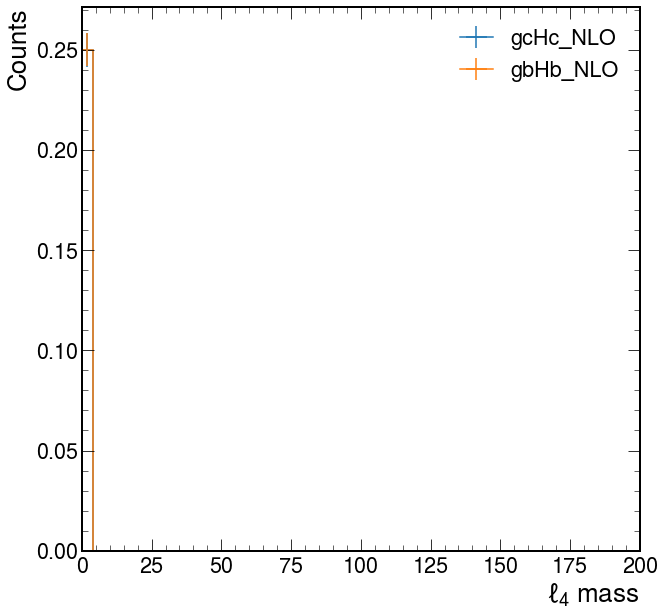

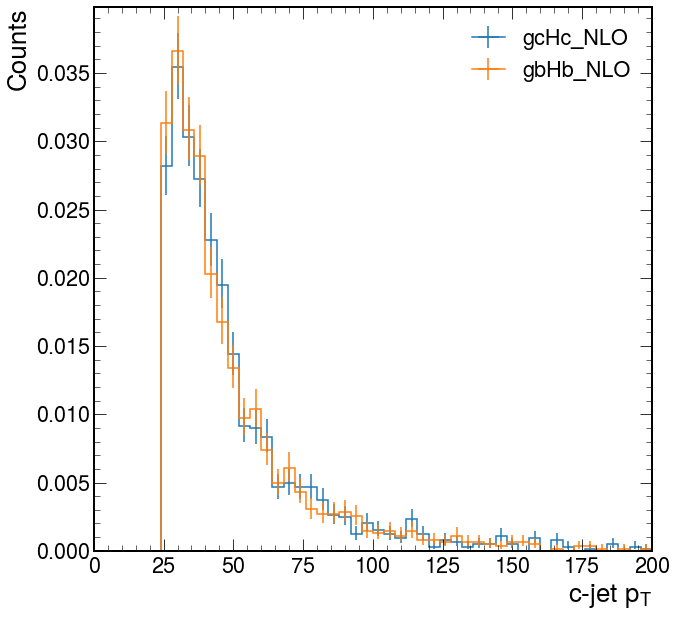

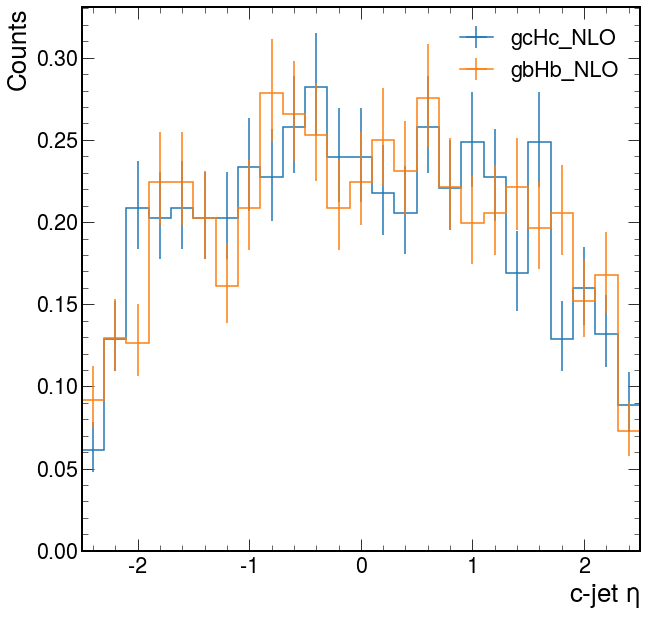

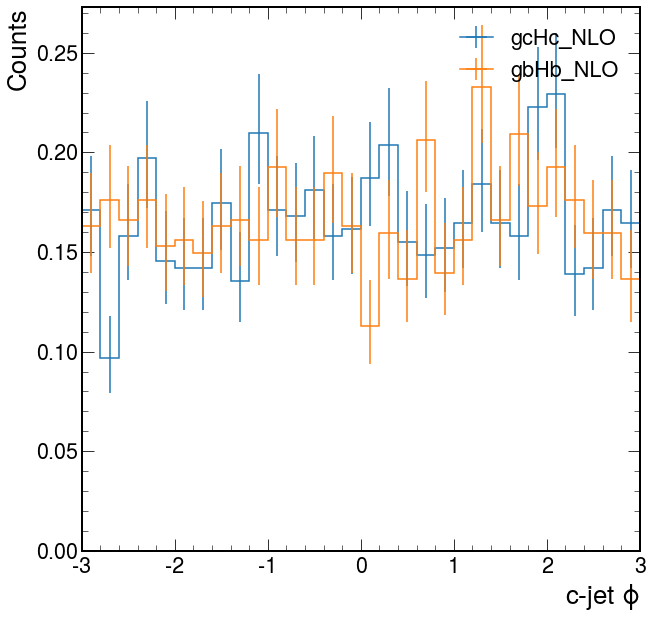

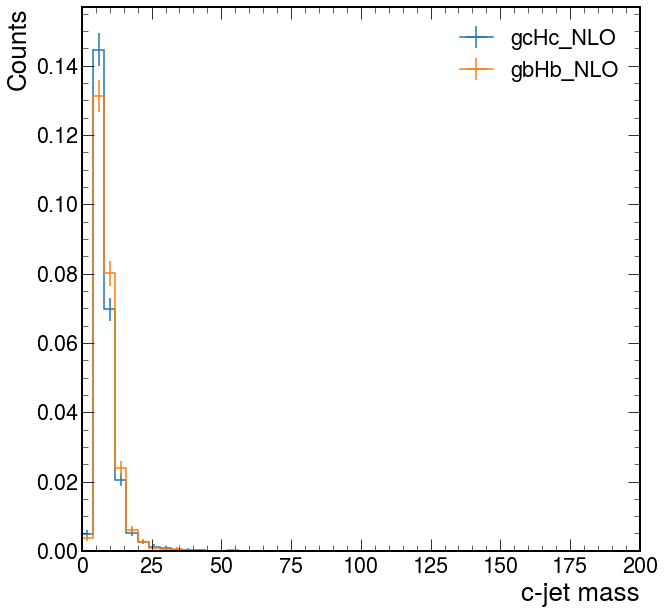

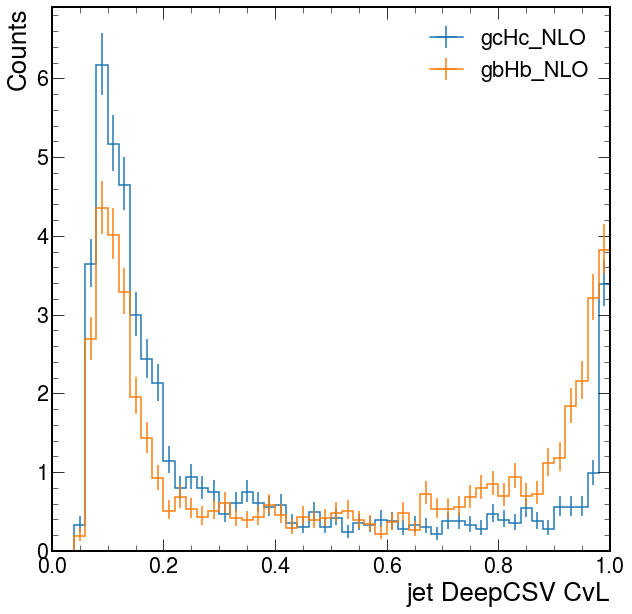

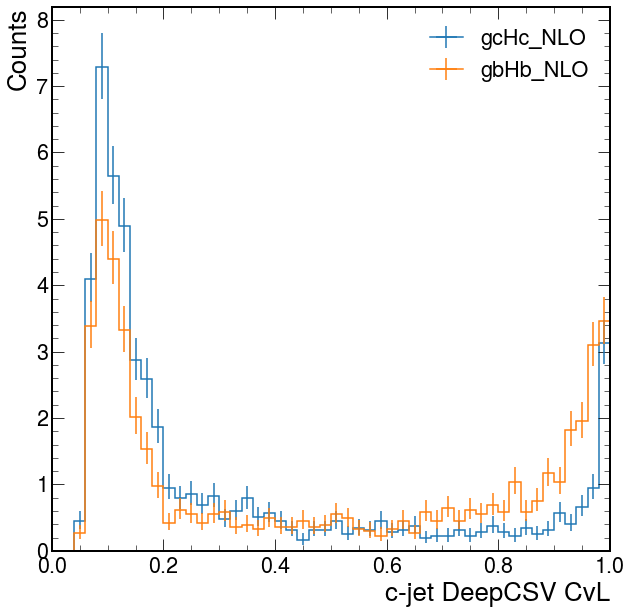

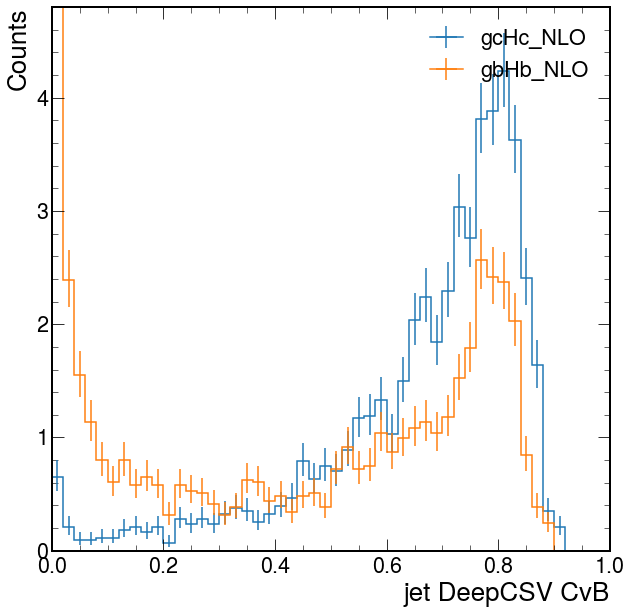

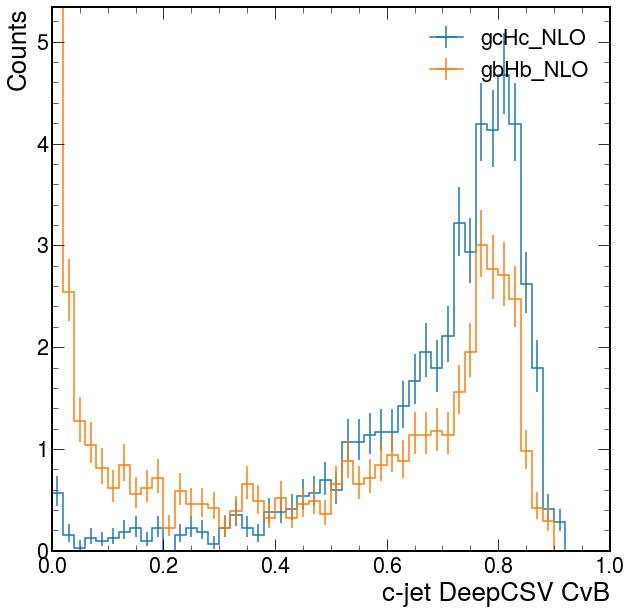

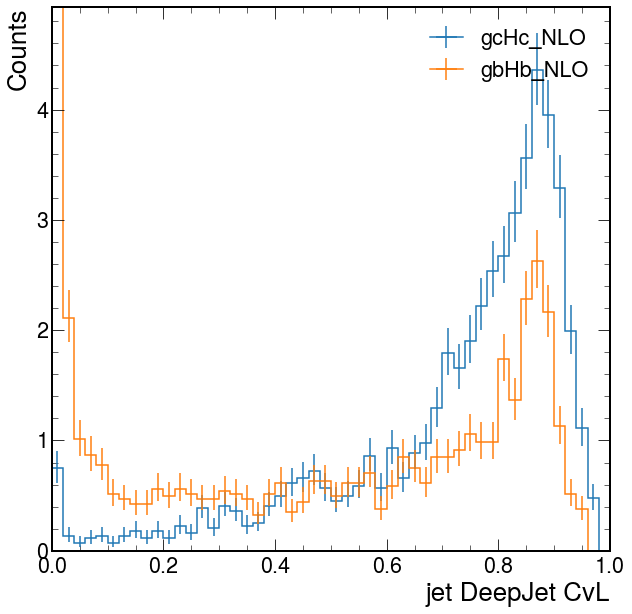

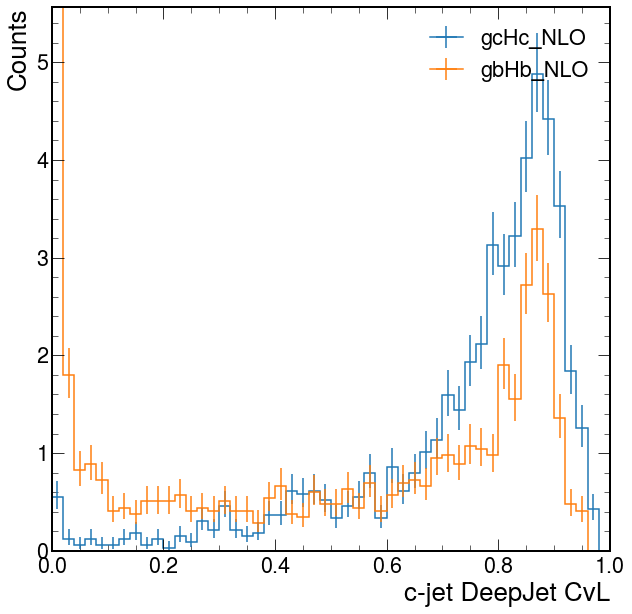

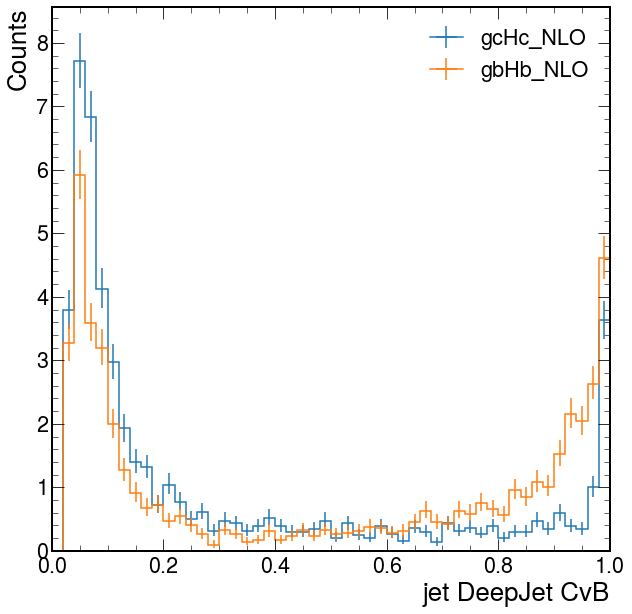

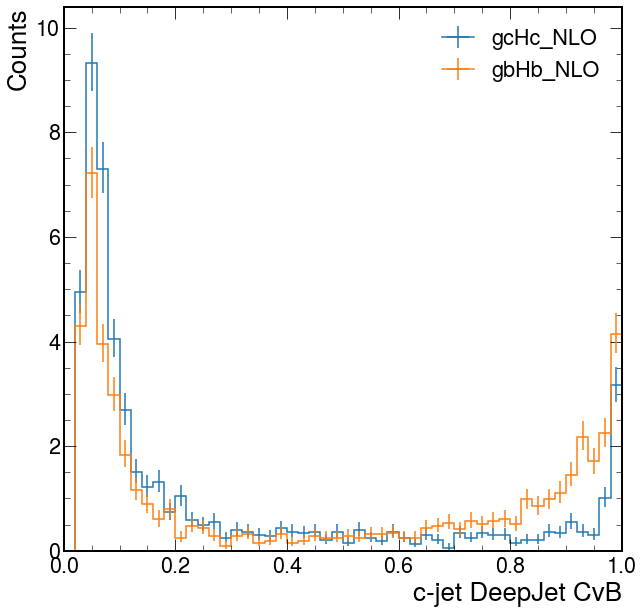

In [9]:
for var in output2.keys():
    if var == 'nbj' or var == 'ncj' : continue
    if var == 'cutflow':break
    fig, ax2 = plt.subplots()
    
    if 'jet' in var:
        ax2 = plot.plot1d(output[var]['gcHc_NLO'].sum("dataset").sum("flav"),ax=ax2,density=True)
        plot.plot1d(output[var]['gbHb_NLO'].sum("dataset").sum("flav"),clear=False,density=True)
    else: 
        ax = plot.plot1d(output[var]['gcHc_NLO'].sum("dataset"),ax=ax2,density=True)
        ax = plot.plot1d(output[var]['gbHb_NLO'].sum("dataset"),ax=ax2,clear=False,density=True)
    ax2.set_xlabel(axis_dict[var])
    ax2.legend(loc="upper right",handles=ax2.get_legend_handles_labels()[0],labels=['gcHc_NLO','gbHb_NLO'])